# This is the exploratory analysis workbook

Goals include setting up data tables for each type of data

Plotting a line graph of the data

Testing if we can see a difference between California and Florida

In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt

## Load the data

In [2]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('.\data\countries-aggregated.csv'))
dir_path

'C:\\Users\\User\\Documents\\GitHub\\COVID_Bubble_Estimator\\data'

In [3]:
#Finds all the files in the directory
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break

In [4]:
f

['CA_by_county.csv',
 'CDC_Cases_and_deaths.csv',
 'complete_vaccine_rate.csv',
 'countries-aggregated.csv',
 'COVID_Varients.csv',
 'data_county_current.csv',
 'data_county_timeseries.csv',
 'DECENNIALPL2020.csv',
 'key-countries-pivoted.csv',
 'Opendatasoft_uscountyboundries.xlsx',
 'reference.csv',
 'States_with_boarders.csv',
 'state_abriv.csv',
 'state_neighbors.csv',
 'time-series-19-covid-combined.csv',
 'Total_County_Data.csv',
 'Total_States.csv',
 'us_confirmed.csv',
 'us_county_population_data.csv',
 'us_county_population_data.json',
 'us_deaths.csv',
 'us_simplified.csv',
 'us_simplified_with_county_data.csv',
 'Utah_Pop.csv',
 'vaccine_rate_by_county.csv',
 'worldwide-aggregate.csv']

In [5]:
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('.csv'):
        files.append(Type)

In [6]:
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

In [7]:
# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    #print("./data/" + file)
    print('Loading...',dfn)
    dfs[dfn] = pd.read_csv("./data/" + file, index_col=[0], parse_dates=[1,2,-2,-1])  #index column is the first column, and the 2nd or 3rd (or columns 1, 2) is the date column so we can parse that ahead
print('Finished Loading')

Loading... CA_by_county
Loading... CDC_Cases_and_deaths
Loading... complete_vaccine_rate
Loading... countries-aggregated
Loading... COVID_Varients
Loading... data_county_current
Loading... data_county_timeseries
Loading... DECENNIALPL2020
Loading... key-countries-pivoted
Loading... reference
Loading... States_with_boarders
Loading... state_abriv
Loading... state_neighbors
Loading... time-series-19-covid-combined
Loading... Total_County_Data
Loading... Total_States
Loading... us_confirmed
Loading... us_county_population_data
Loading... us_deaths
Loading... us_simplified
Loading... us_simplified_with_county_data
Loading... Utah_Pop
Loading... vaccine_rate_by_county
Loading... worldwide-aggregate
Finished Loading


In [8]:
# Pretty neat, I just call the title of the cvs file and I now have the DataFrame
dfs["us_confirmed"]

Admin2       Date  Case Country/Region Province/State
index                                                          
0        Autauga 2020-01-22     0             US        Alabama
1        Autauga 2020-01-23     0             US        Alabama
2        Autauga 2020-01-24     0             US        Alabama
3        Autauga 2020-01-25     0             US        Alabama
4        Autauga 2020-01-26     0             US        Alabama
...          ...        ...   ...            ...            ...
2449681   Weston 2022-01-19  1332             US        Wyoming
2449682   Weston 2022-01-20  1341             US        Wyoming
2449683   Weston 2022-01-21  1349             US        Wyoming
2449684   Weston 2022-01-22  1349             US        Wyoming
2449685   Weston 2022-01-23  1349             US        Wyoming

[2449686 rows x 5 columns]

In [9]:
for n in dfs.keys():
    print (n,'\n',dfs[n].dtypes)
    print()

CA_by_county 
 Total Cases                object
Total Deaths               object
2022 Population           float64
Growth Since 2010          object
Density (mi²)             float64
Cases per 1K pop          float64
Deaths per 1K pop          object
Cases by Density (mi²)     object
dtype: object

CDC_Cases_and_deaths 
 state              object
tot_cases          object
conf_cases        float64
prob_cases        float64
new_case          float64
pnew_case         float64
tot_death           int64
new_death         float64
pnew_death        float64
created_at         object
consent_cases      object
consent_deaths     object
conf_death         object
prob_death         object
dtype: object

complete_vaccine_rate 
 date                    datetime64[ns]
fips                            object
mmwr_week                        int64
recip_county                    object
recip_state                     object
                             ...      
census2019_5pluspop            float64

And there we go.  Indexed and date time objects alread set with the import.

I wonder how much of these databases I can combine to get a bigger picture.   That is something for another time I think

#### Tkinter makes a dropdown menue to select options

Maybe I can use this to select the state that we are looking at?

In [10]:
from tkinter import *

ws = Tk()
ws.title('States')
ws.geometry('400x300')
ws.config(bg='#F2B90C')

def display_selected(choice):
    choice = variable.get()
    print(choice)

states=list(dfs["us_confirmed"]["Province/State"].unique())

# setting variable for Integers
variable = StringVar()
variable.set(states[3])

# creating widget
dropdown = OptionMenu(
    ws,
    variable,
    *states,
    command=display_selected
)

# positioning widget
dropdown.pack(expand=True)

# infinite loop 
ws.mainloop()

Lets table this idea for a while.  But I could use it for selecting which countries we will be comparing.

## Exploratory Analysis

A look a California and Forida by county and by state in side by side comparison

### California

In [10]:
# Get the US confirmed cases and make a DataFrame from them
us_confirmed = dfs["us_confirmed"].copy()

In [11]:
# Gets the data from California only
Cal=us_confirmed[us_confirmed['Province/State']=='California']
# Indexes the data by Admin2 (aka cities) and Dates
#This unstacks the cities into their own hirerarchy
dframe=Cal.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe

Admin2      Alameda  Alpine  Amador  Butte  Calaveras  Colusa  Contra Costa  \
Date                                                                          
2020-01-22        0       0       0      0          0       0             0   
2020-01-23        0       0       0      0          0       0             0   
2020-01-24        0       0       0      0          0       0             0   
2020-01-25        0       0       0      0          0       0             0   
2020-01-26        0       0       0      0          0       0             0   
...             ...     ...     ...    ...        ...     ...           ...   
2022-01-19   210747     118    7008  32088       5936    3824        160239   
2022-01-20   210751     119    7008  32091       5936    3824        160241   
2022-01-21   214939     119    7064  32484       6006    3840        162809   
2022-01-22   214939     119    7064  32484       6006    3840        162809   
2022-01-23   214939     119    7064  32484       6006    3840        162809   

Admin2      Del Norte  El Dorado  Fresno  ...  Stanislaus  Sutter  Tehama  \
Date                                      ...                               
2020-01-22          0          0       0  ...           0       0       0   
2020-01-23          0          0       0  ...           0       0       0   
2020-01-24          0          0       0  ...           0       0       0   
2020-01-25          0          0       0  ...           0       0       0   
2020-01-26          0          0       0  ...           0       0       0   
...               ...        ...     ...  ...         ...     ...     ...   
2022-01-19       4339      24525  197313  ...      110937   18292   12121   
2022-01-20       4339      24525  197314  ...      113759   18292   12121   
2022-01-21       4368      24845  201080  ...      115652   18472   12228   
2022-01-22       4368      24845  201080  ...      115652   18472   12228   
2022-01-23       4368      24845  201080  ...      115652   18472   12228   

Admin2      Trinity  Tulare  Tuolumne  Unassigned  Ventura   Yolo   Yuba  
Date                                                                      
2020-01-22        0       0         0           0        0      0      0  
2020-01-23        0       0         0           0        0      0      0  
2020-01-24        0       0         0           0        0      0      0  
2020-01-25        0       0         0           0        0      0      0  
2020-01-26        0       0         0           0        0      0      0  
...             ...     ...       ...         ...      ...    ...    ...  
2022-01-19     1158  105633      9861        6153   151650  31713  13876  
2022-01-20     1158  105633      9861        5198   151651  31713  13876  
2022-01-21     1167  107113      9979        6354   155655  32382  14050  
2022-01-22     1167  107113      9979        6354   155655  32382  14050  
2022-01-23     1167  107113      9979        6354   155655  32382  14050  

[733 rows x 60 columns]

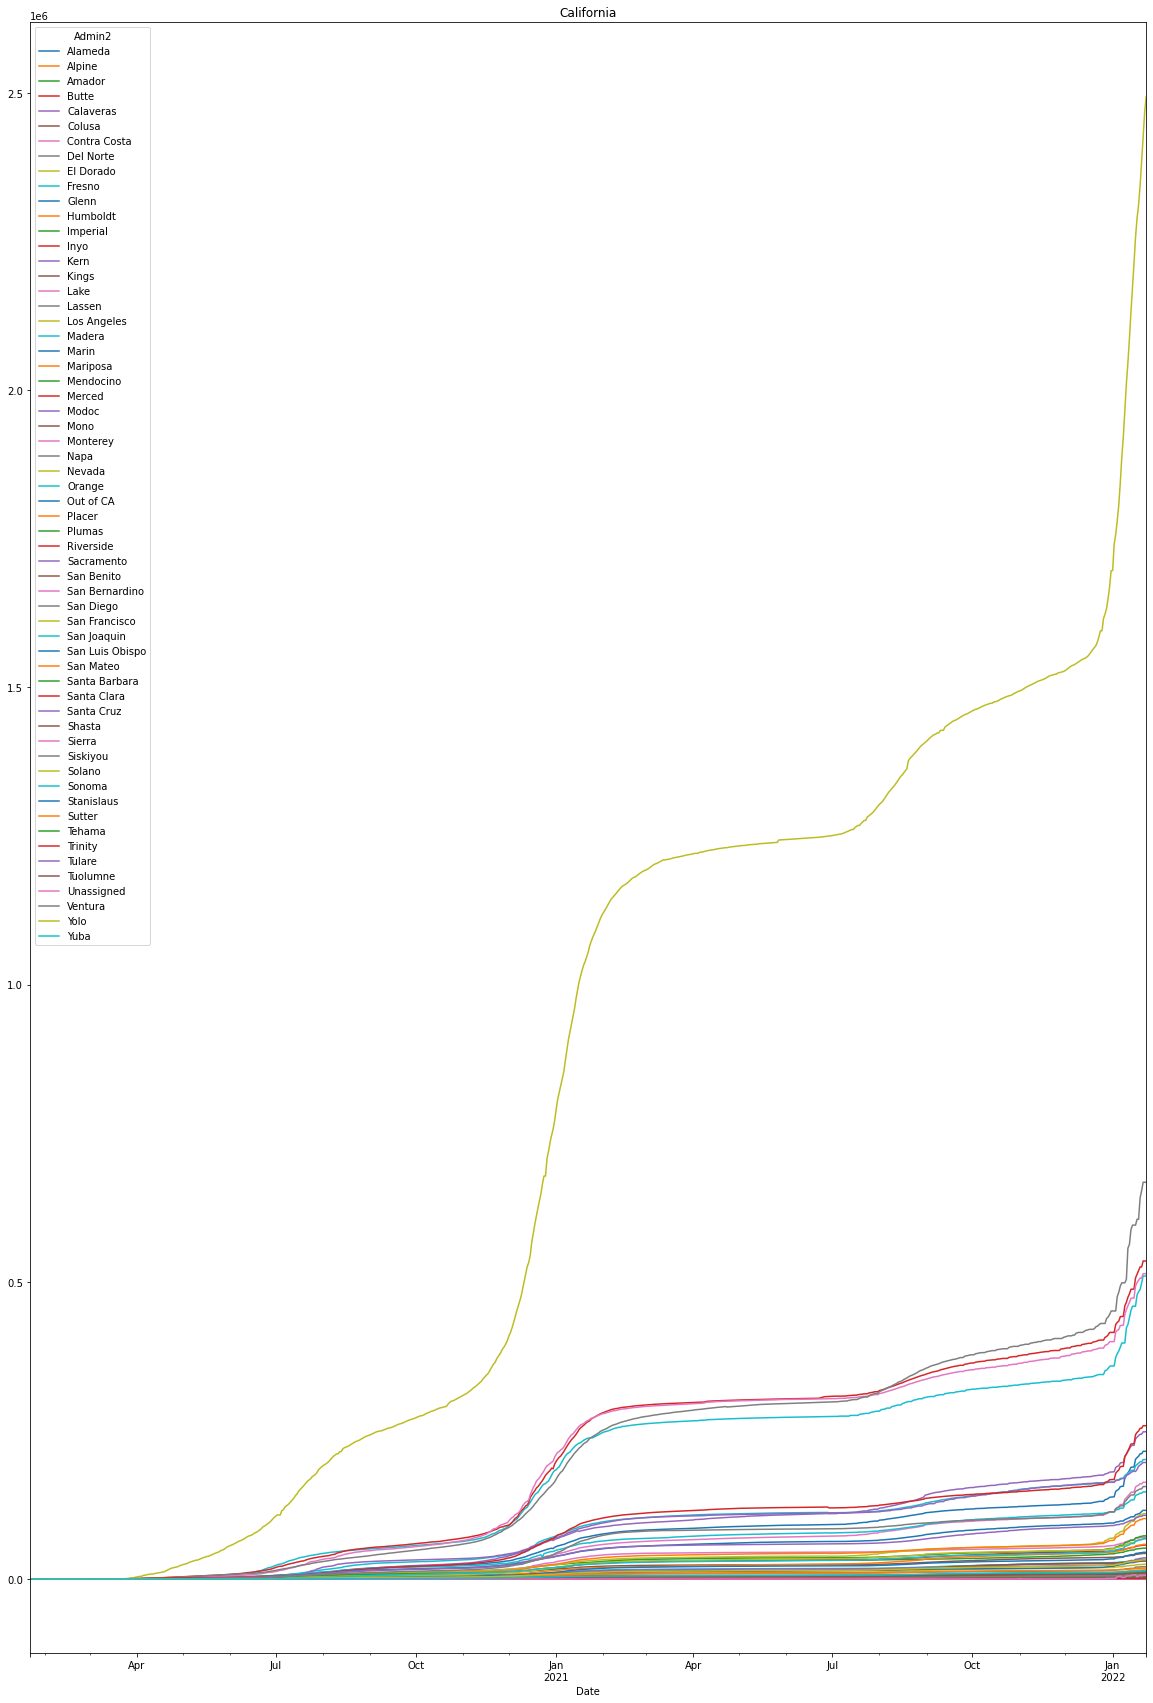

In [12]:
dframe.plot(title=('California'),figsize=(20,30))
plt.show()

In [13]:
dframe.describe()

Admin2        Alameda      Alpine       Amador         Butte    Calaveras  \
count      733.000000  733.000000   733.000000    733.000000   733.000000   
mean     60842.152797   53.836289  2442.053206  10174.124147  1613.555252   
std      50409.577676   44.408596  2227.849231   9273.610839  1598.259197   
min          0.000000    0.000000     0.000000      0.000000     0.000000   
25%       9963.000000    2.000000    61.000000    737.000000   102.000000   
50%      71260.000000   73.000000  3066.000000  11156.000000  1682.000000   
75%      95429.000000   89.000000  3850.000000  15010.000000  2283.000000   
max     214939.000000  119.000000  7064.000000  32484.000000  6006.000000   

Admin2       Colusa   Contra Costa    Del Norte     El Dorado         Fresno  \
count    733.000000     733.000000   733.000000    733.000000     733.000000   
mean    1502.386085   48322.328786  1220.331514   7512.743520   73594.620737   
std     1228.856630   40732.767860  1367.066898   7003.451382   58549.151892   
min        0.000000       0.000000     0.000000      0.000000       0.000000   
25%      242.000000    6642.000000    66.000000    491.000000   12317.000000   
50%     1860.000000   54838.000000   856.000000   8438.000000   91602.000000   
75%     2339.000000   75209.000000  1512.000000  11636.000000  112901.000000   
max     3840.000000  162809.000000  4368.000000  24845.000000  201080.000000   

Admin2  ...     Stanislaus        Sutter        Tehama      Trinity  \
count   ...     733.000000    733.000000    733.000000   733.000000   
mean    ...   41747.739427   6491.267394   3965.335607   336.976808   
std     ...   33479.115843   5548.406099   3708.721617   350.311061   
min     ...       0.000000      0.000000      0.000000     0.000000   
25%     ...    7614.000000    570.000000    160.000000     8.000000   
50%     ...   48171.000000   7959.000000   4451.000000   314.000000   
75%     ...   64281.000000   9996.000000   5784.000000   444.000000   
max     ...  115652.000000  18472.000000  12228.000000  1167.000000   

Admin2         Tulare     Tuolumne   Unassigned        Ventura          Yolo  \
count      733.000000   733.000000   733.000000     733.000000    733.000000   
mean     39856.060027  2951.302865   197.937244   51926.725784   9755.301501   
std      31369.731345  2855.023250   875.364334   43600.995319   8371.571187   
min          0.000000     0.000000     0.000000       0.000000      0.000000   
25%       7923.000000    95.000000     0.000000    6326.000000   1282.000000   
50%      48765.000000  3408.000000     0.000000   66822.000000  11158.000000   
75%      59911.000000  4258.000000    66.000000   86148.000000  15016.000000   
max     107113.000000  9979.000000  7153.000000  155655.000000  32382.000000   

Admin2          Yuba  
count     733.000000  
mean     4402.421555  
std      3986.188410  
min         0.000000  
25%       297.000000  
50%      4853.000000  
75%      6590.000000  
max     14050.000000  

[8 rows x 60 columns]

In [14]:
dframe.columns

Index(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Out of CA', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
       'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra',
       'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Tuolumne', 'Unassigned', 'Ventura', 'Yolo',
       'Yuba'],
      dtype='object', name='Admin2')

<AxesSubplot:title={'center':'California'}, ylabel='Frequency'>

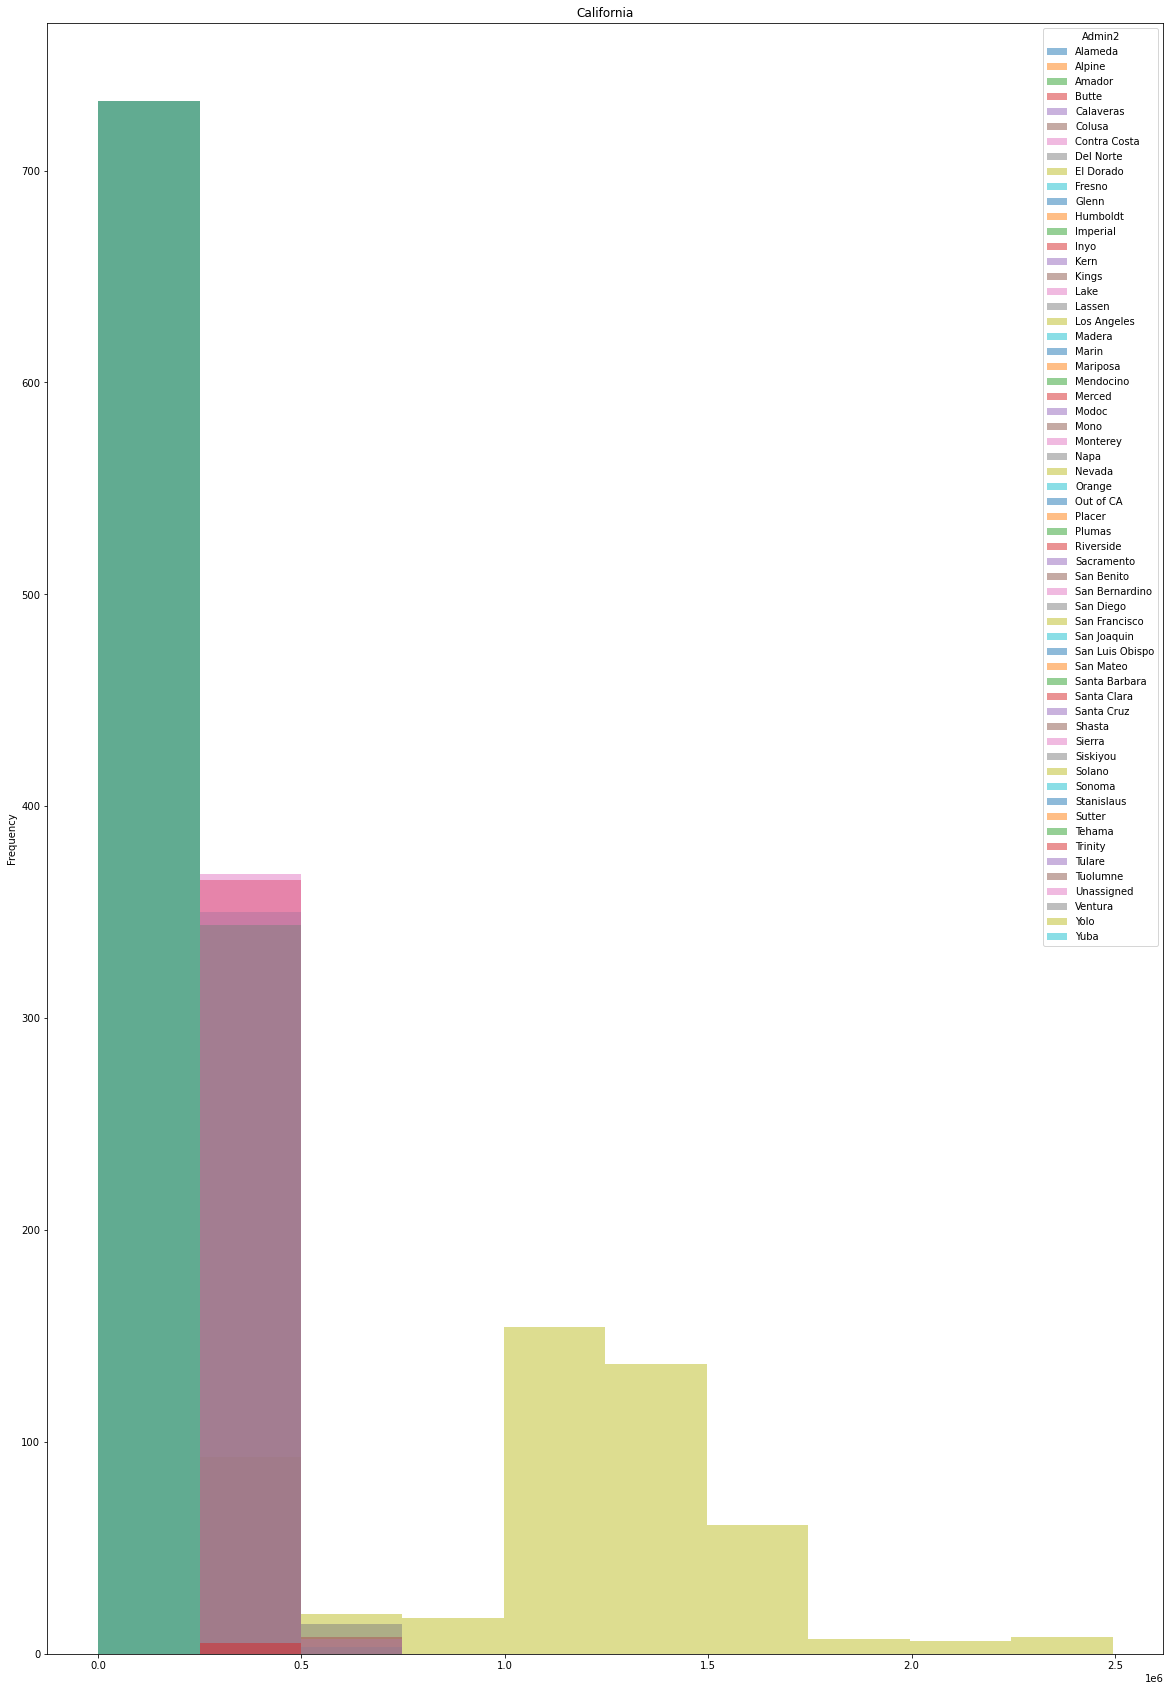

In [15]:
dframe.plot.hist(title=('California'),figsize=(20,30), alpha=0.5)

**So everyone has a bunch of days where ther are 0 outbdreaks, but only a few have 0.5x10^6 or 500,000 cases.  Only two counties have more than a million cases.** 

In [16]:
# Lets create a dataframe with the county cases by date
California_Counties=[]
for i in dframe.columns:
    California_Counties.append(dframe[i])
dframe_Cal=DataFrame(California_Counties)    

In [17]:
dframe_Cal

Date             2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Alameda                   0           0           0           0           0   
Alpine                    0           0           0           0           0   
Amador                    0           0           0           0           0   
Butte                     0           0           0           0           0   
Calaveras                 0           0           0           0           0   
Colusa                    0           0           0           0           0   
Contra Costa              0           0           0           0           0   
Del Norte                 0           0           0           0           0   
El Dorado                 0           0           0           0           0   
Fresno                    0           0           0           0           0   
Glenn                     0           0           0           0           0   
Humboldt                  0           0           0           0           0   
Imperial                  0           0           0           0           0   
Inyo                      0           0           0           0           0   
Kern                      0           0           0           0           0   
Kings                     0           0           0           0           0   
Lake                      0           0           0           0           0   
Lassen                    0           0           0           0           0   
Los Angeles               0           0           0           0           1   
Madera                    0           0           0           0           0   
Marin                     0           0           0           0           0   
Mariposa                  0           0           0           0           0   
Mendocino                 0           0           0           0           0   
Merced                    0           0           0           0           0   
Modoc                     0           0           0           0           0   
Mono                      0           0           0           0           0   
Monterey                  0           0           0           0           0   
Napa                      0           0           0           0           0   
Nevada                    0           0           0           0           0   
Orange                    0           0           0           0           1   
Out of CA                 0           0           0           0           0   
Placer                    0           0           0           0           0   
Plumas                    0           0           0           0           0   
Riverside                 0           0           0           0           0   
Sacramento                0           0           0           0           0   
San Benito                0           0           0           0           0   
San Bernardino            0           0           0           0           0   
San Diego                 0           0           0           0           0   
San Francisco             0           0           0           0           0   
San Joaquin               0           0           0           0           0   
San Luis Obispo           0           0           0           0           0   
San Mateo                 0           0           0           0           0   
Santa Barbara             0           0           0           0           0   
Santa Clara               0           0           0           0           0   
Santa Cruz                0           0           0           0           0   
Shasta                    0           0           0           0           0   
Sierra                    0           0           0           0           0   
Siskiyou                  0           0           0           0           0   
Solano                    0           0           0           0           0   
Sonoma                    0           0           

<AxesSubplot:>

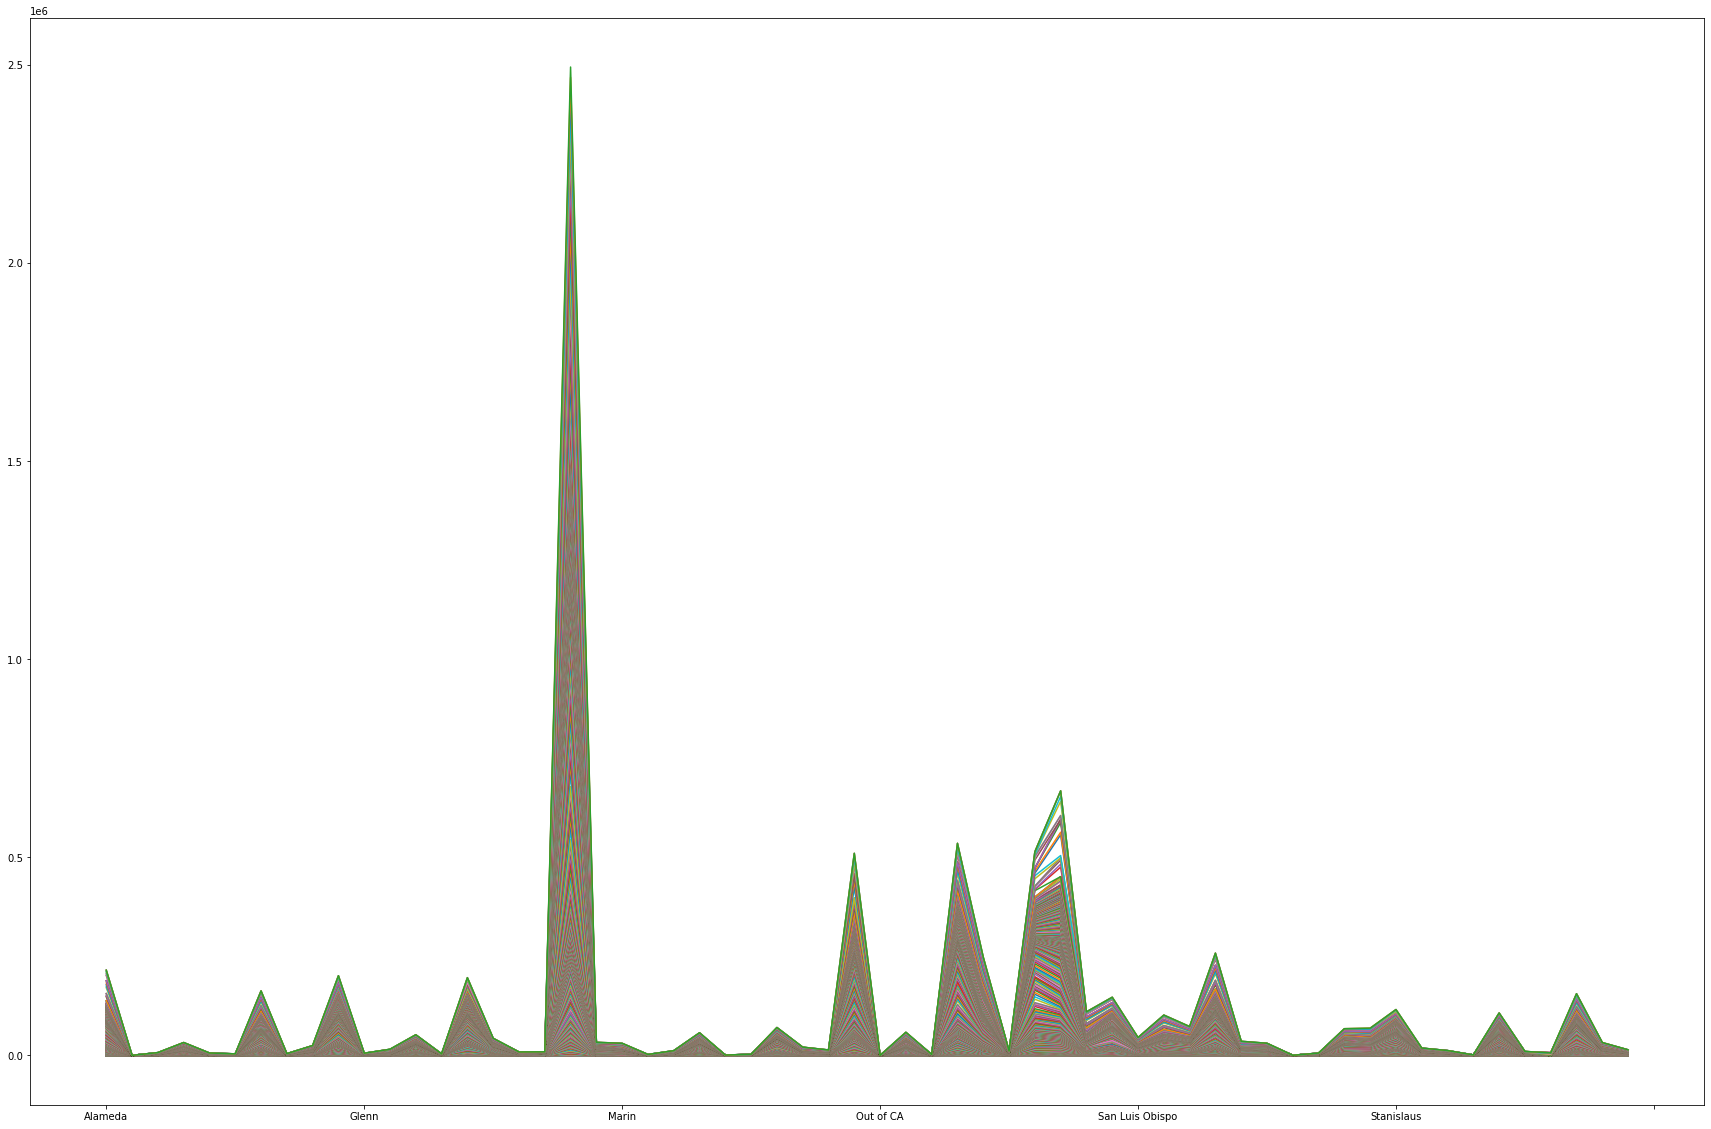

In [18]:
dframe_Cal.plot(figsize=(30,20),legend=False)

<AxesSubplot:>

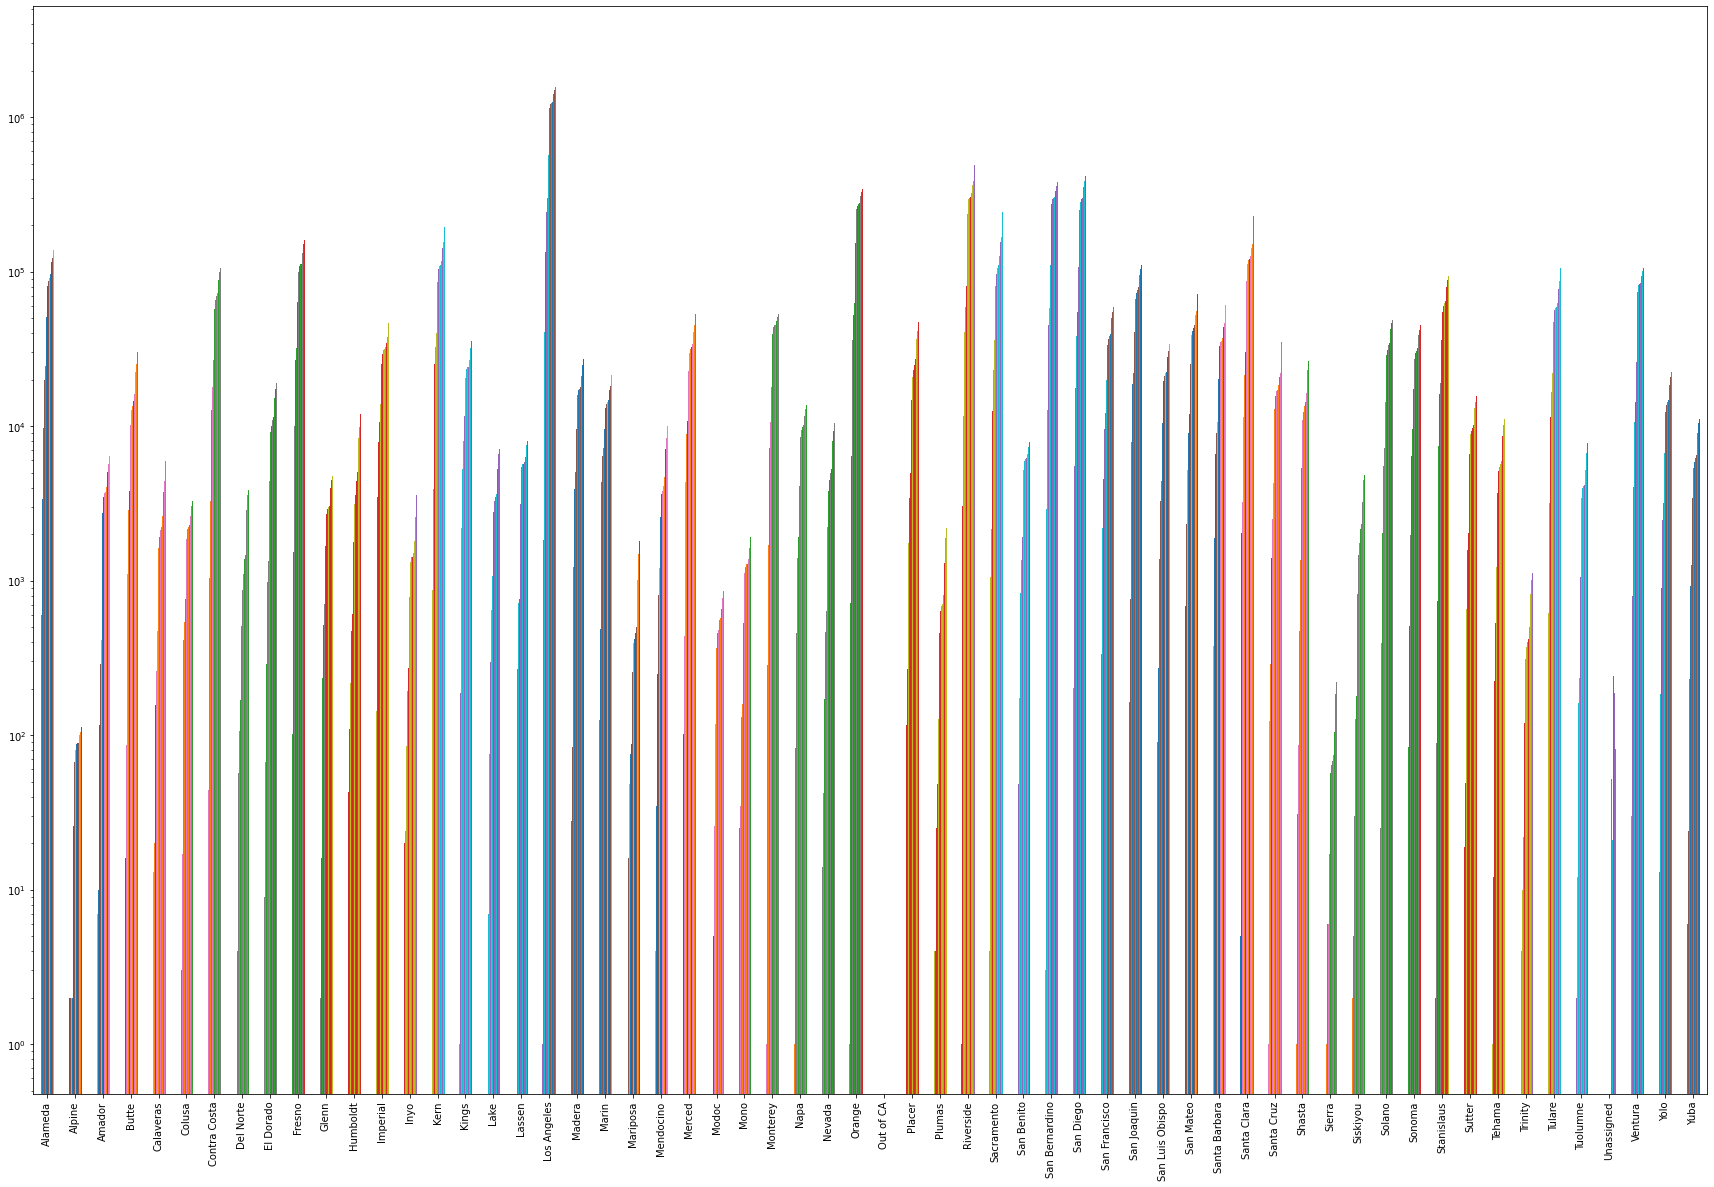

In [19]:
dframe_Cal.plot.bar(figsize=(30,20),legend=False, logy=True)

<AxesSubplot:>

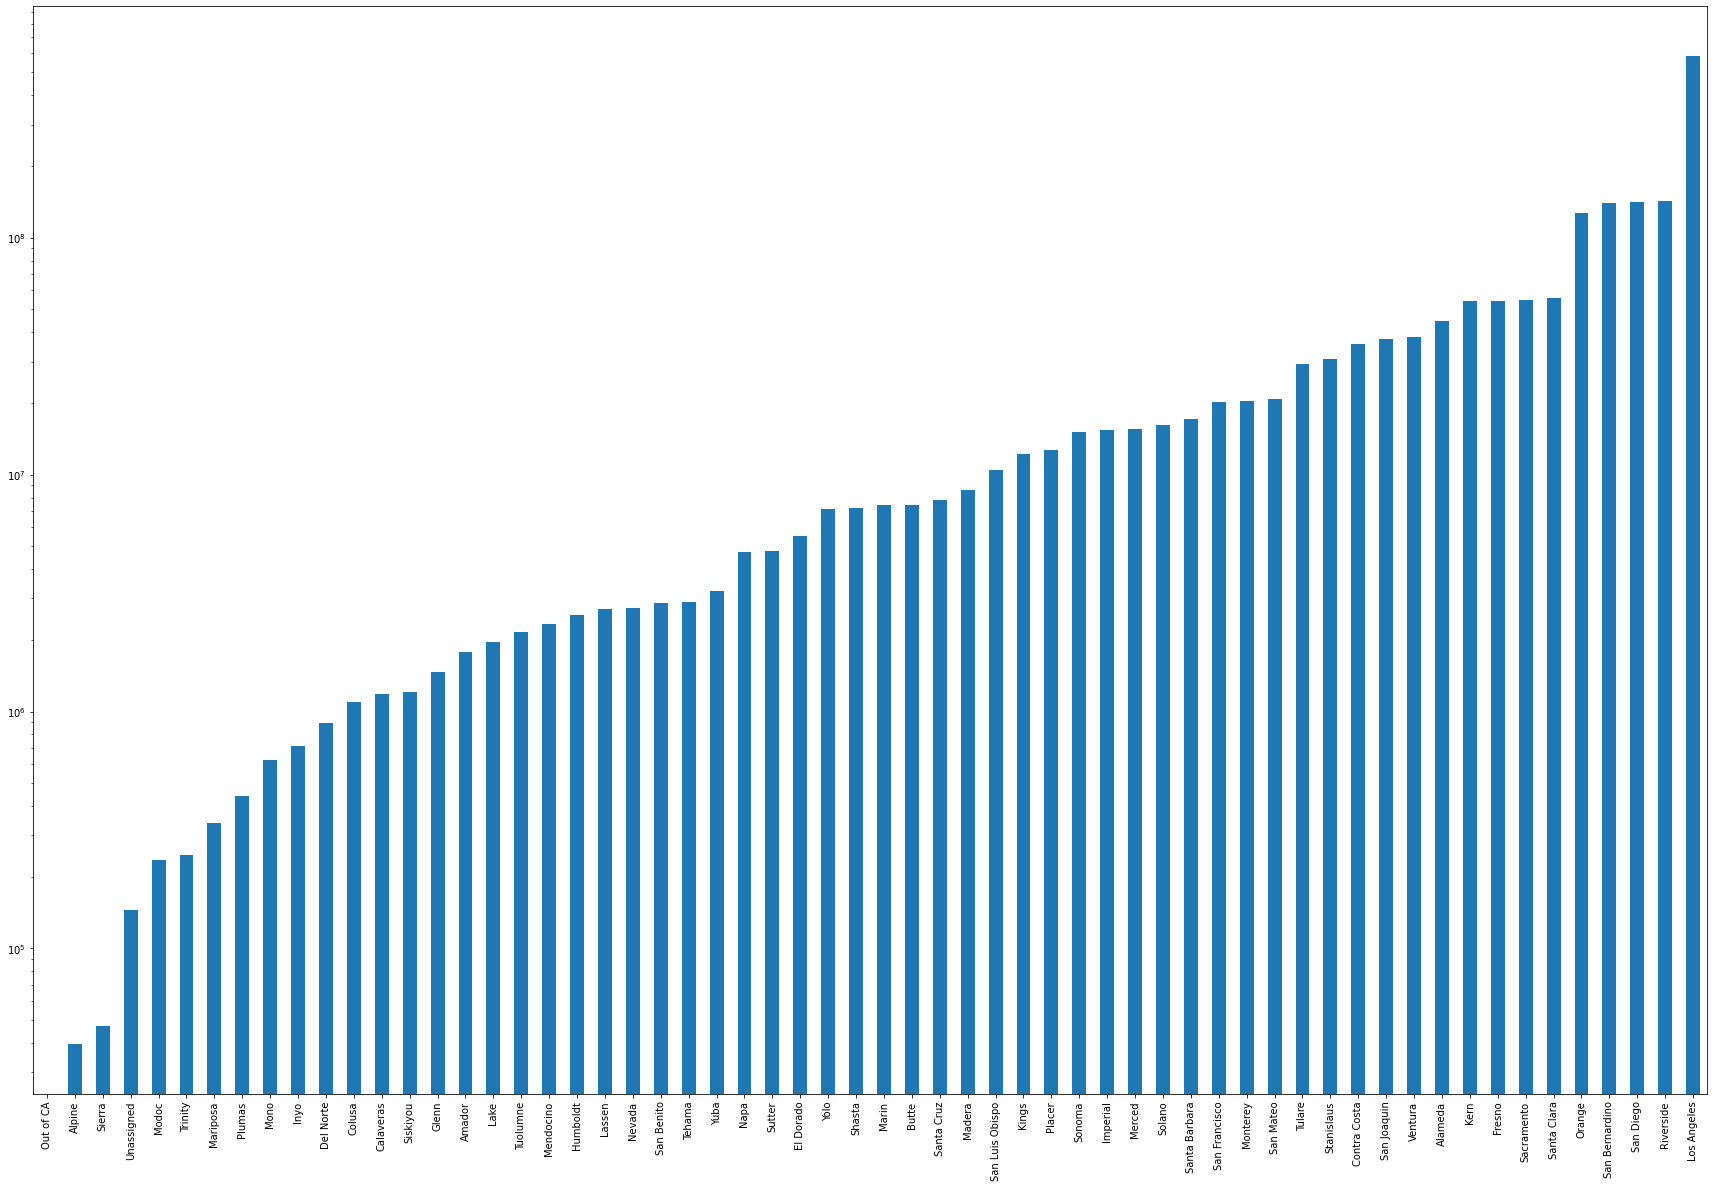

In [20]:
dframe_Cal.T.sum().sort_values().plot.bar(figsize=(30,20),legend=False, logy=True)

In [21]:
Cal.groupby('Admin2').sum().sort_values(by='Case', axis=0, ascending=False).head(10)

Case
Admin2                   
Los Angeles     585388099
Riverside       142324433
San Diego       141097475
San Bernardino  139410203
Orange          127427475
Santa Clara      55636947
Sacramento       54566421
Fresno           53944857
Kern             53876352
Alameda          44597298

**Cases in CA are as follows**

LA is the worst by a factor of almost four!

Second tier would be Riverside, San Diego, San Bernadino and Orange county.  (high populations in SoCal)

Santa Clara, Sacramento and Alameda (Nor Cal) along with Fresno and Kern (Central Valley) are in the third tier

I should look at this per capita and see how it works via population density.  I'm pretty sure LA county is the largest in the state so no surprise.  SF is a small but dense population, that could be why it's so low, also SF has had very strict policies and good general adherance to them.

In [22]:
Cal.groupby('Admin2').sum().sort_values(by='Case', axis=0, ascending=False).tail(10)

Case
Admin2            
Inyo        714160
Mono        624107
Plumas      440548
Mariposa    338495
Trinity     247004
Modoc       235911
Unassigned  145088
Sierra       46907
Alpine       39462
Out of CA        0

In [23]:
# Lets make a funciton that will do this for any state
def State_by_county(df,state):
    ''' This function will take a database and make a data frame of the state cases per county by date'''
    State=df[df['Province/State']==state]
    # Indexes the data by Admin2 (aka cities) and Dates
    #This unstacks the cities into their own hirerarchy
    dframe=State.set_index(['Admin2','Date']).unstack('Admin2')['Case']
    Counties=[]
    for i in dframe.columns:
        Counties.append(dframe[i])
    return DataFrame(Counties)

In [24]:
Cal=State_by_county(us_confirmed,'California')
Cal

Date             2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Alameda                   0           0           0           0           0   
Alpine                    0           0           0           0           0   
Amador                    0           0           0           0           0   
Butte                     0           0           0           0           0   
Calaveras                 0           0           0           0           0   
Colusa                    0           0           0           0           0   
Contra Costa              0           0           0           0           0   
Del Norte                 0           0           0           0           0   
El Dorado                 0           0           0           0           0   
Fresno                    0           0           0           0           0   
Glenn                     0           0           0           0           0   
Humboldt                  0           0           0           0           0   
Imperial                  0           0           0           0           0   
Inyo                      0           0           0           0           0   
Kern                      0           0           0           0           0   
Kings                     0           0           0           0           0   
Lake                      0           0           0           0           0   
Lassen                    0           0           0           0           0   
Los Angeles               0           0           0           0           1   
Madera                    0           0           0           0           0   
Marin                     0           0           0           0           0   
Mariposa                  0           0           0           0           0   
Mendocino                 0           0           0           0           0   
Merced                    0           0           0           0           0   
Modoc                     0           0           0           0           0   
Mono                      0           0           0           0           0   
Monterey                  0           0           0           0           0   
Napa                      0           0           0           0           0   
Nevada                    0           0           0           0           0   
Orange                    0           0           0           0           1   
Out of CA                 0           0           0           0           0   
Placer                    0           0           0           0           0   
Plumas                    0           0           0           0           0   
Riverside                 0           0           0           0           0   
Sacramento                0           0           0           0           0   
San Benito                0           0           0           0           0   
San Bernardino            0           0           0           0           0   
San Diego                 0           0           0           0           0   
San Francisco             0           0           0           0           0   
San Joaquin               0           0           0           0           0   
San Luis Obispo           0           0           0           0           0   
San Mateo                 0           0           0           0           0   
Santa Barbara             0           0           0           0           0   
Santa Clara               0           0           0           0           0   
Santa Cruz                0           0           0           0           0   
Shasta                    0           0           0           0           0   
Sierra                    0           0           0           0           0   
Siskiyou                  0           0           0           0           0   
Solano                    0           0           0           0           0   
Sonoma                    0           0           

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

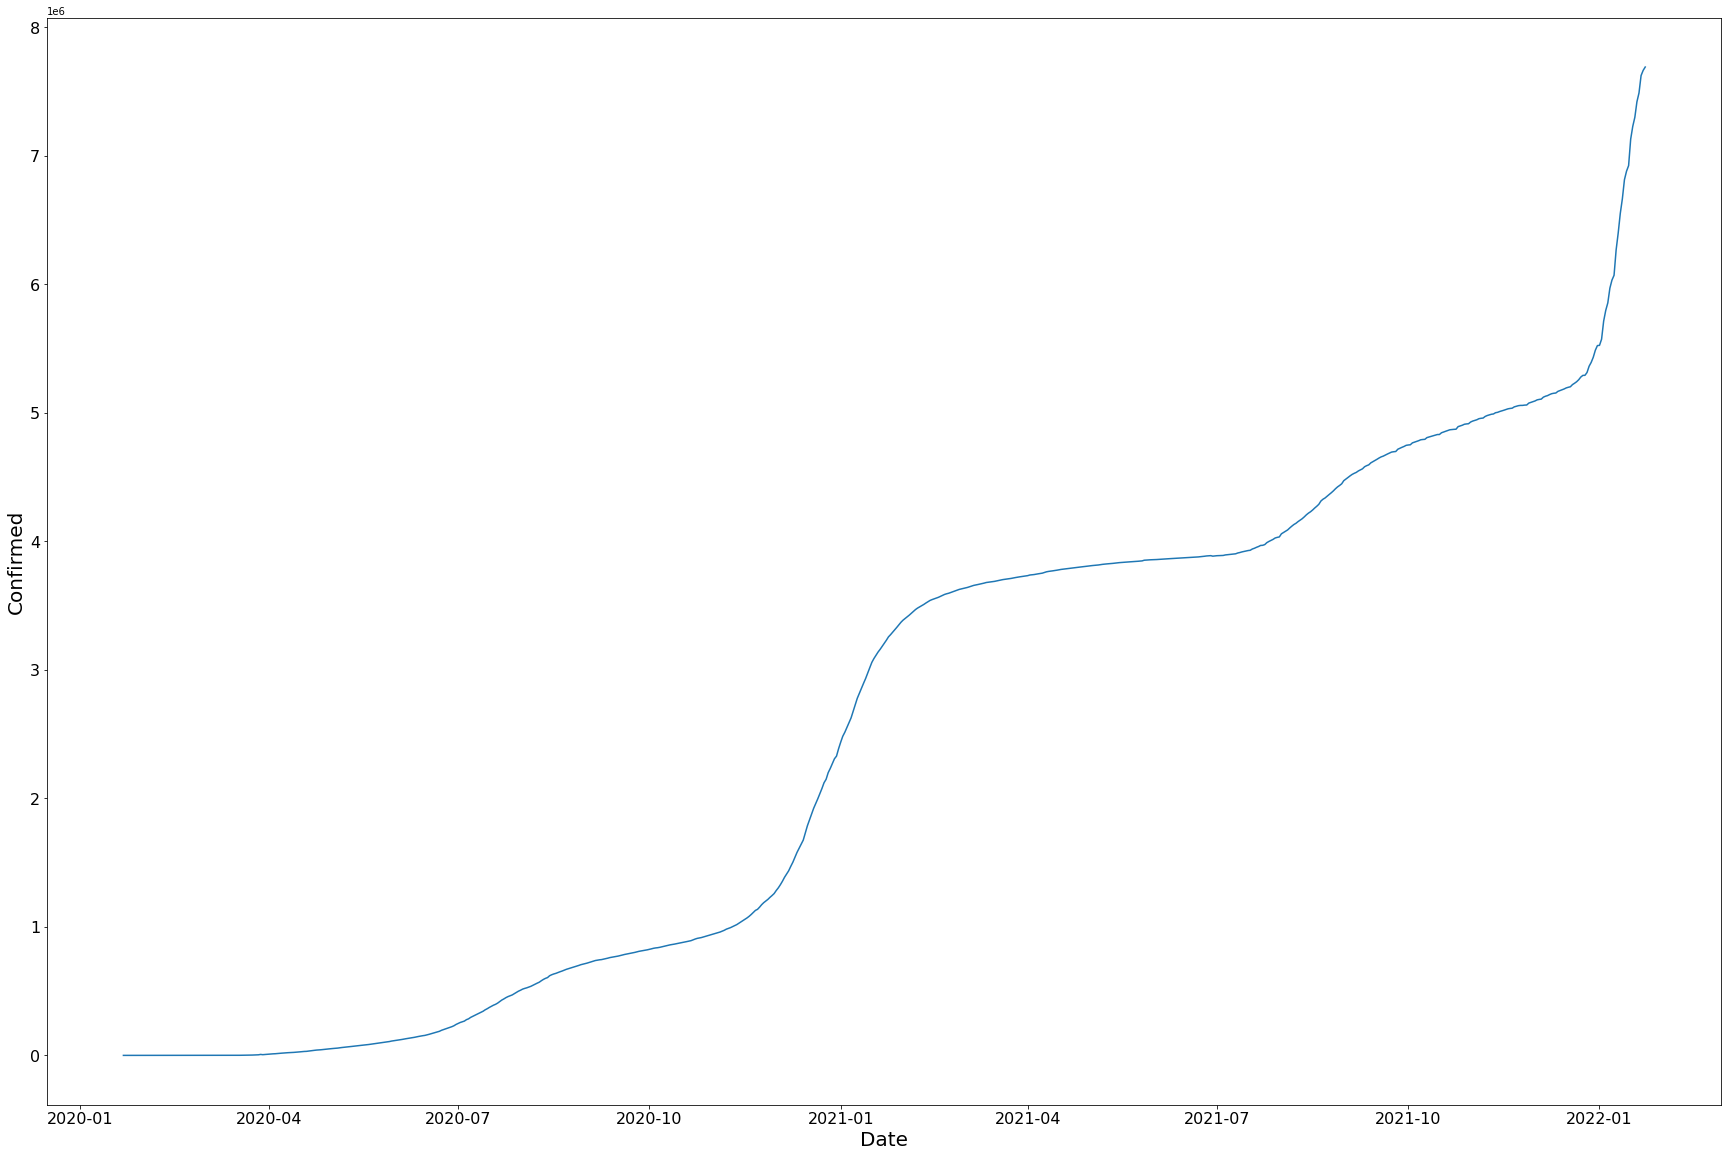

In [29]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Confirmed', fontsize=20)
plt.plot(dframe_Cal.sum())
plt.show()

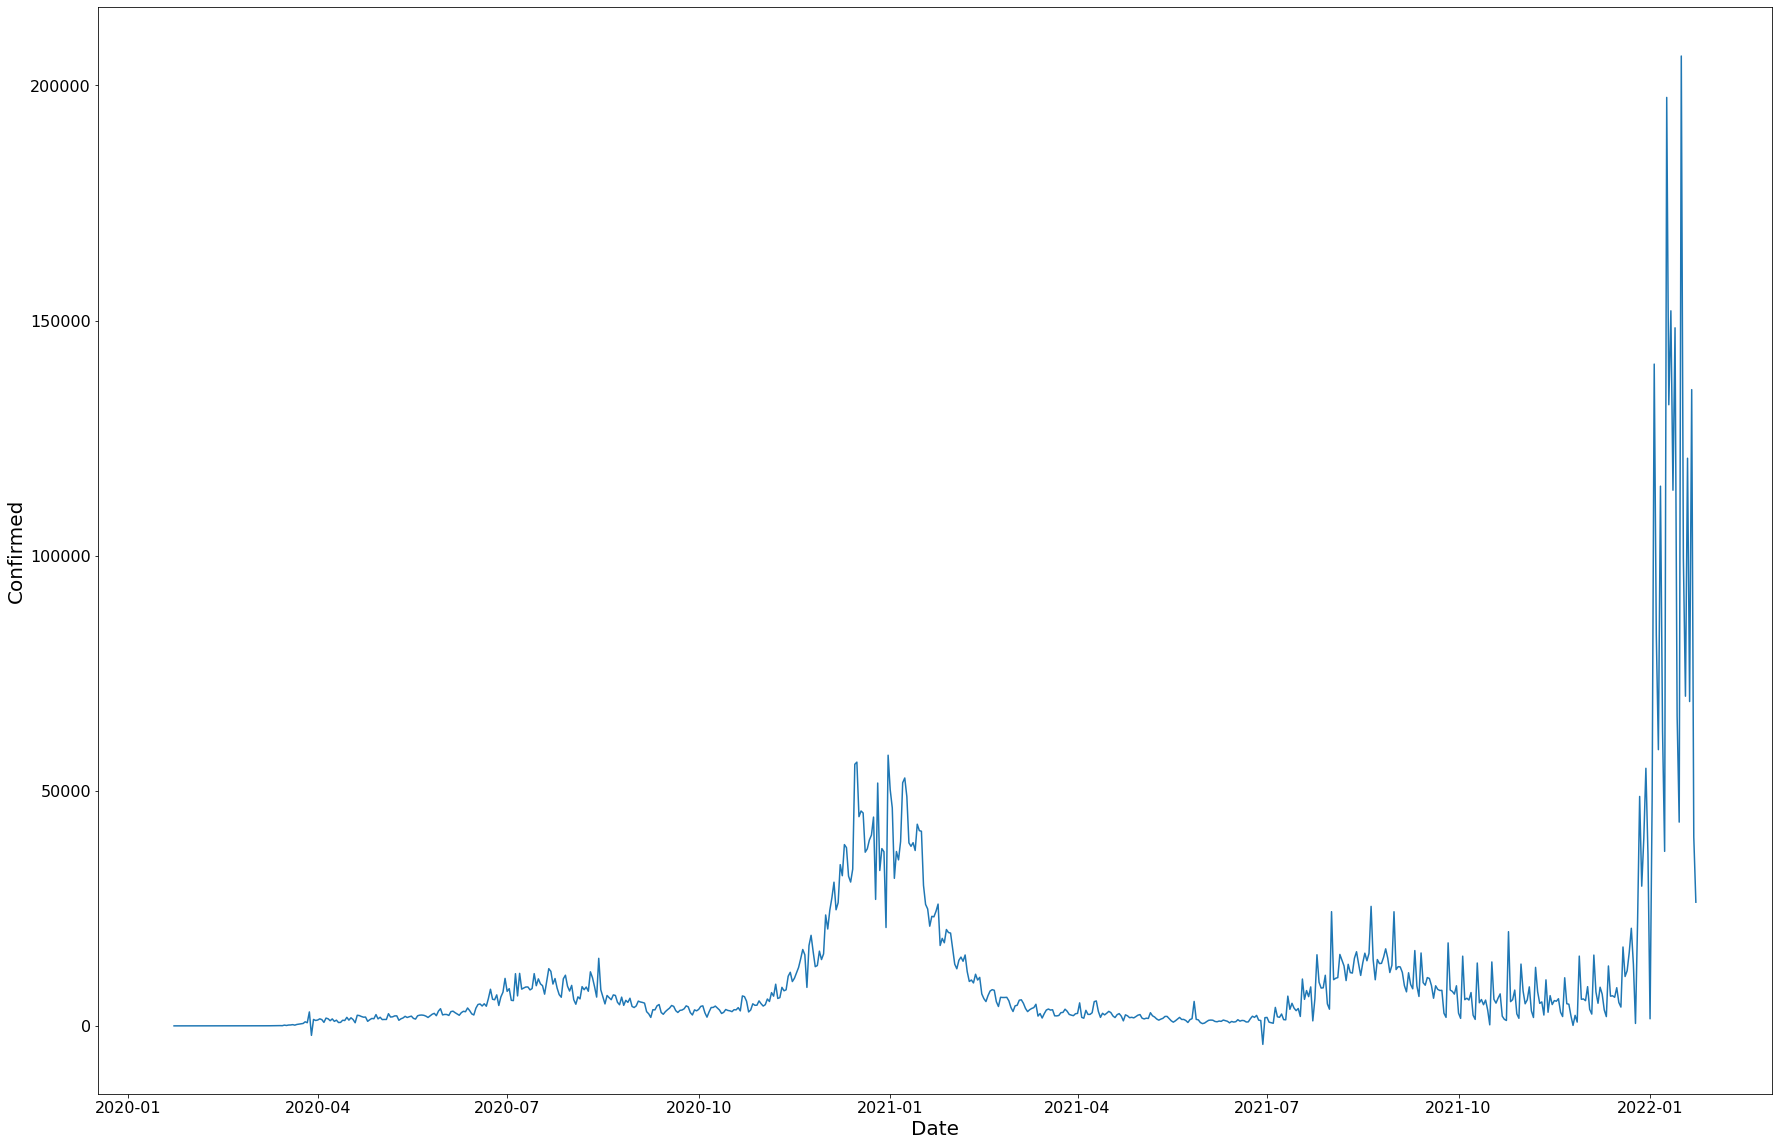

In [30]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Confirmed', fontsize=20)
plt.plot(dframe_Cal.sum().diff())

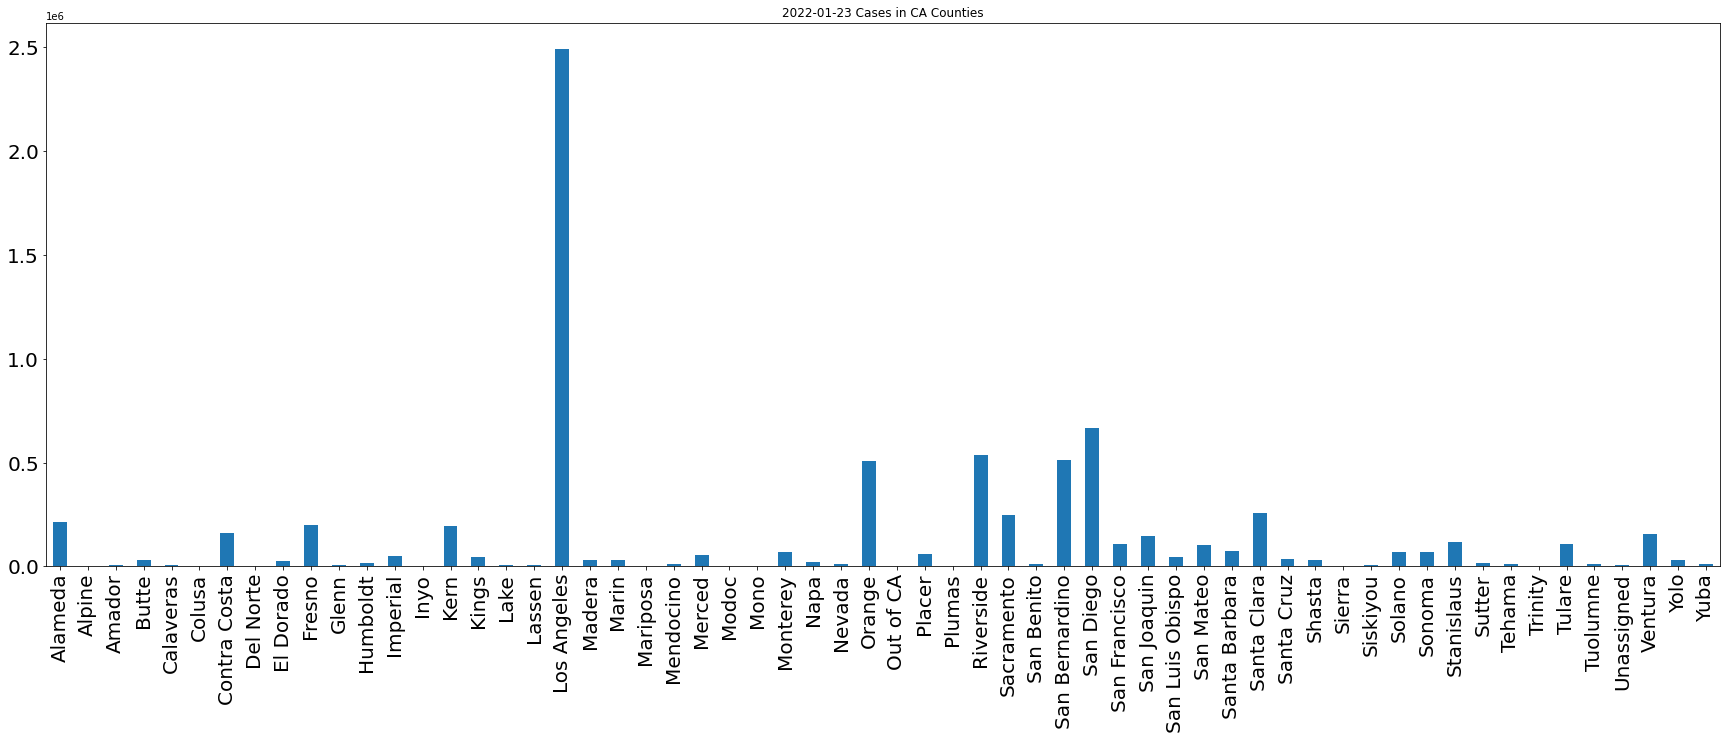

In [31]:
fig_1=dframe_Cal['2022-01-23'].plot.bar(title='2022-01-23 Cases in CA Counties',figsize=(30,10),fontsize=20)

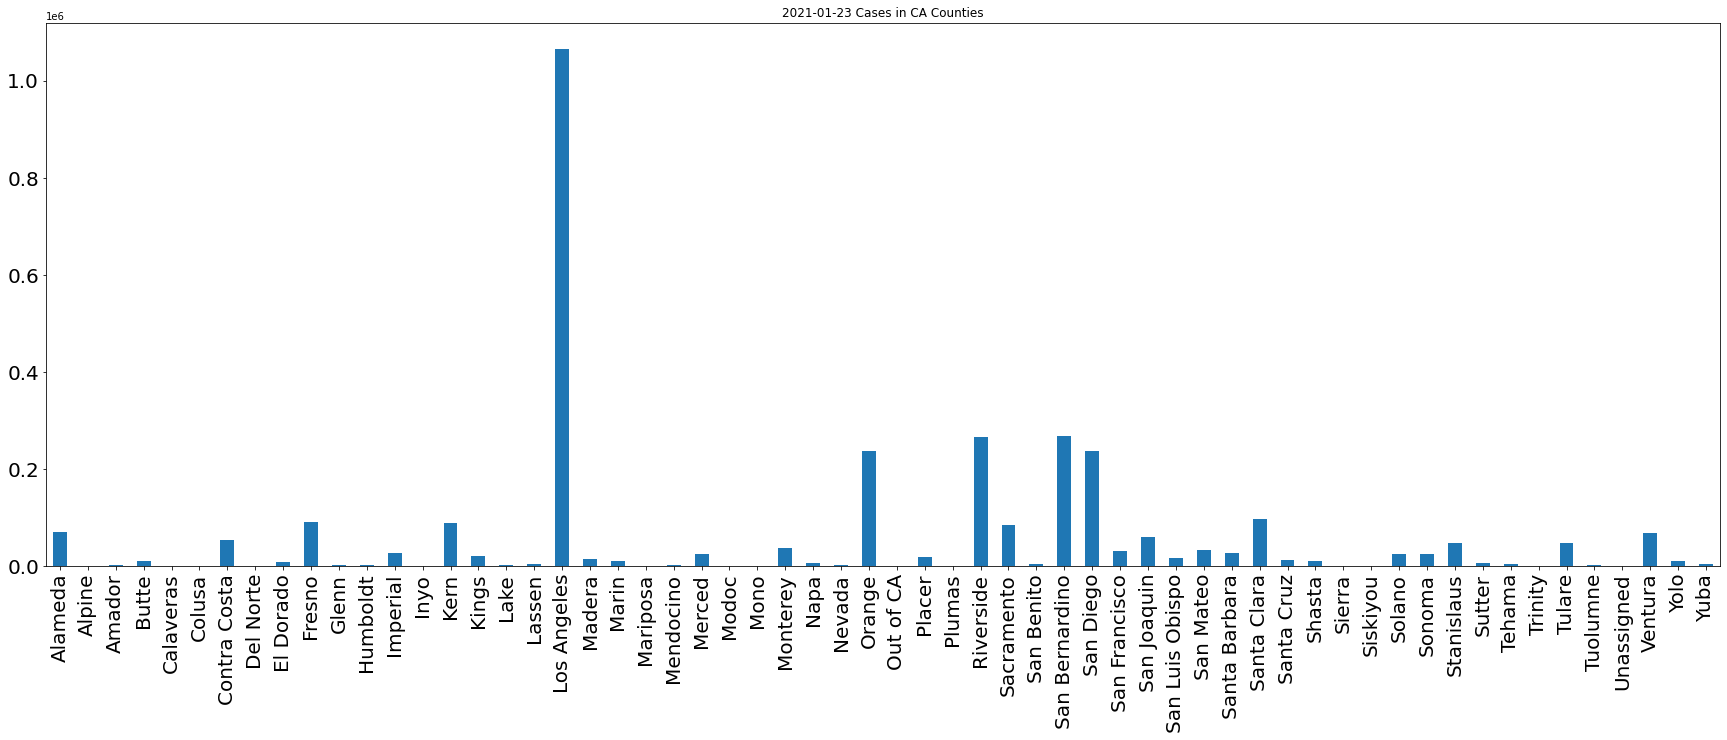

In [32]:
fig_2=dframe_Cal['2021-01-23'].plot.bar(title='2021-01-23 Cases in CA Counties',figsize=(30,10),fontsize=20)

<AxesSubplot:title={'center':'Diff 2021-01-23 to 2022-01-23 Cases in CA Counties'}>

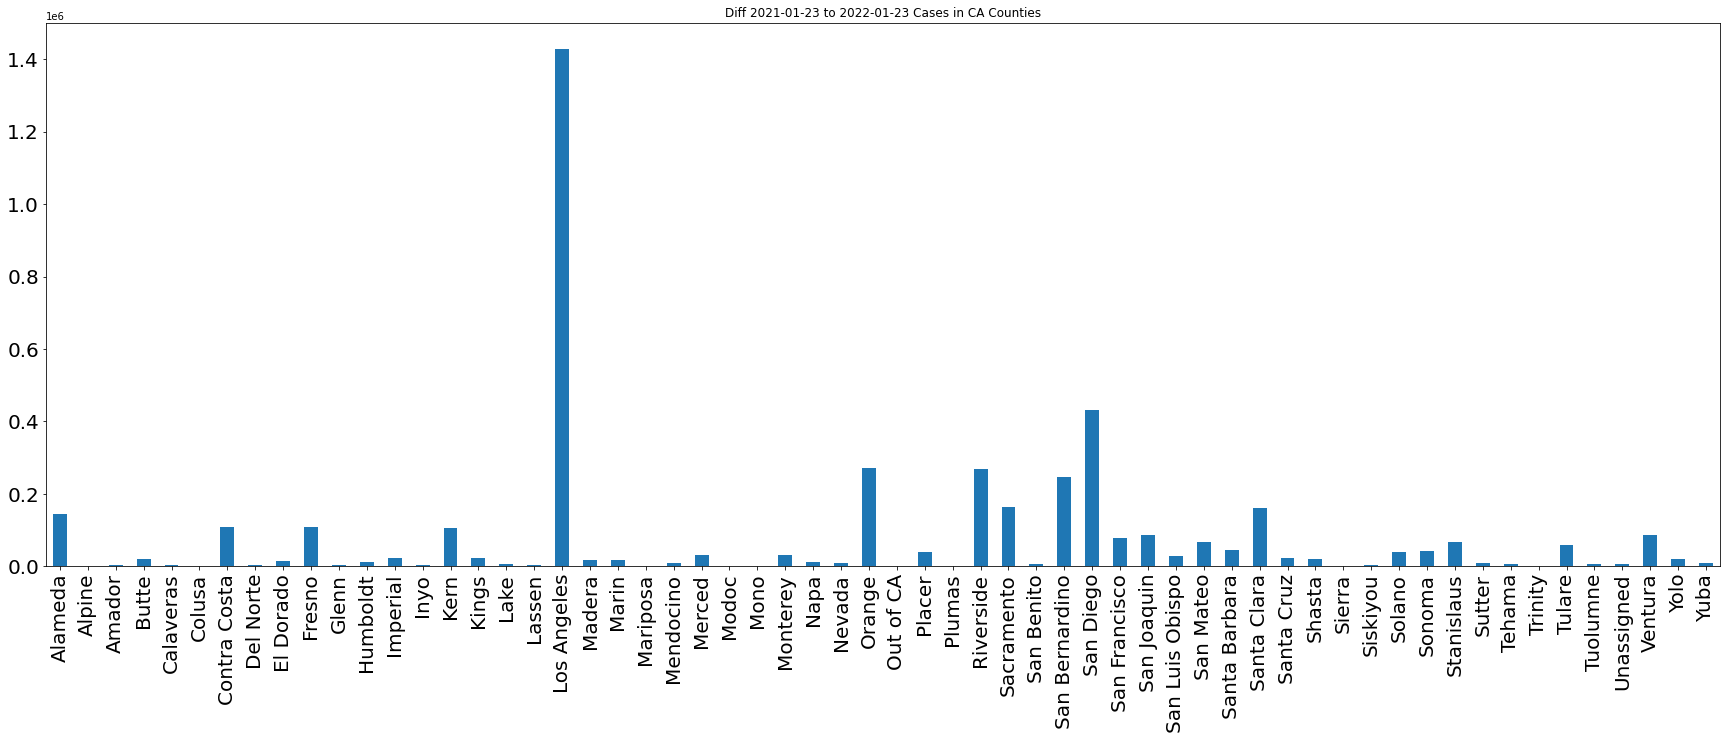

In [33]:
fig2=dframe_Cal['2022-01-23']-dframe_Cal['2021-01-23']
DataFrame(fig2).plot.bar(title='Diff 2021-01-23 to 2022-01-23 Cases in CA Counties',figsize=(30,10),legend=False,fontsize=20)

<AxesSubplot:title={'center':'Fold increase 2021-01-23 to 2022-01-23 Cases in CA Counties'}>

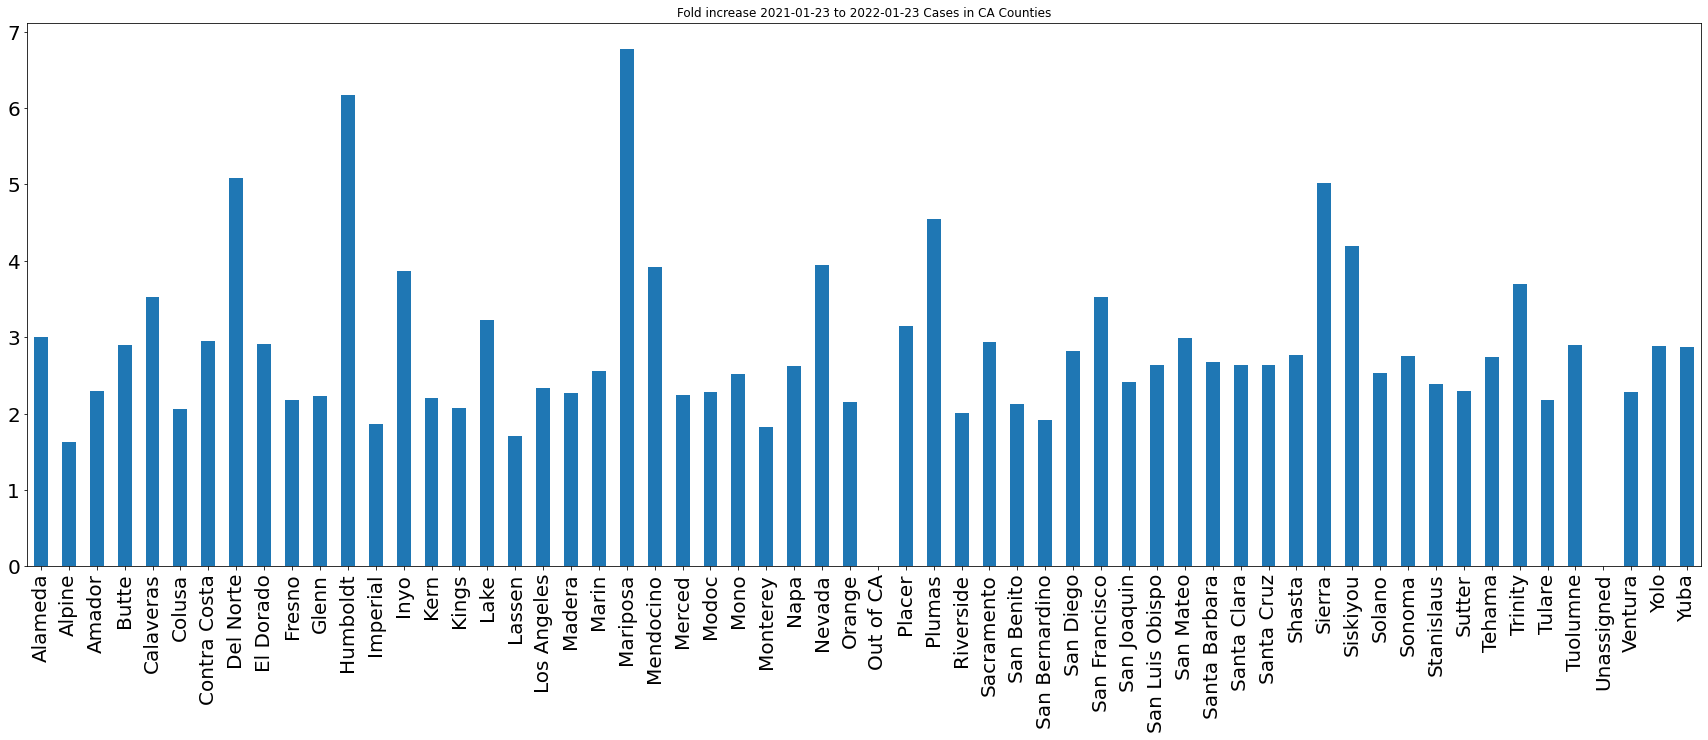

In [36]:
fig3=dframe_Cal['2022-01-23']/dframe_Cal['2021-01-23']
DataFrame(fig3).plot.bar(title='Fold increase 2021-01-23 to 2022-01-23 Cases in CA Counties',figsize=(30,10),legend=False,fontsize=20)

### Florida & the rest of the states

In [37]:
states = list(us_confirmed['Province/State'].unique())
states

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [38]:
States_confirmed=[]
for state in states:
    States_confirmed.append (us_confirmed[us_confirmed['Province/State']==state])
#States_confirmed

In [39]:
#Let's look at Florida next
Flor= State_by_county(us_confirmed,'Florida')
Flor

Date        2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Alachua              0           0           0           0           0   
Baker                0           0           0           0           0   
Bay                  0           0           0           0           0   
Bradford             0           0           0           0           0   
Brevard              0           0           0           0           0   
...                ...         ...         ...         ...         ...   
Union                0           0           0           0           0   
Volusia              0           0           0           0           0   
Wakulla              0           0           0           0           0   
Walton               0           0           0           0           0   
Washington           0           0           0           0           0   

Date        2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  \
Alachua              0           0           0           0           0  ...   
Baker                0           0           0           0           0  ...   
Bay                  0           0           0           0           0  ...   
Bradford             0           0           0           0           0  ...   
Brevard              0           0           0           0           0  ...   
...                ...         ...         ...         ...         ...  ...   
Union                0           0           0           0           0  ...   
Volusia              0           0           0           0           0  ...   
Wakulla              0           0           0           0           0  ...   
Walton               0           0           0           0           0  ...   
Washington           0           0           0           0           0  ...   

Date        2022-01-14  2022-01-15  2022-01-16  2022-01-17  2022-01-18  \
Alachua          47373       53902       53902       53902       53902   
Baker             6366        6802        6802        6802        6802   
Bay              35297       37964       37964       37964       37964   
Bradford          5673        6062        6062        6062        6062   
Brevard          97580      109128      109128      109128      109128   
...                ...         ...         ...         ...         ...   
Union             3265        3537        3537        3537        3537   
Volusia          90179       97641       97641       97641       97641   
Wakulla           7251        7873        7873        7873        7873   
Walton           13932       14818       14818       14818       14818   
Washington        4907        5346        5346        5346        5346   

Date        2022-01-19  2022-01-20  2022-01-21  2022-01-22  2022-01-23  
Alachua          53902       53902       58853       58853       58853  
Baker             6802        6802        7417        7417        7417  
Bay              37964       37964       40734       40734       40734  
Bradford          6062        6062        6517        6517        6517  
Brevard         109128      109128      117094      117094      117094  
...                ...         ...         ...         ...         ...  
Union             3537        3537        3778        3778        3778  
Volusia          97641       97641      103387      103387      103387  
Wakulla           7873        7873        8534        8534        8534  
Walton           14818       14818       15655       15655       15655  
Washington        5346        5346        5346        5831        5831  

[69 rows x 733 columns]

Text(0, 0.5, 'Total No. Cases (in Millions)')

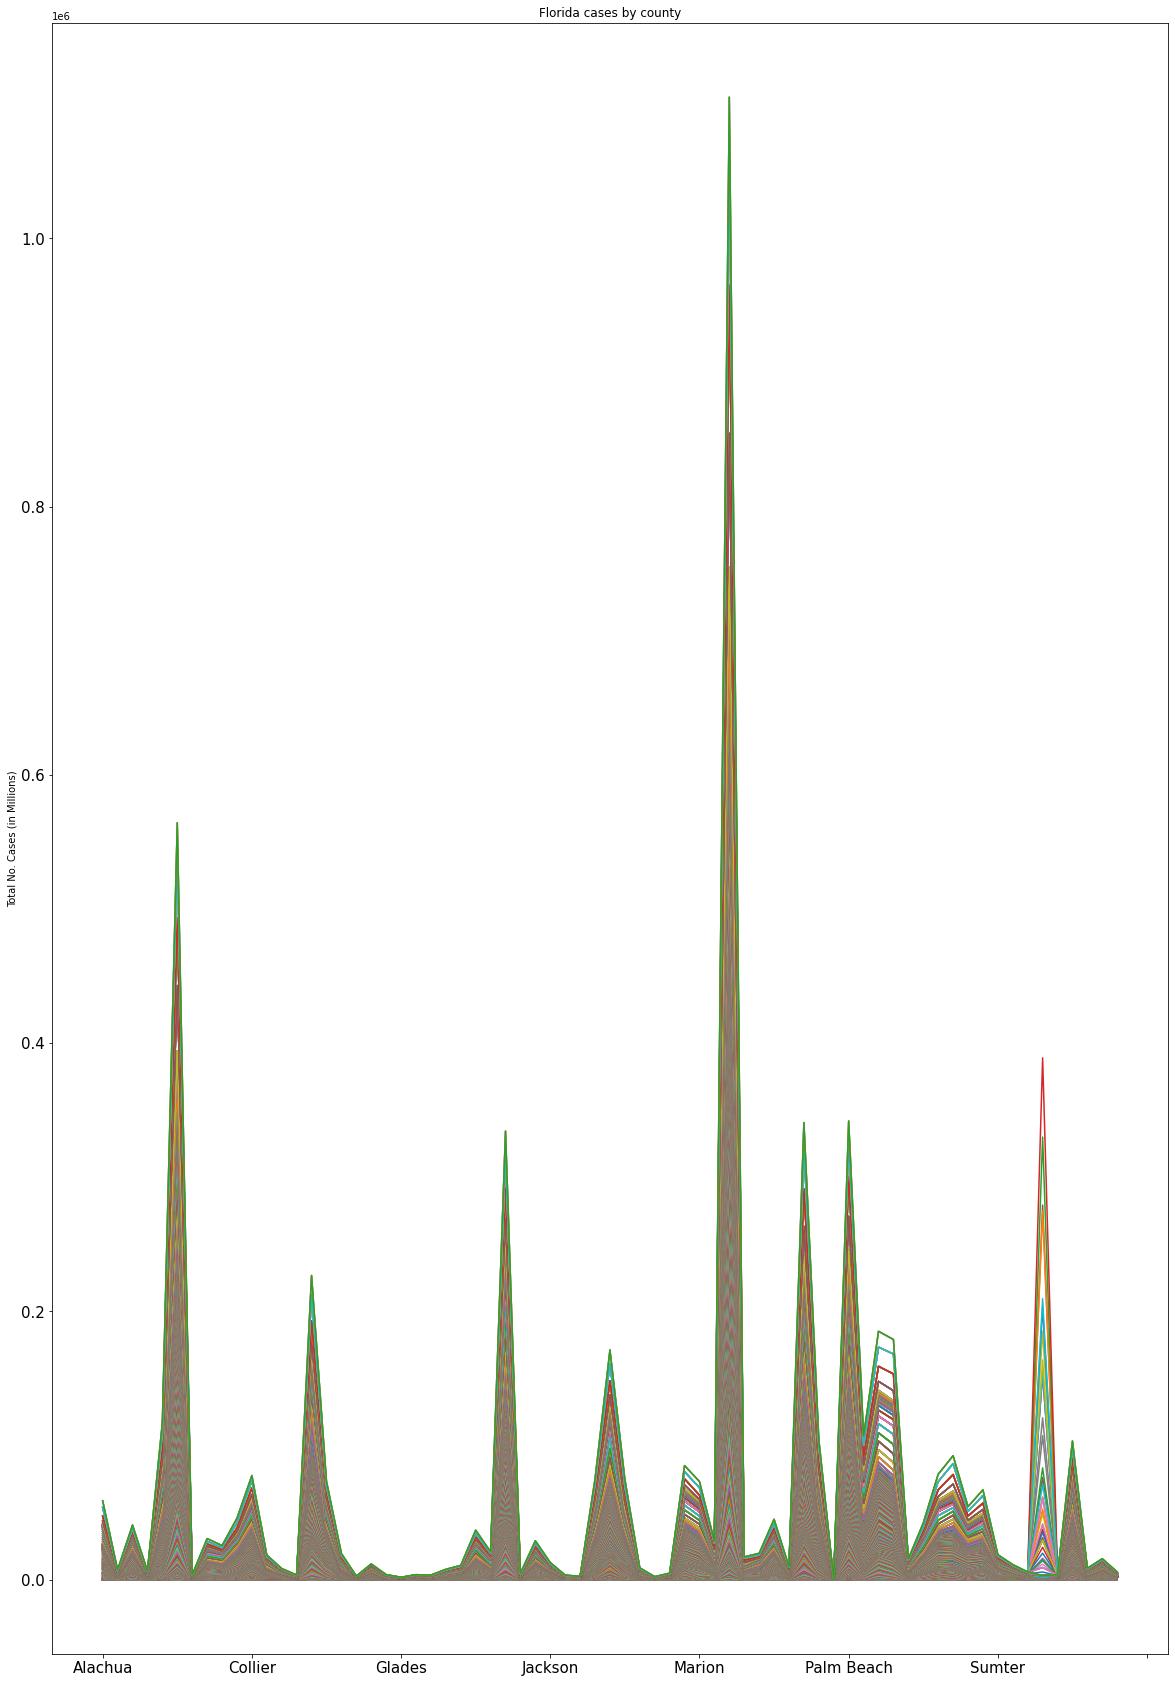

In [40]:
Flor.plot(title=('Florida cases by county'),figsize=(20,30),fontsize=15,legend=False)
plt.ylabel('Total No. Cases (in Millions)')

In [41]:
# Pivot the DF so it's by dae instead of by county
Florida_Counties=[]
for i in Flor.columns:
    Florida_Counties.append(Flor[i])
dframe_Flor=DataFrame(Florida_Counties)  

### California vs Florida

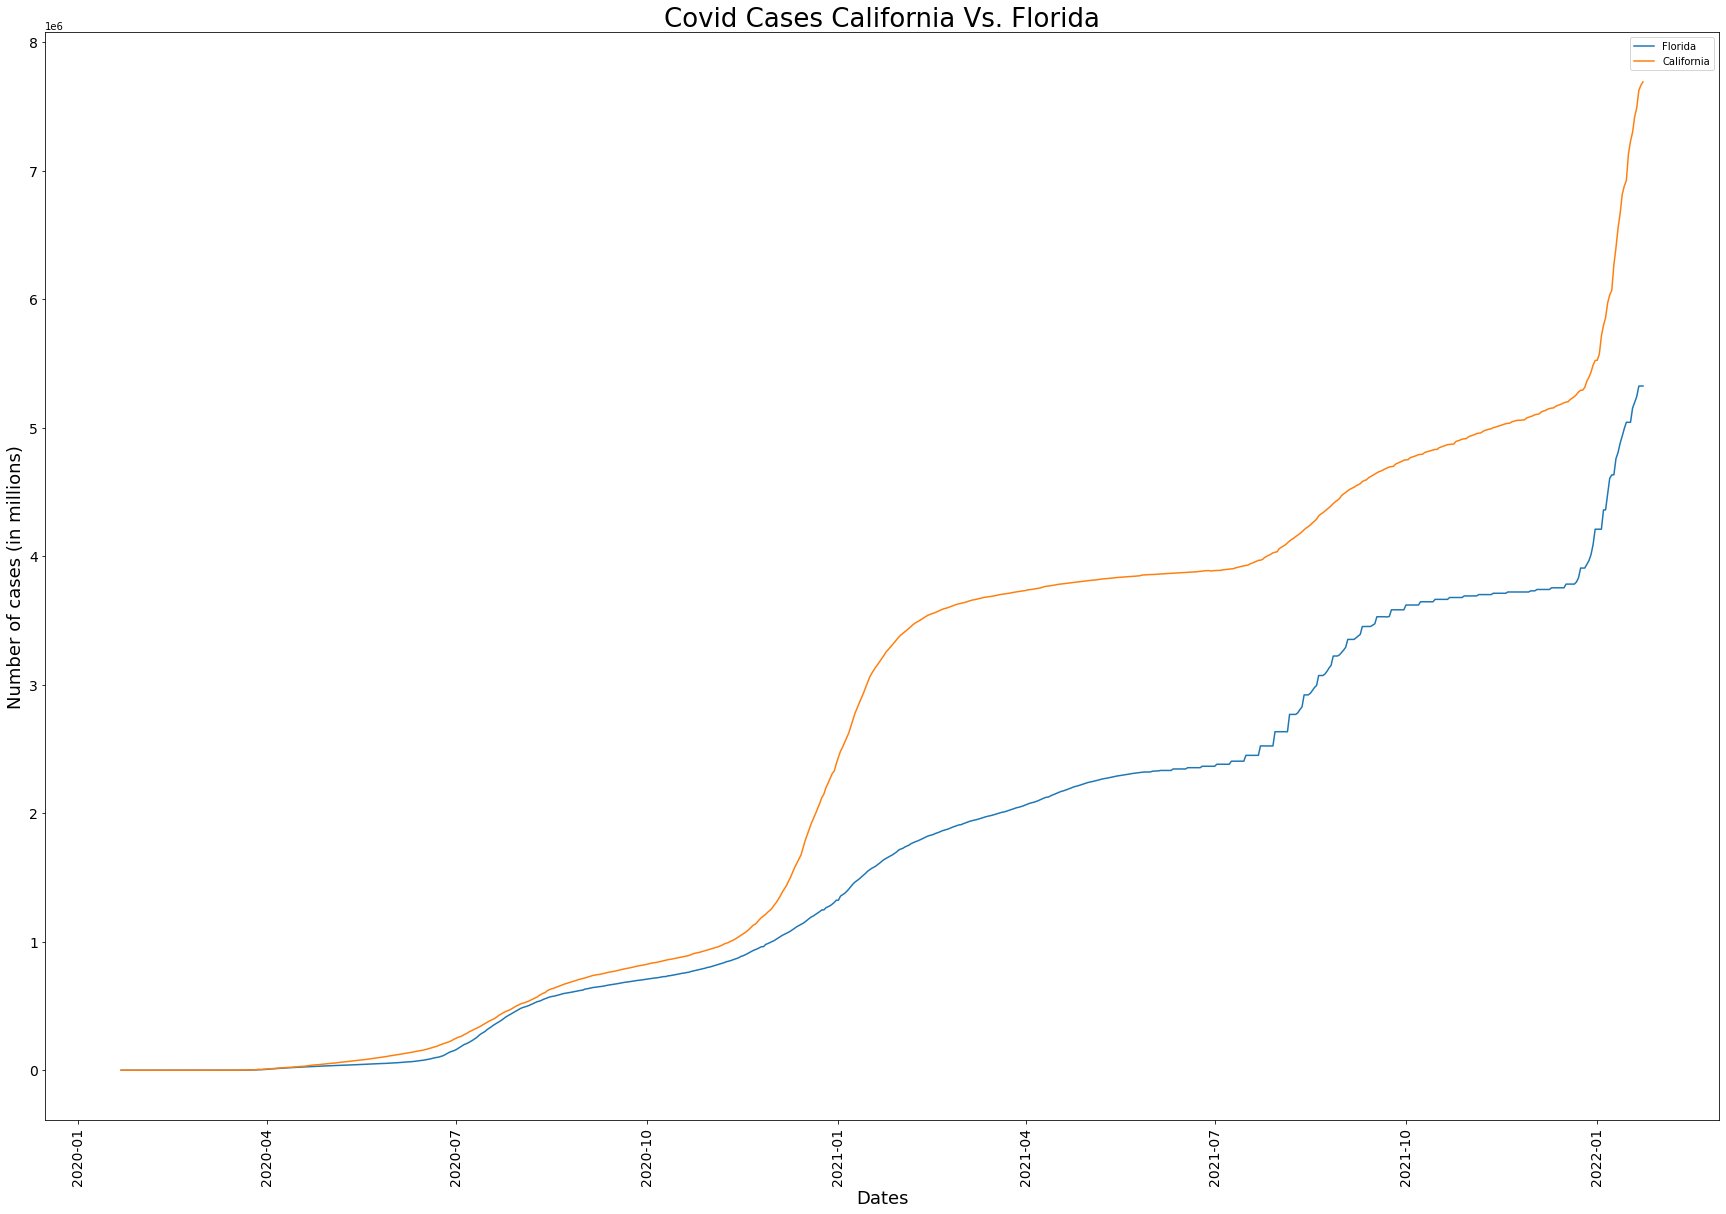

In [67]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases California Vs. Florida", fontsize=26)
_= plt.plot(Flor.sum(), label='Florida')
_= plt.plot(Cal.sum(), label='California')
_= plt.ylabel('Number of cases (in millions)', fontsize=18)
_= plt.yticks(fontsize=14)
_= plt.xlabel('Dates',fontsize=18)
_= plt.xticks(rotation=90, fontsize=14)
_= plt.legend()
plt.show()

In [68]:
_.figure.savefig('./figures/CA_v_Fl_cases.png')

In [44]:
# Populations per 1000 residents
Cal_pop=39538.223
Flor_pop=21538.187

In [45]:
# per capita calculations for covid cases per 1000 residents
Cal_sum=Cal.sum()
Flor_sum=Flor.sum()

Cal_per_Cap = Cal_sum.div(39538.223)
Flor_per_Cap = Flor_sum.div(21538.187)


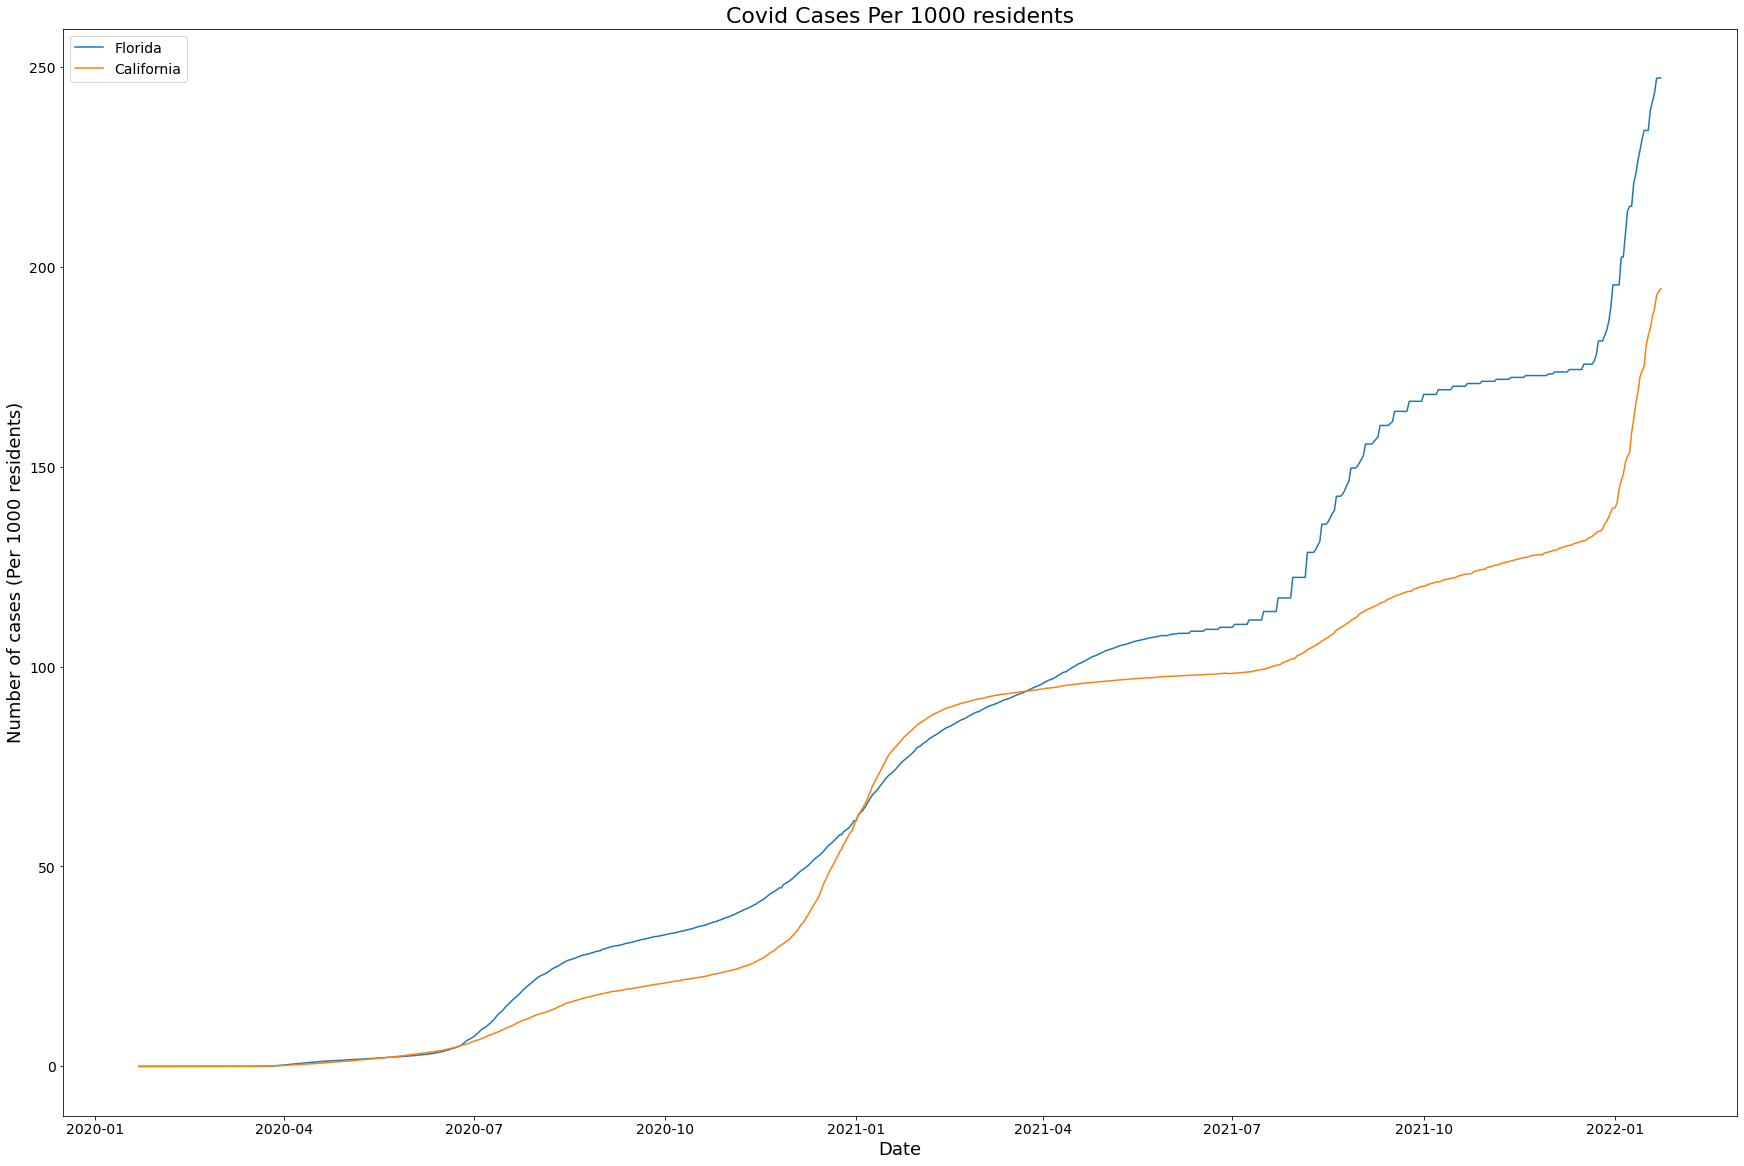

In [47]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases Per 1000 residents", fontsize=22)
_= plt.plot(Flor_per_Cap, label='Florida')
_= plt.plot(Cal_per_Cap, label='California')
_= plt.ylabel('Number of cases (Per 1000 residents)',fontsize=18)
_= plt.xlabel('Date', fontsize=18)
_= plt.yticks(fontsize=14)
_= plt.xticks(fontsize=14)
_= plt.legend(fontsize=14)
plt.show()

**This is total number of cases in each state.  We should look at current case loads too**

In [48]:
_.figure.savefig('./figures/CA_v_Fl_cases_per1K.png')

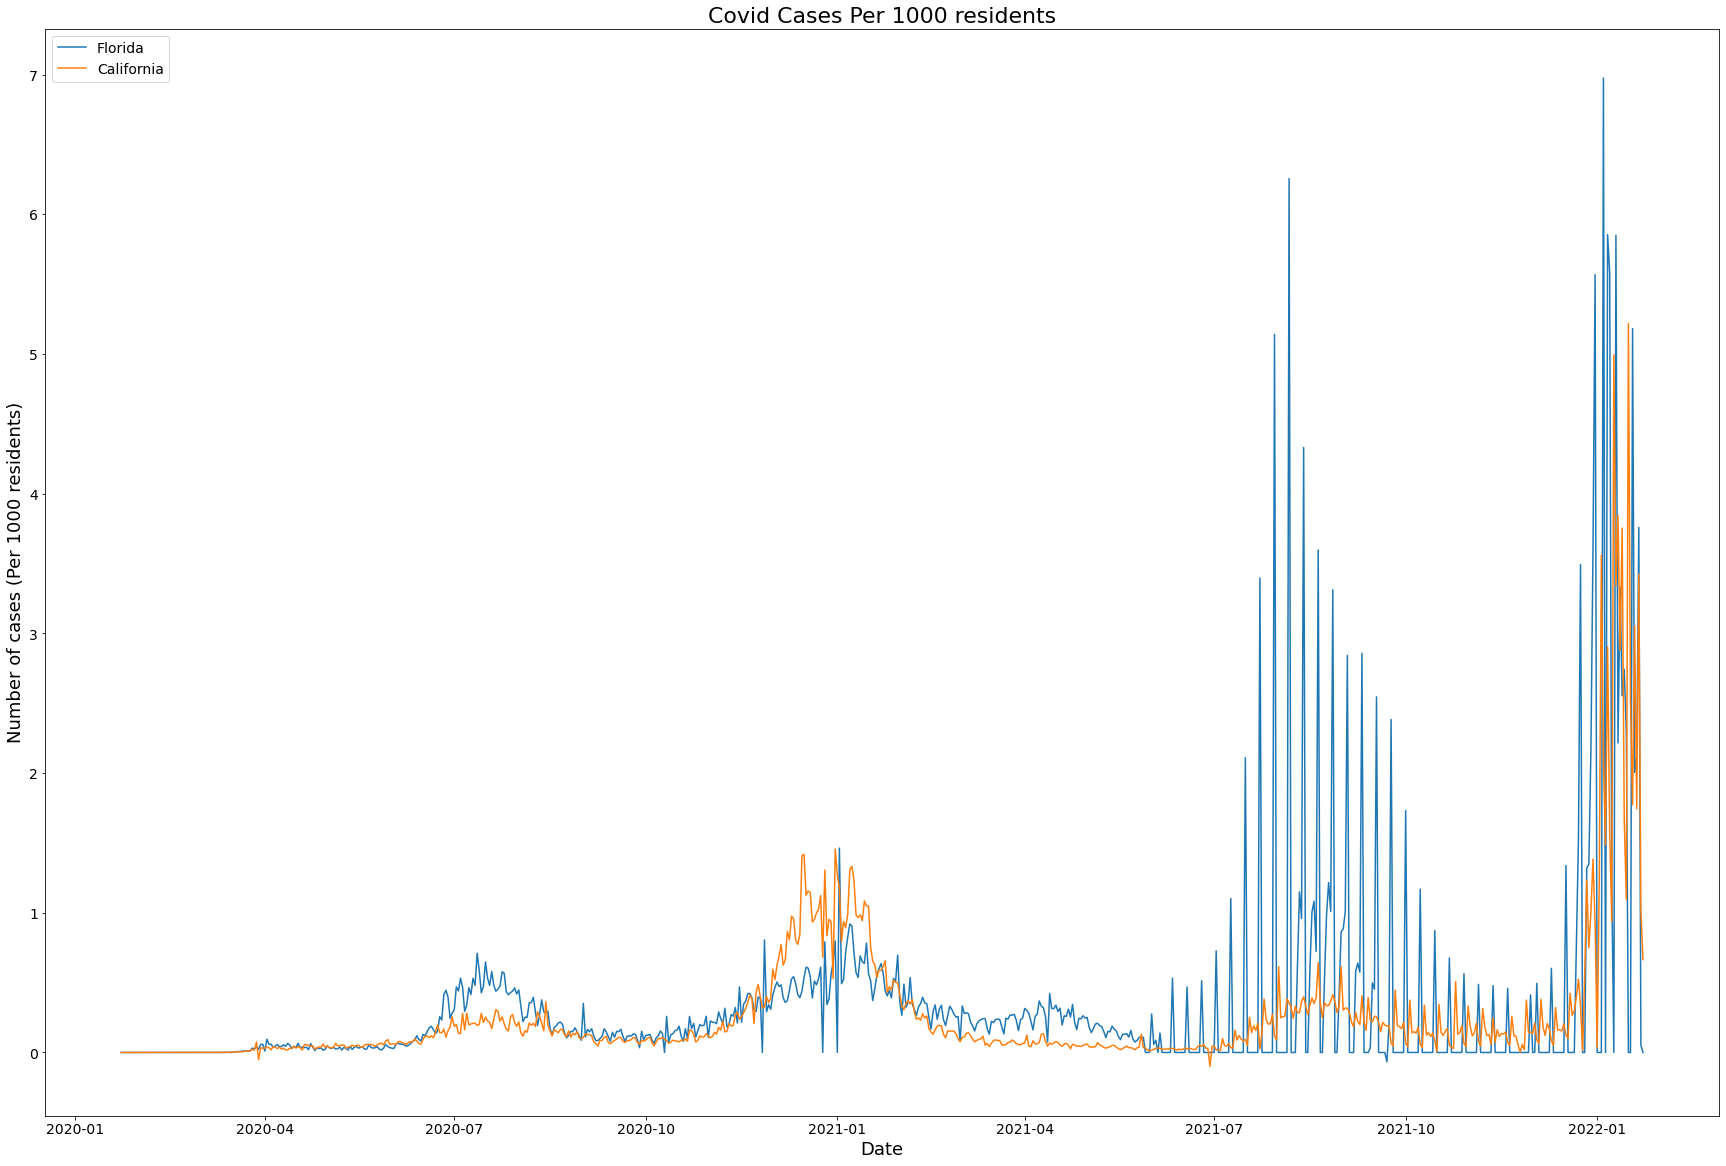

In [49]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases Per 1000 residents",fontsize=22)
_= plt.plot(Flor_per_Cap.diff(), label='Florida')
_= plt.plot(Cal_per_Cap.diff(), label='California')
_= plt.ylabel('Number of cases (Per 1000 residents)',fontsize=18)
_= plt.xlabel('Date', fontsize=18)
_= plt.yticks(fontsize=14)
_= plt.xticks(fontsize=14)
_= plt.legend(fontsize=14)
plt.show()

In [50]:
_.figure.savefig('./figures/CA_v_Fl_diff_per1K.png')

This is kind of interesting too.  Shows the daily COVID Cases for each state. 

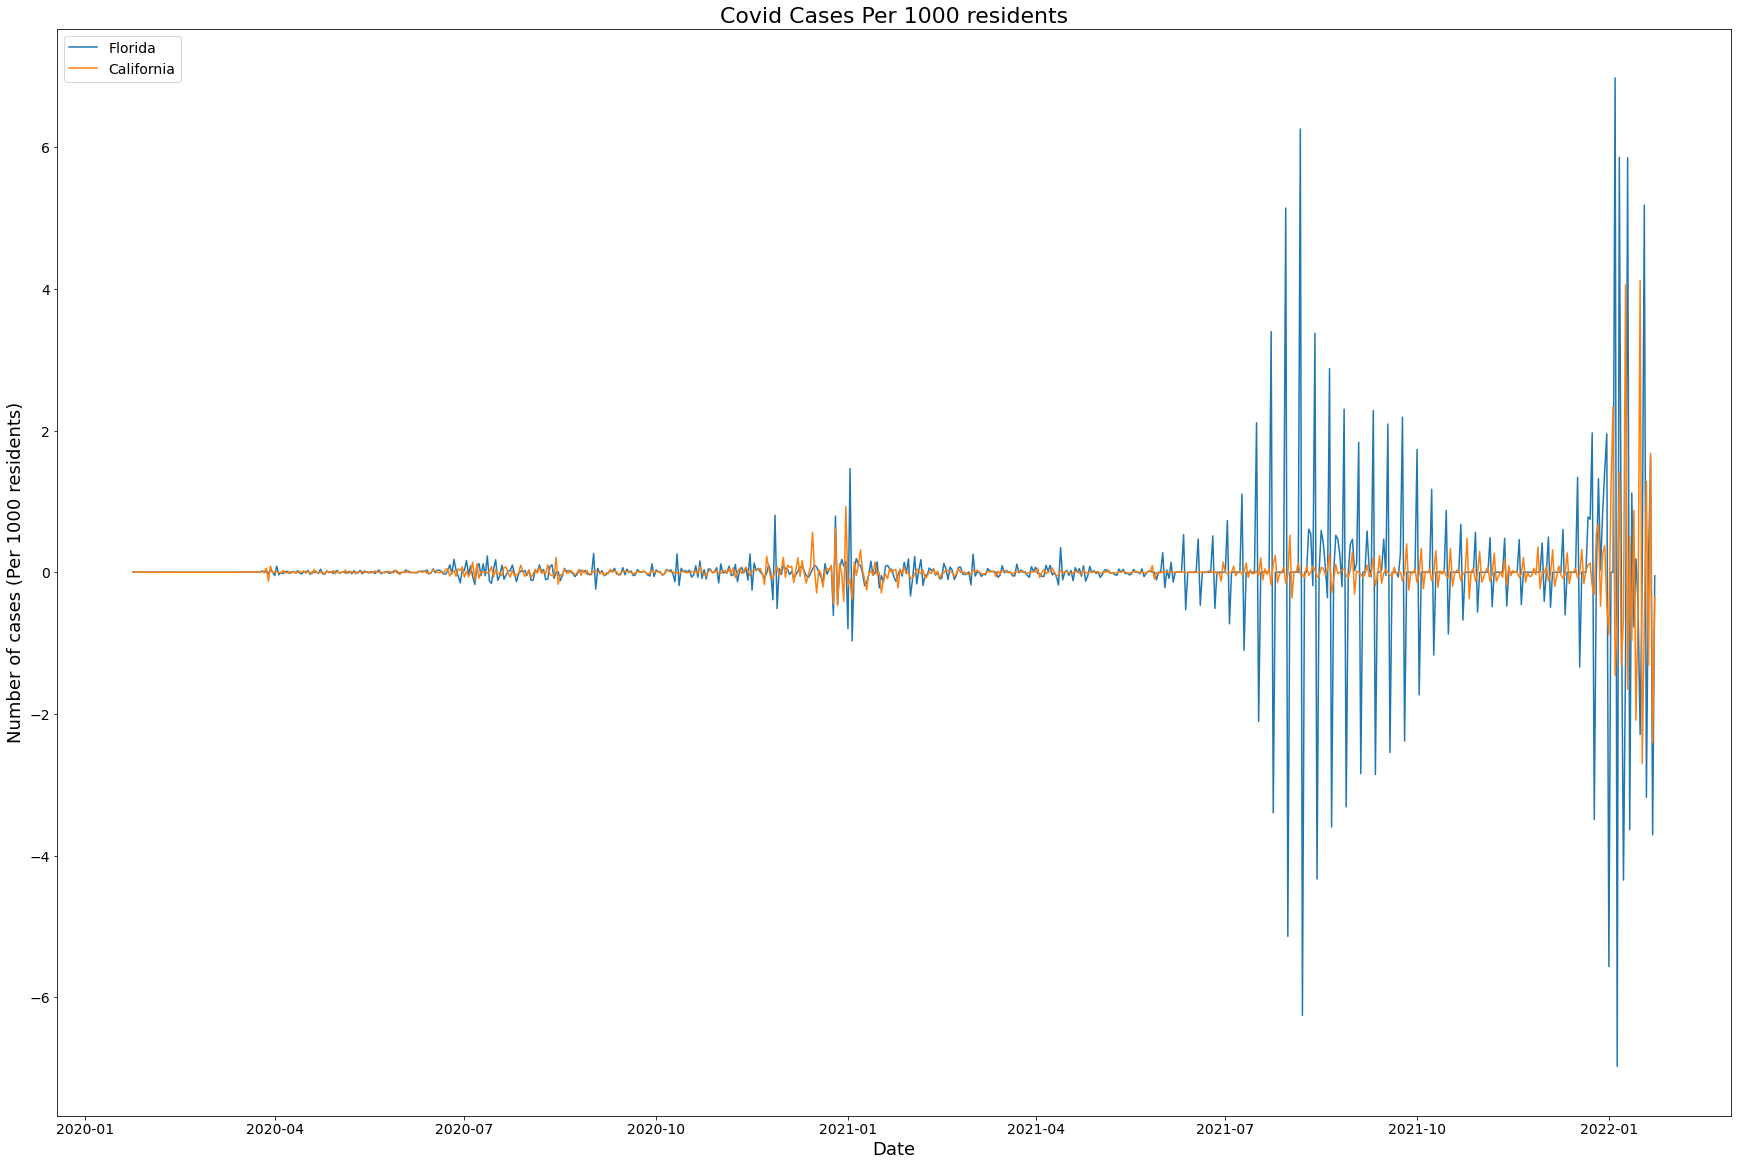

In [51]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases Per 1000 residents",fontsize=22)
_= plt.plot(Flor_per_Cap.diff().diff(), label='Florida')
_= plt.plot(Cal_per_Cap.diff().diff(), label='California')
_= plt.ylabel('Number of cases (Per 1000 residents)',fontsize=18)
_= plt.xlabel('Date', fontsize=18)
_= plt.yticks(fontsize=14)
_= plt.xticks(fontsize=14)
_= plt.legend(fontsize=14)
plt.show()

This one shows the variability of each day's trends.

I think it's less readable but shows some interesting things about covid cases in both states.

In [52]:
_.figure.savefig('./figures/CA_v_Fl_diff_diff_per1K.png')

In [53]:
# What about deaths?
us_deaths = dfs['us_deaths'].copy()
# Gets the data from California & Florida only
Cal_deaths=State_by_county(us_deaths,'California')
Flor_deaths=State_by_county(us_deaths,'Florida')

In [54]:
#Cal_County_Deaths=cities(dframe7)
#Flor_County_Deaths=cities(dframe8)
Cal_deaths_per_1k = Cal_deaths.div(39538.223)
Flor_deaths_per_1k = Flor_deaths.div(21538.187)

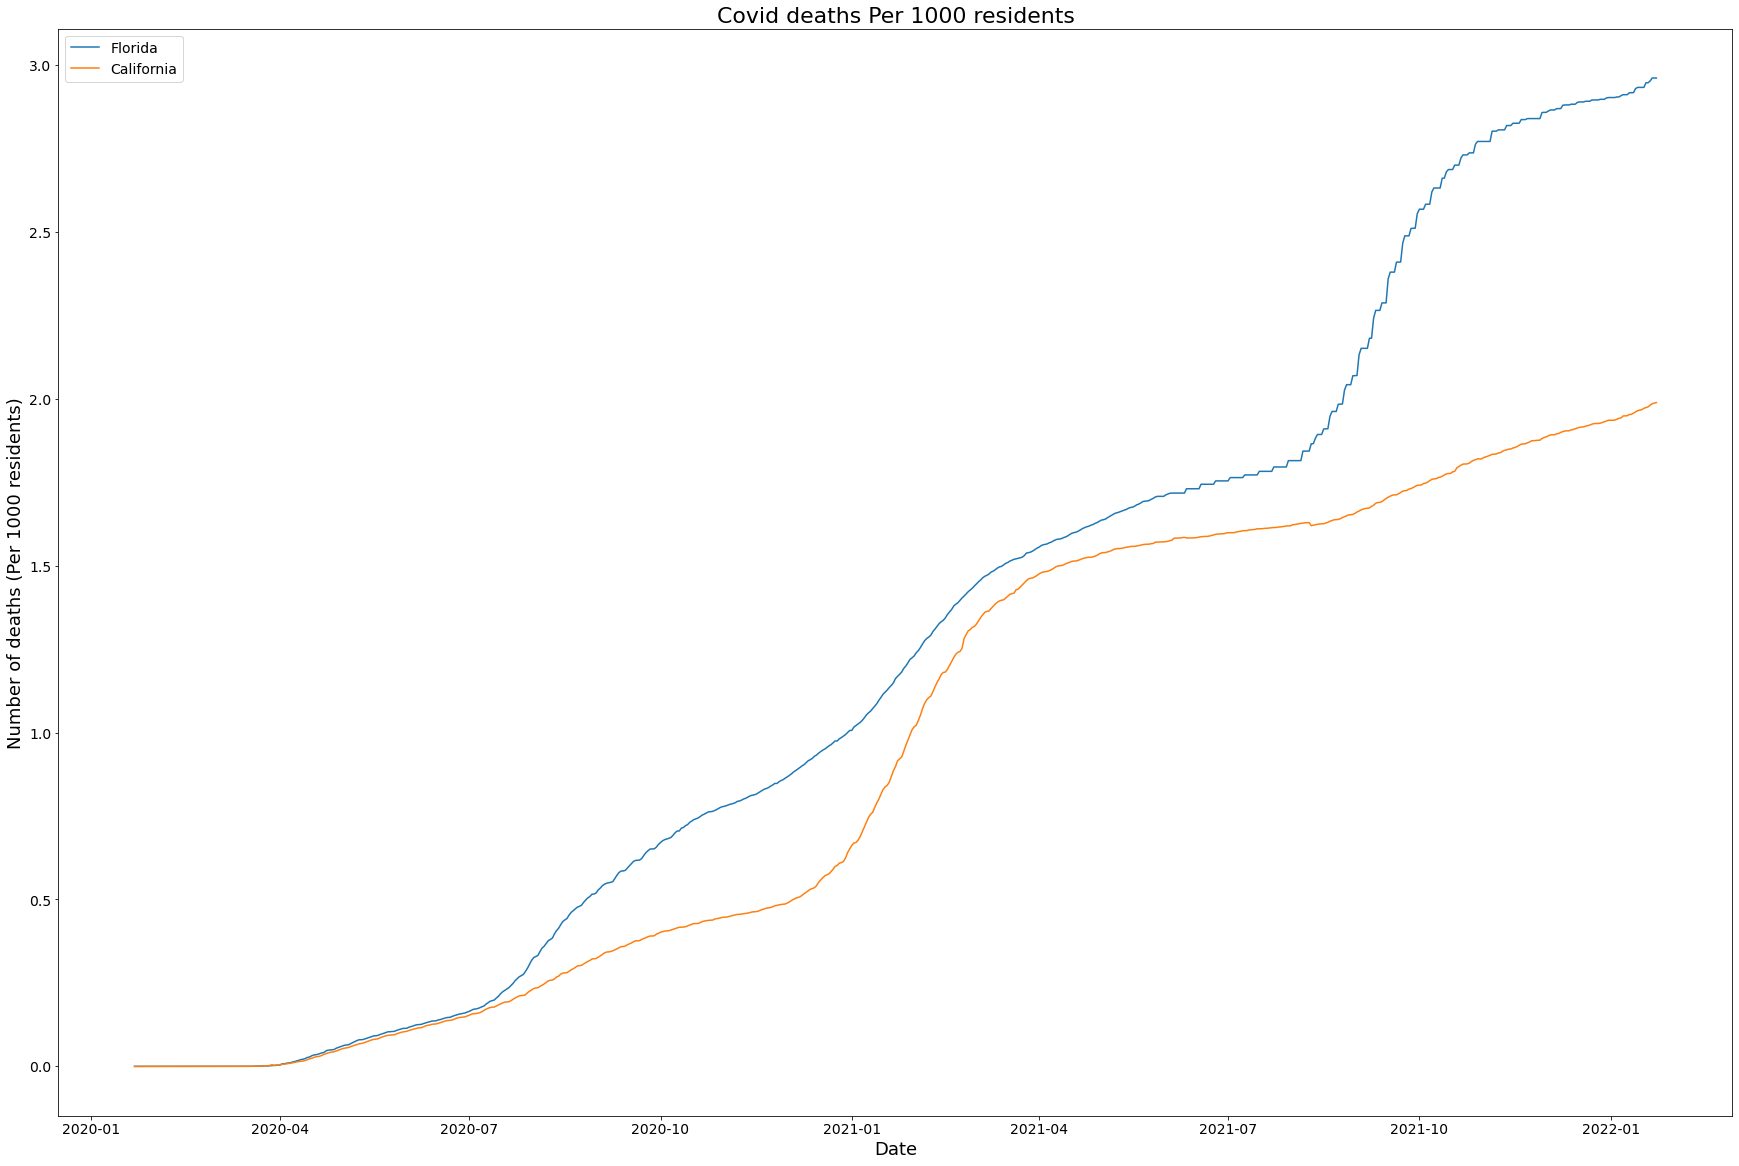

In [57]:
__= plt.figure(figsize=(30,20))
__= plt.title("Covid deaths Per 1000 residents",fontsize=22)
__= plt.plot(Flor_deaths_per_1k.sum(), label='Florida')
__= plt.plot(Cal_deaths_per_1k.sum(), label='California')
__= plt.ylabel('Number of deaths (Per 1000 residents)',fontsize=18)
__= plt.xlabel('Date', fontsize=18)
__= plt.yticks(fontsize=14)
__= plt.xticks(fontsize=14)
__= plt.legend(fontsize=14)
plt.show()

In [58]:
__.figure.savefig('./figures/CA_v_Fl_deaths_per1K.png')

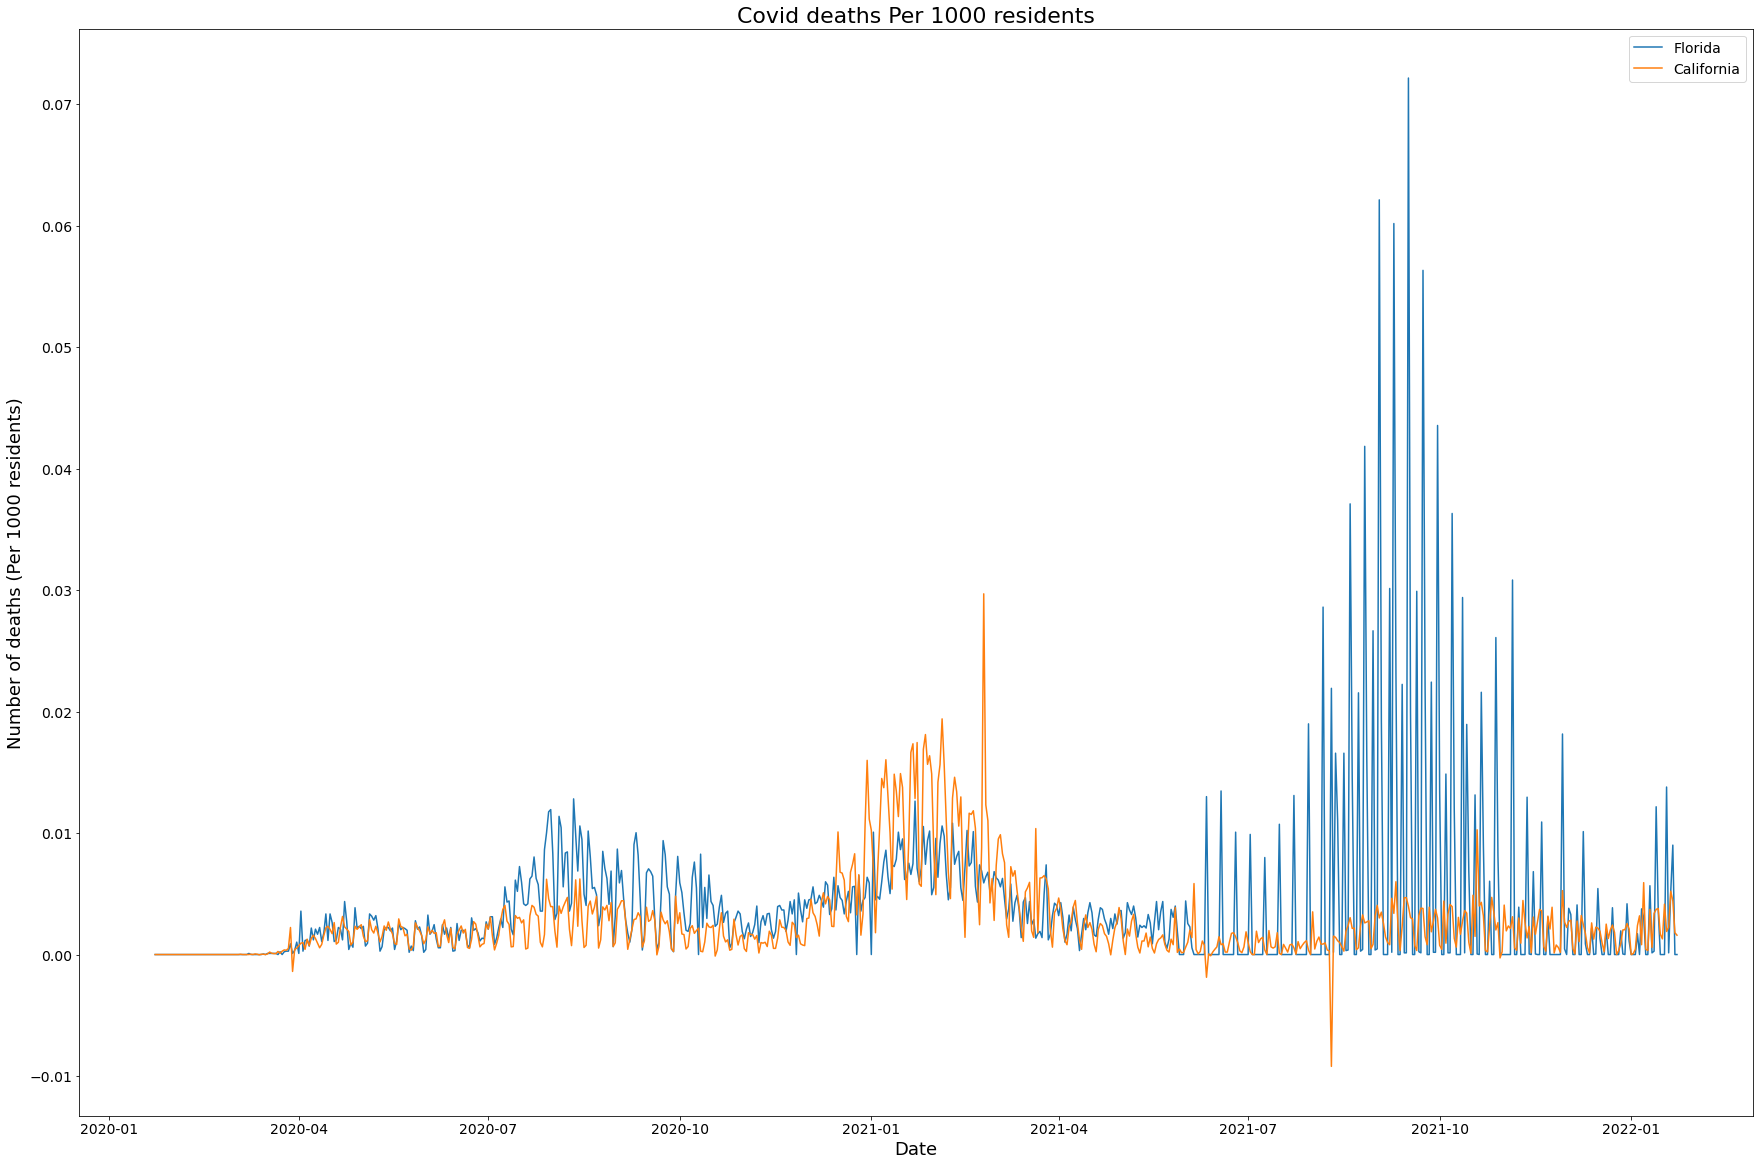

In [59]:
__= plt.figure(figsize=(30,20))
__= plt.title("Covid deaths Per 1000 residents", fontsize=22)
__= plt.plot(Flor_deaths_per_1k.sum().diff(), label='Florida')
__= plt.plot(Cal_deaths_per_1k.sum().diff(), label='California')
__= plt.ylabel('Number of deaths (Per 1000 residents)',fontsize=18)
__= plt.xlabel('Date', fontsize=18)
__= plt.yticks(fontsize=14)
__= plt.xticks(fontsize=14)
__= plt.legend(fontsize=14)
plt.show()

In [60]:
__.figure.savefig('./figures/CA_v_Fl_diff_deaths_per1K.png')

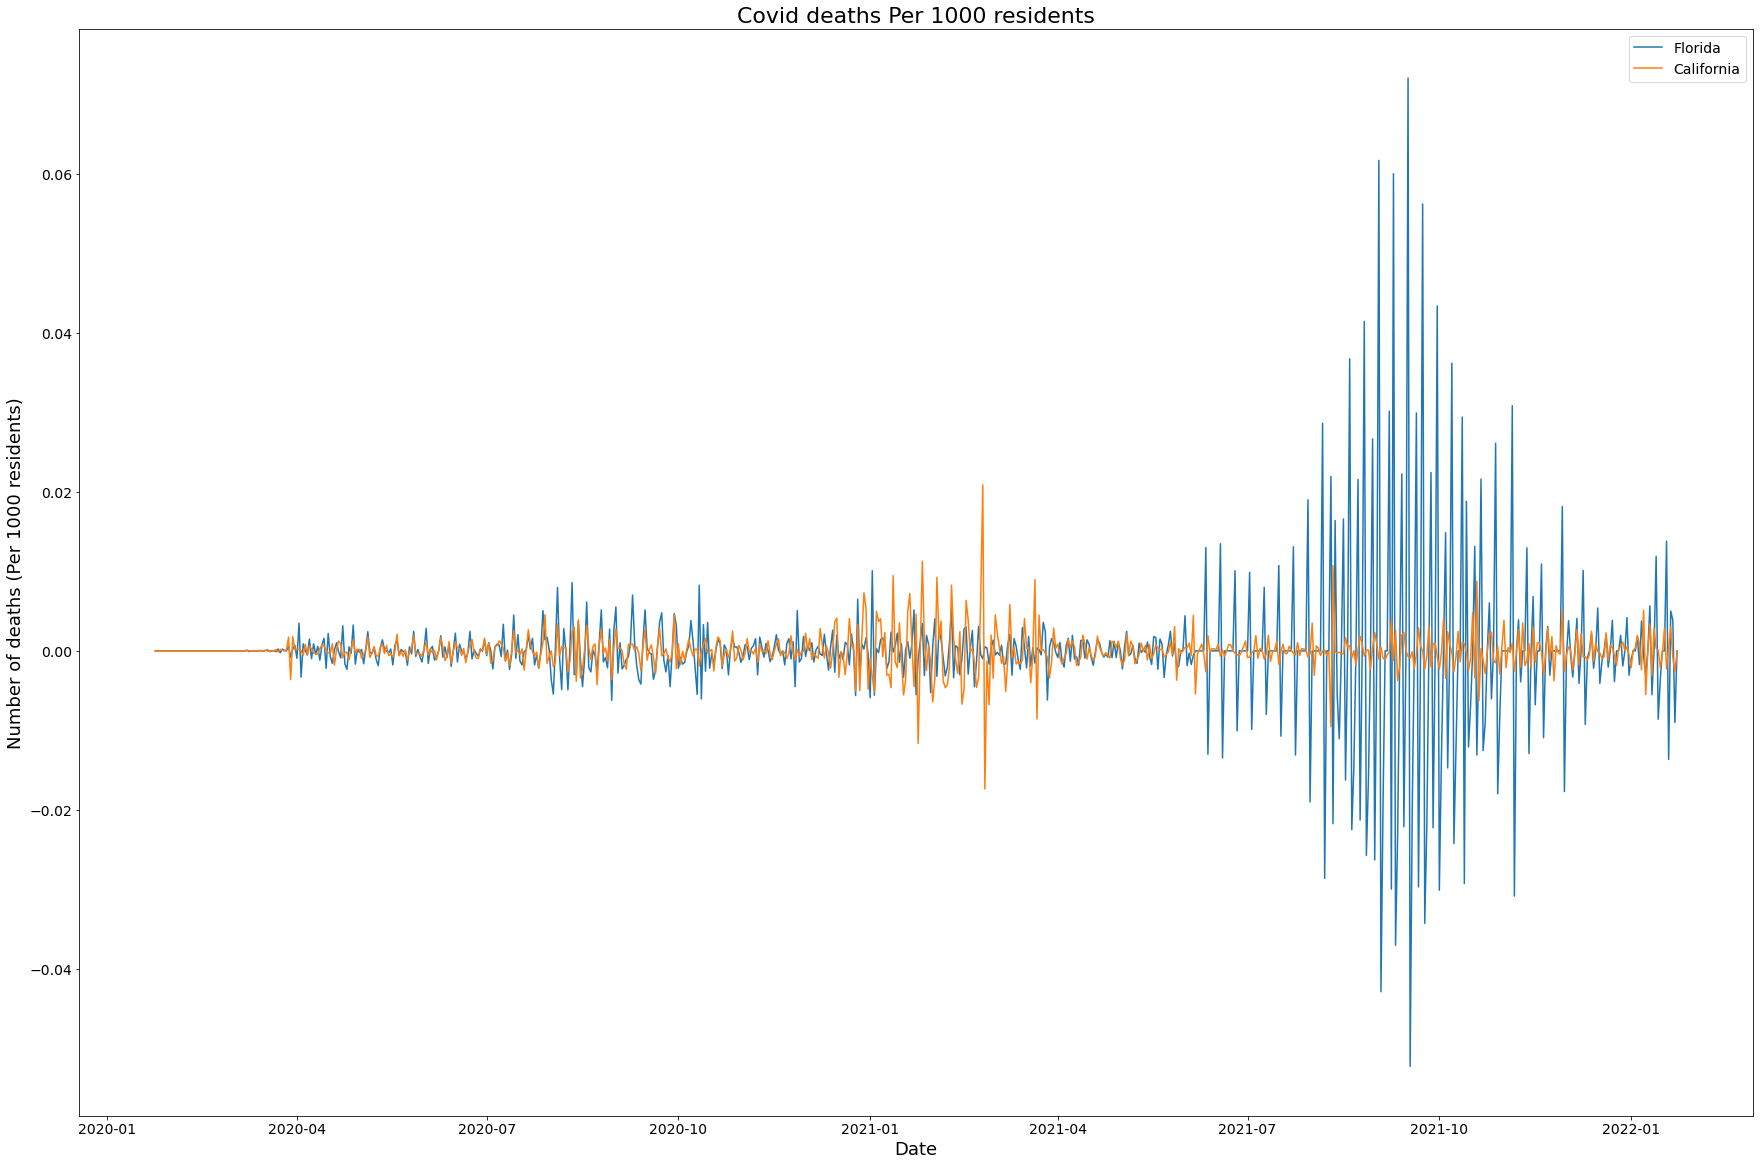

In [61]:
__= plt.figure(figsize=(30,20))
__= plt.title("Covid deaths Per 1000 residents", fontsize=22)
__= plt.plot(Flor_deaths_per_1k.sum().diff().diff(), label='Florida')
__= plt.plot(Cal_deaths_per_1k.sum().diff().diff(), label='California')
__= plt.ylabel('Number of deaths (Per 1000 residents)',fontsize=18)
__= plt.xlabel('Date', fontsize=18)
__= plt.yticks(fontsize=14)
__= plt.xticks(fontsize=14)
__= plt.legend(fontsize=14)
plt.show()

In [62]:
__.figure.savefig('./figures/CA_v_Fl_diff_diff_deaths_per1K.png')

### The rest of the states

In [63]:
# We can look at this data without having to do the summation for each state by day if we get the simplified version of the data
simplified = dfs['us_simplified'].copy() # This data only has the confirmed cases and deaths by state for each date no county data
simplified

Date   Admin2 Province/State  Confirmed Deaths Country/Region
index                                                                      
0       2020-01-22  Autauga        Alabama          0      0             US
1       2020-01-23  Autauga        Alabama          0      0             US
2       2020-01-24  Autauga        Alabama          0      0             US
3       2020-01-25  Autauga        Alabama          0      0             US
4       2020-01-26  Autauga        Alabama          0      0             US
...            ...      ...            ...        ...    ...            ...
2449681 2022-01-19   Weston        Wyoming       1332     16             US
2449682 2022-01-20   Weston        Wyoming       1341     16             US
2449683 2022-01-21   Weston        Wyoming       1349     16             US
2449684 2022-01-22   Weston        Wyoming       1349     16             US
2449685 2022-01-23   Weston        Wyoming       1349     16             US

[2449686 rows x 6 columns]

## Mortality Calculations 

These calculation didn't seem to work because they have the flaw of not every state (or county) was up to date recording cases and deaths.  This leads to above 100% mortality rates at some dates which shouldn't be possible.  

In [50]:
def mortality (state):
    '''Takes a state from the simplified db of covid cases and adds a column for Mortality rate'''
    mask = simplified['Province/State']==state
    results=simplified.loc[mask,:]
    results['Mortality']=(results['Deaths']/results['Confirmed'])*100
    results.replace([np.inf, -np.inf], np.nan, inplace=True)
    results.dropna(inplace=True)
    return results

In [ ]:
Cal_deaths2=mortality('California')
Flor_deaths2=mortality('Florida')

In [51]:
Cal_deaths2.describe()

Confirmed        Deaths     Mortality
count  3.961900e+04  39619.000000  39619.000000
mean   4.643215e+04    685.258689      1.391399
std    1.504318e+05   2557.388636      3.272900
min    1.000000e+00      0.000000      0.000000
25%    6.615000e+02      6.000000      0.688587
50%    5.935000e+03     66.000000      1.137412
75%    3.140300e+04    367.000000      1.498734
max    2.494097e+06  28480.000000    100.000000

In [52]:
Flor_deaths2.describe()

Confirmed        Deaths     Mortality
count  4.584200e+04  45842.000000  45842.000000
mean   2.682041e+04    423.443283      3.898352
std    6.907227e+04   1382.816541     37.967290
min    1.000000e+00      0.000000      0.000000
25%    1.441000e+03     21.000000      1.070664
50%    5.179000e+03     87.000000      1.545232
75%    2.206700e+04    368.000000      2.226142
max    1.105391e+06  25840.000000   1566.666667

Maxamun of 100% mortality in California!  And 1566% in Florida?  This clearly shows that our collection of data is not catching all the individuals who have COVID in relation to those who die with it.  

This could be like concervatives have been saying and we are reporting more deaths associated with COVID than are people who have COVID,  OR we are under reporting those who have COVID thus the death numbers get too high.  

Either way it's not a useful metric.

In [53]:
# The first time I did this I didn't do my calculations correctly.  This groups by dat and gets the sum to compare.
Flor_deaths2.groupby('Date').fillna(0).sum()

Admin2            AlachuaAlachuaAlachuaAlachuaAlachuaAlachuaAlac...
Province/State    FloridaFloridaFloridaFloridaFloridaFloridaFlor...
Confirmed                                                1229501228
Deaths                                                     19411487
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                             178708.259876
dtype: object

In [54]:
print("Overall Florida Mortality: ", round((Flor_deaths2['Deaths'].fillna(0).sum()/Flor_deaths2['Confirmed'].fillna(0).sum())*100,2), '%')

Overall Florida Mortality:  1.58 %


In [55]:
Cal_deaths2.groupby('Date').fillna(0).sum()

Admin2            AlamedaAlamedaAlamedaAlamedaAlamedaAlamedaAlam...
Province/State    CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
Confirmed                                                1839595402
Deaths                                                     27149264
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                              55125.831287
dtype: object

In [56]:
print("Overall California Mortality: ", round((Cal_deaths2['Deaths'].fillna(0).sum()/Cal_deaths2['Confirmed'].fillna(0).sum())*100,2), '%')

Overall California Mortality:  1.48 %


**not a very big difference. But things are looking better in California**

In [57]:
Flor_deaths2['Mortality'][Flor_deaths2["Date"]=='2022-01-23'].describe()

count    68.000000
mean      1.859214
std       2.350779
min       0.594118
25%       1.271703
50%       1.511954
75%       1.858013
max      20.432286
Name: Mortality, dtype: float64

In [58]:
Cal_deaths2['Mortality'][Cal_deaths2["Date"]=='2022-01-23'].describe()

count    59.000000
mean      0.893338
std       0.363525
min       0.000000
25%       0.689491
50%       0.854473
75%       1.104018
max       1.673750
Name: Mortality, dtype: float64

In [59]:
print ('Mortality Florida 2022-01-23','\nMean: ',Flor_deaths2['Mortality'][Flor_deaths2["Date"]=='2022-01-23'].mean(), '\nMax: ',Flor_deaths2['Mortality'][Flor_deaths2["Date"]=='2022-01-23'].max())
print('')
print ('Mortality California 2022-01-23','\nMean: ',Cal_deaths2['Mortality'][Cal_deaths2["Date"]=='2022-01-23'].mean(), '\nMax: ',Cal_deaths2['Mortality'][Cal_deaths2["Date"]=='2022-01-23'].max())

Mortality Florida 2022-01-23 
Mean:  1.8592135914565808 
Max:  20.432286389733196

Mortality California 2022-01-23 
Mean:  0.893338023441981 
Max:  1.6737495913697287


This tells a much different story.  Overall mortality rate seemed pretty close.  However when you look at the data factoring in individual county variability <font color='red'>California is less than 1/2 as likely to have a covid case result in death than Florida on average, During the worst of it was **12 times more likely** to die in Florida than California.</font> 

<font> Now the 1 million dollar question is what statistic is the more representative one?  One one hand the total population statistic doesn't take in to account the variabiliy per county.  It smooths it all out even though there were counties with a mortality rate above 20%.  However if that county only had 100 people in it and 20 died that wouldn't be very representative of the state in a whole and inflate the lethality of COVID.</font>

It's useful to look at it both ways, Perhapse if we could look at the data for the county we live in it would be more informative (hence selecting ones 'bubble' as this project was designed to do)

Either way lets look at some graphs where we can compare the two states side by side and see the confidence intervals.

In [60]:
import seaborn as sns

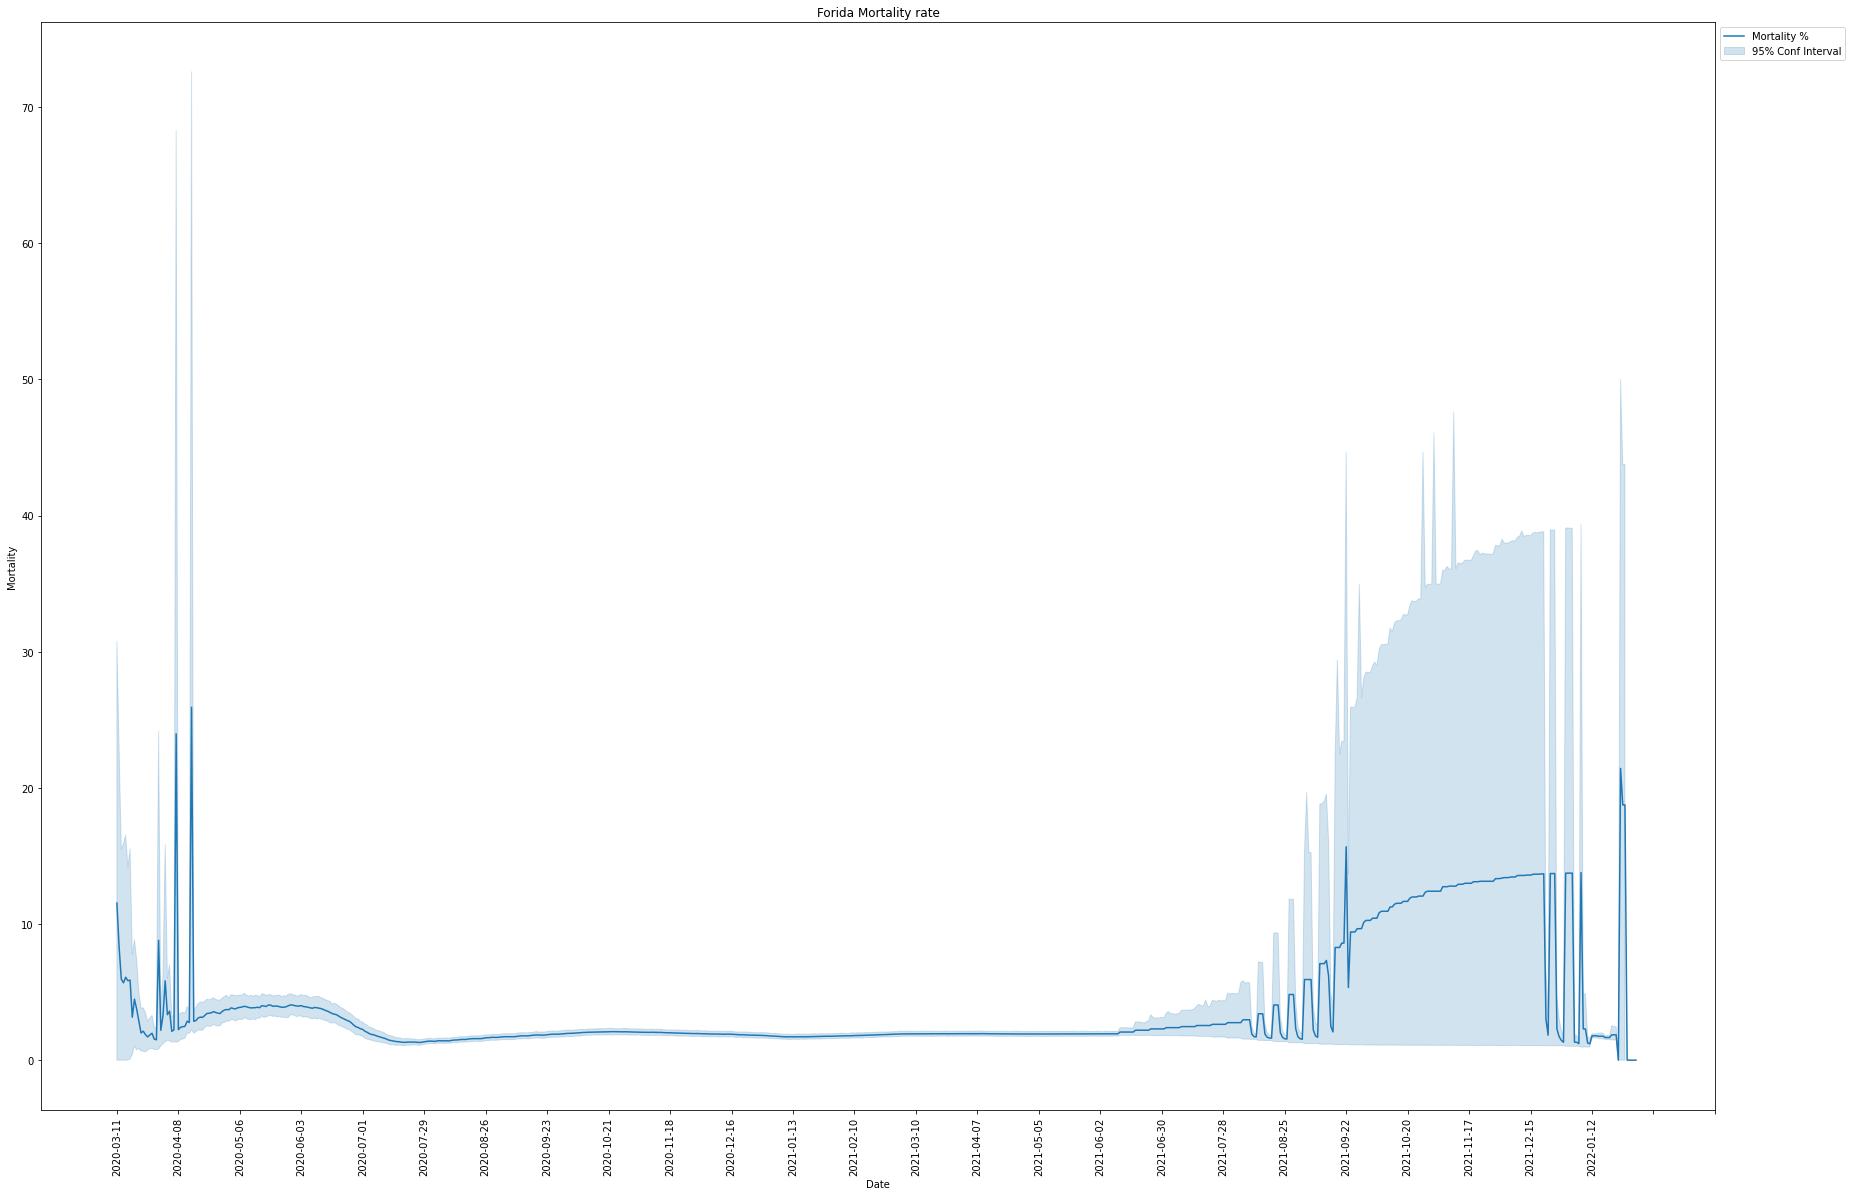

In [61]:
g= plt.figure(figsize=(30,20))
g= plt.title('Forida Mortality rate')
g= sns.lineplot(data=Flor_deaths2,x='Date',y='Mortality')
g.legend(labels=["Mortality %","95% Conf Interval"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(range(0,Flor_deaths.shape[1],28) ,rotation=90)
plt.show()

**Mortality rates in Florida have certainly gotten really high at times... 20%! at one point!**

And looking at max and mean above I now know why the 95% confidence interval is so high!  There is a lot of variability in Florida's Data.

In [62]:
g.figure.savefig('./figures/Florida_Mortality.png')

In [63]:
from datetime import datetime

In [64]:
Cal_deaths2['Date']=Cal_deaths2['Date'].apply(lambda x: 
                                    datetime.strptime(x,'%Y-%m-%d'))

C:\Users\User\AppData\Local\Temp/ipykernel_5140/695216615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cal_deaths2['Date']=Cal_deaths2['Date'].apply(lambda x:


In [65]:
Cal_deaths2['Date']

144440   2020-03-01
144441   2020-03-02
144442   2020-03-03
144443   2020-03-04
144444   2020-03-05
            ...    
188376   2022-01-19
188377   2022-01-20
188378   2022-01-21
188379   2022-01-22
188380   2022-01-23
Name: Date, Length: 39619, dtype: datetime64[ns]

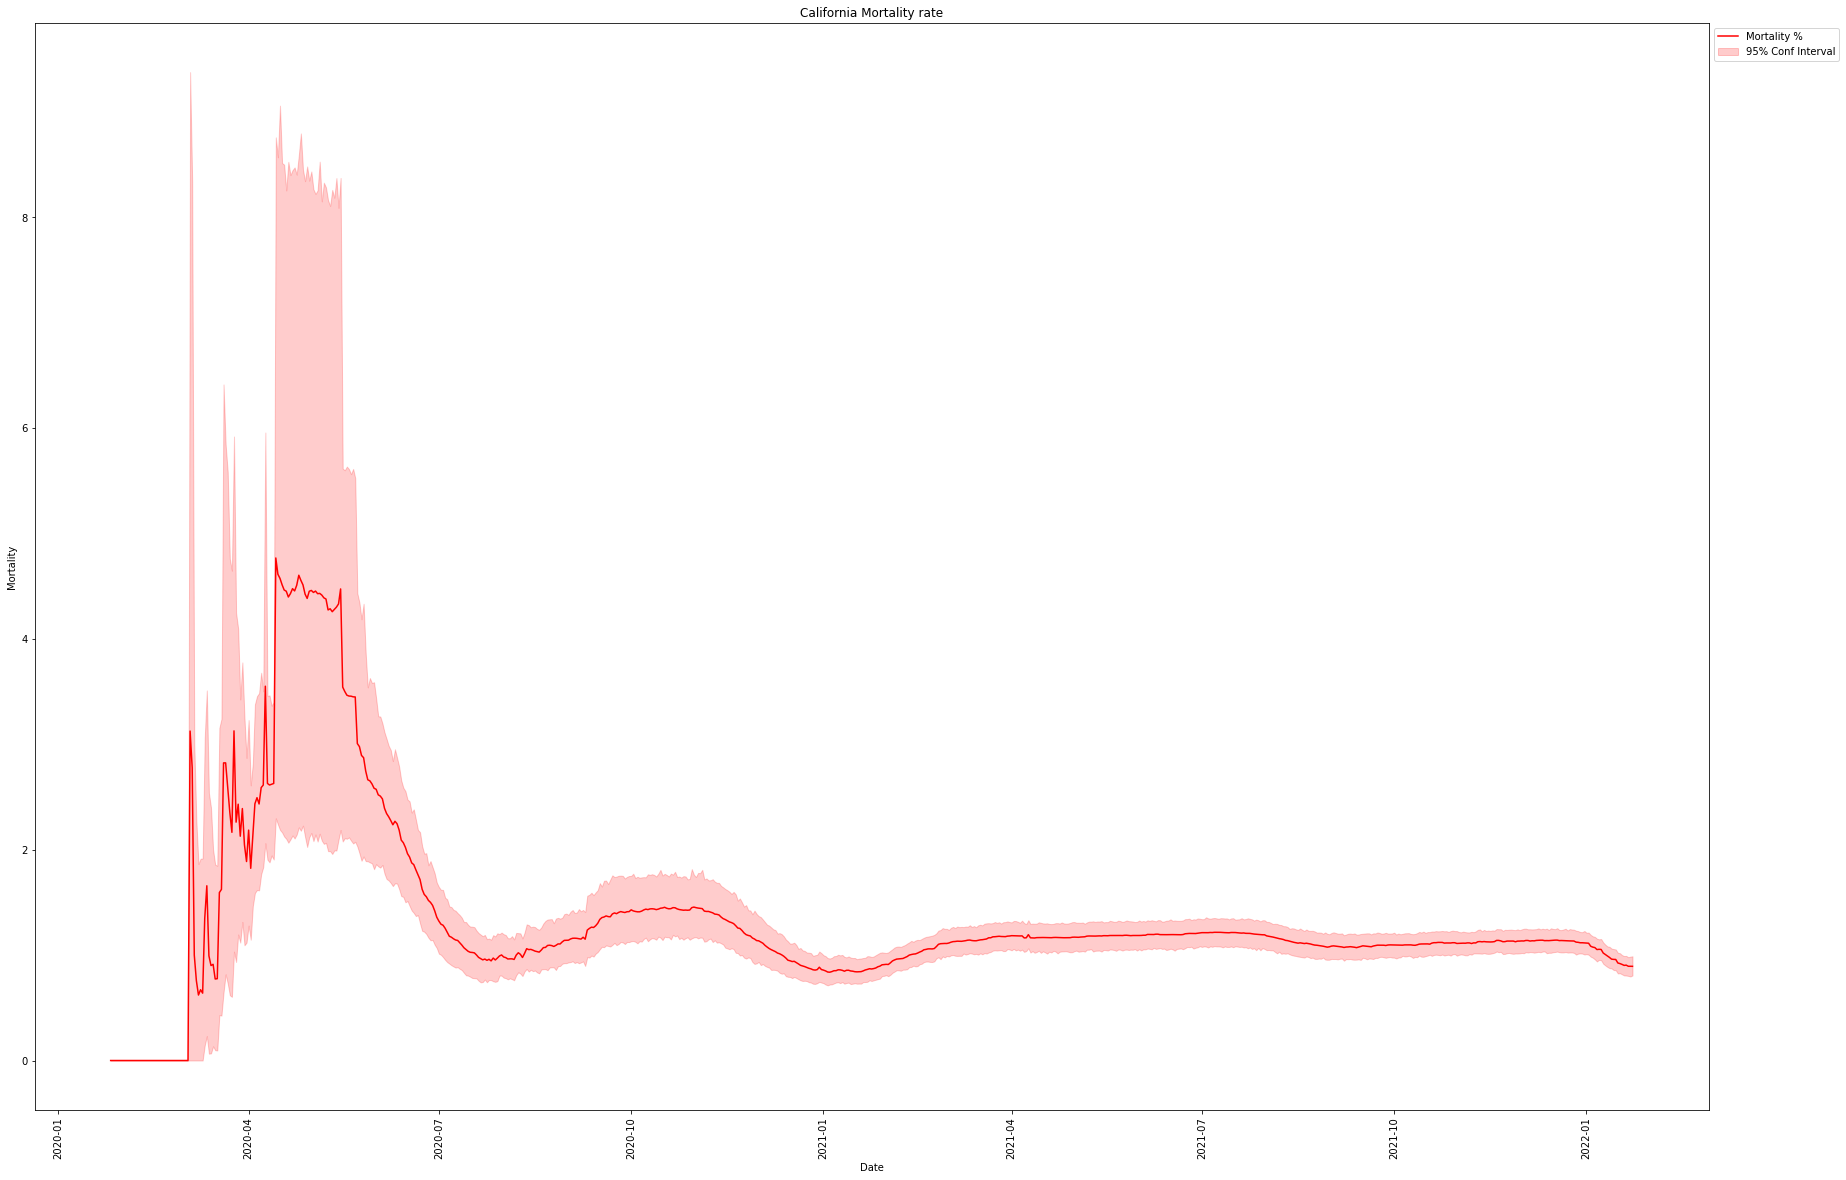

In [66]:
f= plt.figure(figsize=(30,20))
f=plt.title('California Mortality rate')
f=sns.lineplot(data=Cal_deaths2,x='Date',y='Mortality', color='red')
f.legend(labels=["Mortality %","95% Conf Interval"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show()

**California has had almost 9% mortality at times, but is below 2% for most of COVID**

The Omicron surge was really bad for Florida, but not as bad for California?  Maybe I should look at them together just to see if that is right since the scales are so different.

In [67]:
f.figure.savefig('./figures/California_Mortality.png')

In [68]:
# Lets convert the dates in Florida to a datetime object instead of a string
Flor_deaths2['Date']=Flor_deaths2['Date'].apply(lambda x: 
                                    datetime.strptime(x,'%Y-%m-%d'))

C:\Users\User\AppData\Local\Temp/ipykernel_5140/3460167453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flor_deaths2['Date']=Flor_deaths2['Date'].apply(lambda x:


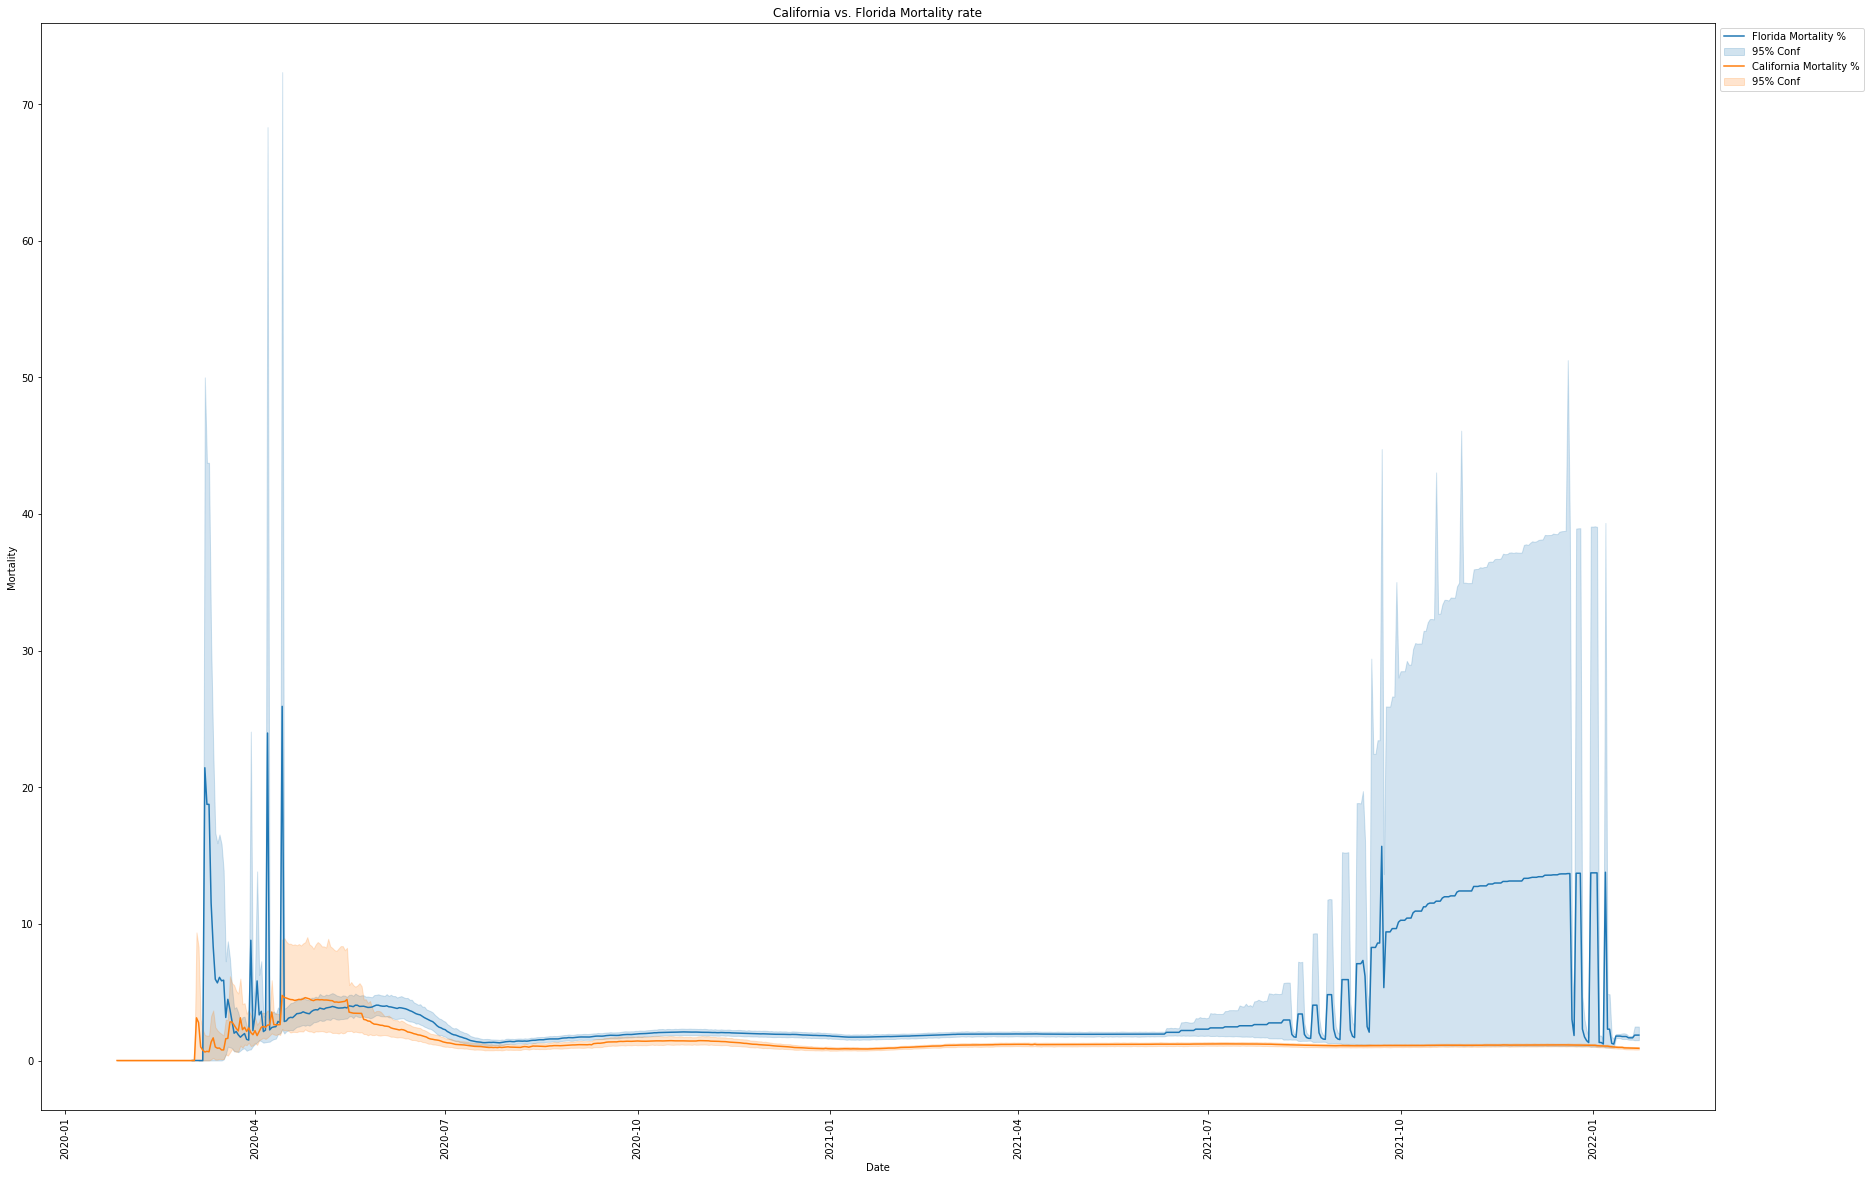

In [69]:
h= plt.figure(figsize=(30,20))
h= plt.title('California vs. Florida Mortality rate')
h= sns.lineplot(data=Flor_deaths2,x='Date',y='Mortality')
h= sns.lineplot(data=Cal_deaths2,x='Date',y='Mortality')
h.legend(labels=["Florida Mortality %","95% Conf", "California Mortality %", "95% Conf"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show()

In [70]:
h.figure.savefig('./figures/Cal_vs_Florida_deaths.png')

Well it looked like mortality in both states had finally leveled out, but in reality Florida is still a much more lethal state to live in.  Almost double the mortality rate currently.  The one clear thing I can see from this data is that California has better control thus less variability in the mortality rate than does Florida.

In [71]:
Cal=mortality('California')

C:\Users\User\AppData\Local\Temp/ipykernel_5140/2078410758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Mortality']=(results['Deaths']/results['Confirmed'])*100
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [72]:
simplified.apply(lambda x: x['Mortality']=(0 if (x['Confirmed']==0 or x['Deaths']/x['Confirmed']==0),0 else x['Deaths']/x['Confirmed'])*100 )

SyntaxError: invalid syntax (Temp/ipykernel_5140/4246286982.py, line 1)

In [73]:
# Next order of business is to do this for every state in the US
# Lets start by conveting the date to a datetime object
simplified['Date']=simplified['Date'].apply(lambda x: 
                                    datetime.strptime(x,'%Y-%m-%d'))

In [74]:
# Next we will create the Mortality column
simplified['Mortality']=(simplified['Deaths']/simplified['Confirmed'])*100
simplified.dropna(inplace=True)
simplified.replace([np.inf, -np.inf], np.nan, inplace=True)
simplified.fillna(0,inplace=True)

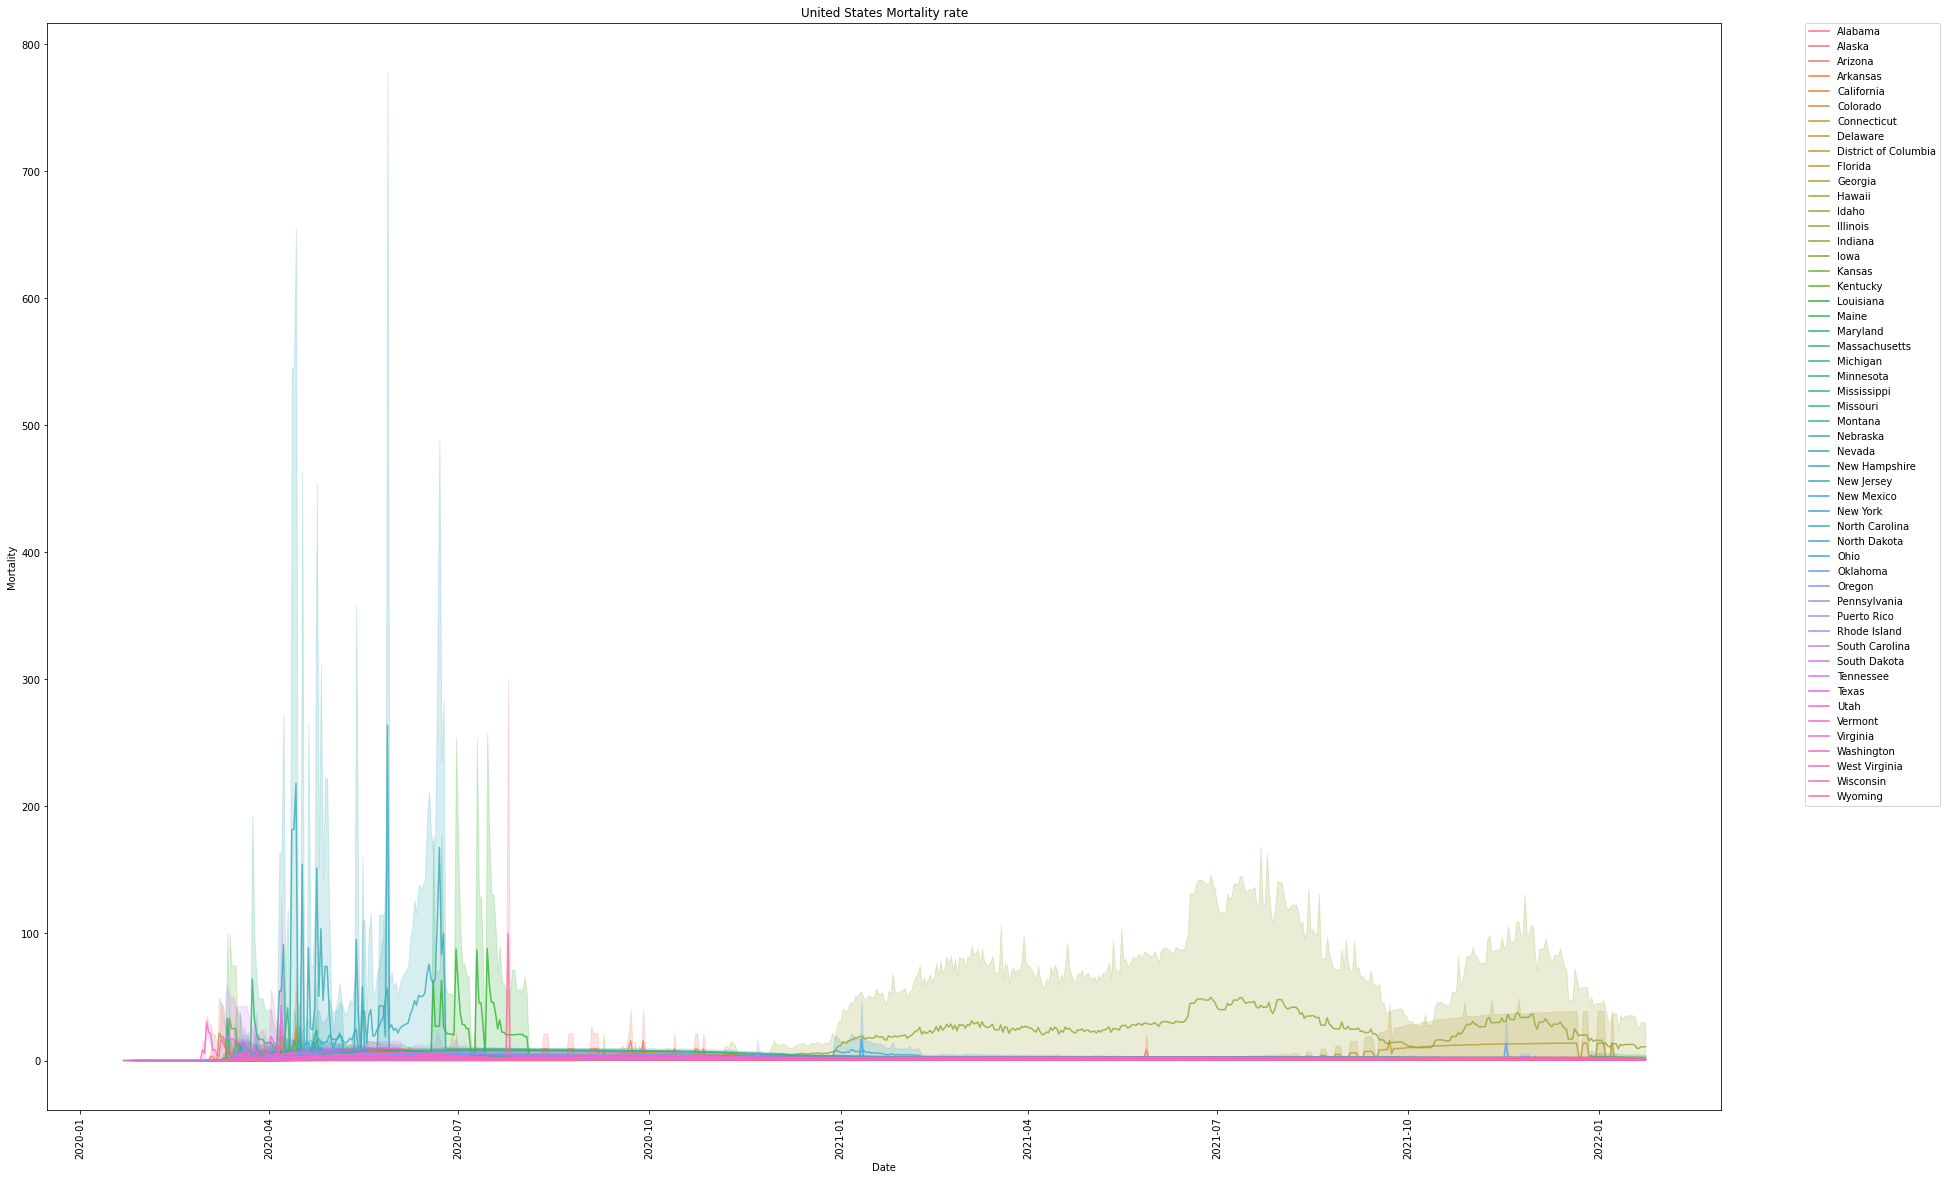

In [84]:
I= plt.figure(figsize=(30,20))
I= plt.title('United States Mortality rate')
I=sns.lineplot(data=simplified, x='Date',y='Mortality', hue='Province/State', alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

In [ ]:
I.figure.savefig('./figures/United_States_Mortality_COVID.png')

In [75]:
pd.set_option('display.max_rows', None)
simplified.groupby(by='Province/State').describe()


Confirmed                                               \
                         count          mean            std   min       25%   
Province/State                                                                
Alabama                45074.0   6284.840063   12238.663041   0.0    772.00   
Alaska                 18160.0   2150.914262    6788.245268   0.0     55.00   
Arizona                10464.0  41364.575975  122657.303449   0.0   1454.75   
Arkansas               50551.0   3522.351131    6922.944603   1.0    388.00   
California             39641.0  46406.382331  150394.045622   0.0    656.00   
Colorado               43126.0   6028.113690   16272.347561   0.0     93.00   
Connecticut             6100.0  25916.156230   36319.218366   1.0   1467.00   
Delaware                2704.0  19080.407914   24579.273136   0.0    460.75   
District of Columbia     679.0  37213.743741   26162.320302  22.0  14063.00   
Florida                45848.0  26816.899930   69068.431309   0.0   1439.75   
Georgia               107898.0   5276.264305   13399.708712   1.0    424.00   
Hawaii                  3455.0   7068.394211   15002.477647   1.0    135.00   
Idaho                  28641.0   3404.346077    8934.827130   1.0    176.00   
Illinois               68843.0   9670.506268   47701.972935   0.0    317.00   
Indiana                62437.0   5863.954867   12816.795586   0.0    432.00   
Iowa                   66090.0   2780.865033    6322.988202   0.0    337.00   
Kansas                 67751.0   2334.335537    7939.277150   0.0    125.00   
Kentucky               79684.0   2960.574708    8183.075562   0.0    202.00   
Louisiana              43735.0   6009.947616   10330.540390   0.0    815.50   
Maine                  11348.0   2820.550758    4827.785575   1.0     60.00   
Maryland               16889.0  13044.329860   22015.968375   0.0   1047.00   
Massachusetts           9646.0  34430.071429   41730.056181   0.0   2935.50   
Michigan               57958.0   7832.068739   22156.228618   0.0    273.00   
Minnesota              58189.0   4960.490780   14287.887261   0.0    270.00   
Mississippi            55050.0   3115.938020    4729.700842   1.0    572.25   
Missouri               76355.0   4070.452623   11286.873425   0.0    250.00   
Montana                34486.0   1641.022328    3819.462336   0.0     80.00   
Nebraska               59151.0   1838.657909    7430.435557   0.0     54.00   
Nevada                 10947.0  14698.187266   54429.155455   0.0     71.00   
New Hampshire           7411.0   6290.381325   10896.775315   0.0    272.00   
New Jersey             14989.0  31603.300687   34596.689767   0.0   5603.00   
New Mexico             22270.0   4518.955680   10268.733752   0.0    143.00   
New York               43206.0  23141.256238   56262.671302   0.0    443.00   
North Carolina         67253.0   7383.667465   15345.209242   0.0    657.00   
North Dakota           34399.0   1590.956946    4072.495863   0.0     75.00   
Ohio                   59408.0   9082.527421   20067.551181   0.0    557.00   
Oklahoma               51389.0   4355.284750   12275.953463   0.0    288.00   
Oregon                 23820.0   4552.508690    9151.069021   0.0    138.75   
Pennsylvania           45069.0  12444.150791   23751.290501   1.0    583.00   
Puerto Rico            50846.0   1313.623904    2646.604625   1.0    120.00   
Rhode Island            4067.0  17283.325055   29847.841667   0.0   1534.00   
South Carolina         31023.0   9582.117816   15951.759713   0.0    950.00   
South Dakota           42315.0   1409.697460    3875.589474   0.0    113.00   
Tennessee              64893.0   6706.271570   14829.821621   0.0    684.00   
Texas                 165638.0   8981.490256   39400.563970   0.0    195.00   
Utah                    9265.0  21515.893794   40382.890068   0.0   1014.00   
Vermont                10112.0   1241.555281    2156.592035   0.0     59.00   
Virginia               88521.0   3689.194282    8493.708187   0.0    29

This data looks like it needed to be cleaned first.  I don't think that we should ever have a Mortality above 100, b/c that would be 100%  So this means that reported deaths are above total reported cases.

Also note that my N is now not the same for all states

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
simplified[['Province/State','Confirmed','Deaths','Mortality']].groupby(by='Province/State').fillna(0).sum()

In [ ]:
(290709033/16433441282)*100

In [ ]:
simplified.groupby(by='Province/State').mean()

### Comparison by state

In [59]:
import seaborn as sns
from datetime import datetime

In [60]:
simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State').fillna(0).sum()

C:\Users\User\AppData\Local\Temp\ipykernel_28368\1503011057.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State').fillna(0).sum()


Confirmed    16441171239
dtype: int64

In [61]:
(290812747/16441171239)*100

1.7688079685598366

Looks like the mortality rate for the entire US is about 1.77%  That's higher than the calculated mortality of both Florida and California.  I'm guessing some other states have a higher rate.

In [62]:
simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State').fillna(0).std()

C:\Users\User\AppData\Local\Temp\ipykernel_28368\1151839256.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State').fillna(0).std()


Confirmed    30954.836773
dtype: float64

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

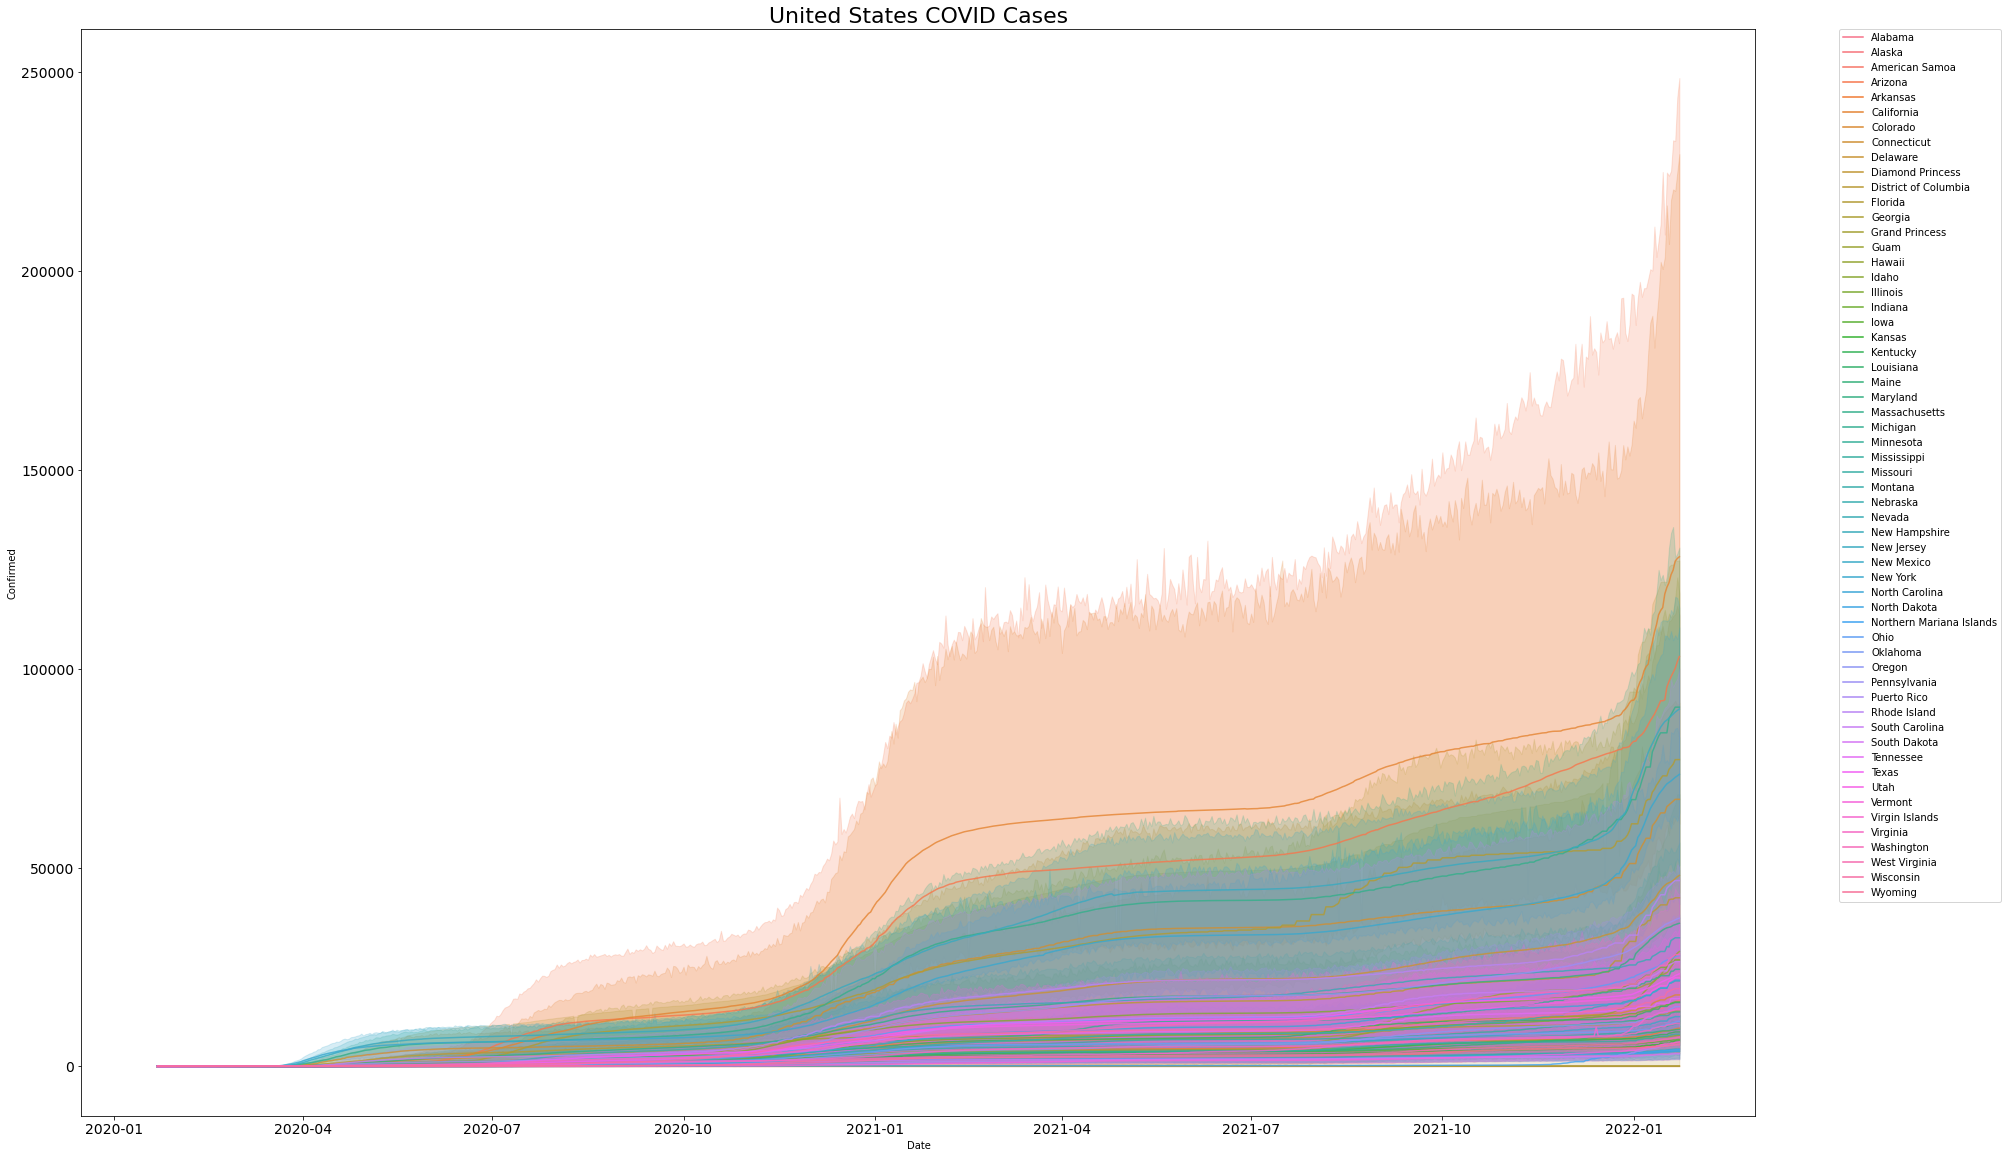

In [64]:
C= plt.figure(figsize=(30,20))
C= plt.title('United States COVID Cases', fontsize=22)
C= sns.lineplot(data=simplified, x='Date',y='Confirmed', hue='Province/State', alpha=0.8)
C= plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
C= plyticksicks(fontsize=14)
C= plt.yticks(fontsize=14)
C= plt.xlabel('Counties', fontsize=18)
C= plt.ylabel('Confirmed Cases',fontsize=18)
plt.show()

In [65]:
C.figure.savefig('./figures/Cases_per_State.png')

AttributeError: 'tuple' object has no attribute 'figure'

In [63]:
# Lets look at the the differences between states
States=simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State')
States.describe()

Confirmed                                            \
                             count          mean            std  min     25%   
Province/State                                                                 
Alabama                    50577.0   5601.021828   11718.253051  0.0   354.0   
Alaska                     24189.0   1614.808508    5954.850198  0.0     0.0   
American Samoa               733.0      1.076398       2.951734  0.0     0.0   
Arizona                    12461.0  34735.488564  113418.788473  0.0    74.0   
Arkansas                   56441.0   3154.769972    6639.669003  0.0   116.0   
California                 43980.0  41827.999136  143451.501401  0.0   201.0   
Colorado                   48378.0   5373.691161   15477.708189  0.0    36.0   
Connecticut                 7330.0  21567.333288   34518.306535  0.0   633.0   
Delaware                    3665.0  14077.332333   22718.600987  0.0     0.0   
Diamond Princess             733.0     45.315143      12.915985  0.0    49.0   
District of Columbia        2199.0  11490.737608   22513.174212  0.0     0.0   
Florida                    50577.0  24309.493011   66221.995667  0.0   768.0   
Georgia                   118013.0   4824.030963   12897.445091  0.0   238.0   
Grand Princess               733.0     94.135061      28.352620  0.0   103.0   
Guam                         733.0   7065.613915    6465.802999  0.0   332.0   
Hawaii                      5131.0   4759.559930   12748.821711  0.0     0.0   
Idaho                      33718.0   2891.745537    8324.227793  0.0    27.0   
Illinois                   76232.0   8733.165377   45421.407866  0.0    98.0   
Indiana                    68902.0   5313.746335   12319.920330  0.0   178.0   
Iowa                       74033.0   2482.506045    6035.837694  0.0   100.0   
Kansas                     78431.0   2016.467557    7422.254785  0.0    20.0   
Kentucky                   89426.0   2638.051965    7779.371264  0.0    58.0   
Louisiana                  48378.0   5433.152652    9980.553490  0.0   433.0   
Maine                      13194.0   2425.921631    4582.976713  0.0    16.0   
Maryland                   19058.0  11559.748505   21135.231111  0.0   341.0   
Massachusetts              12461.0  26652.152235   39437.175685  0.0    59.0   
Michigan                   63771.0   7118.142102   21242.226257  0.0   111.0   
Minnesota                  65237.0   4424.574980   13581.589580  0.0    80.0   
Mississippi                61572.0   2785.882999    4573.838282  0.0   249.0   
Missouri                   86494.0   3593.306010   10685.250112  0.0    54.0   
Montana                    42514.0   1331.144940    3499.427661  0.0     5.0   
Nebraska                   69635.0   1561.836059    6879.766001  0.0    14.0   
Nevada                     13927.0  11553.174122   48630.476981  0.0     4.0   
New Hampshire               8796.0   5299.910869   10261.144113  0.0    43.0   
New Jersey                 16859.0  28097.863100   34097.810123  0.0  1806.5   
New Mexico                 25655.0   3922.710700    9688.774396  0.0    32.0   
New York                   46912.0  21313.120673   54354.177652  0.0   239.0   
North Carolina             74766.0   6641.705963   14722.122802  0.0   263.0   
North Dakota               40315.0   1357.492943    3803.722841  0.0     9.0   
Northern Mariana Islands     733.0    324.788540     758.328432  0.0    38.0   
Ohio                       65970.0   8179.093361   19236.381659  0.0   187.0   
Oklahoma                   57907.0   3865.054795   11646.067434  0.0    66.0   
Oregon                     27854.0   3893.184354    8612.811042  0.0    28.0   
Pennsylvania               50577.0  11088.942246   22753.368834  0.0   167.0   
Puerto Rico                58640.0   1139.026620    2504.473089  0.0    29.0   
Rhode Island                5131.0  13699.334048   27481.331306  0.0   197.0   
South Carolina             35184.0   8448.898391   15295.071701  0.0   351.0   
South Dakota             

In [64]:
States.sum()

Confirmed
Province/State                      
Alabama                    283282881
Alaska                      39060603
American Samoa                   789
Arizona                    432838923
Arkansas                   178058372
California                1839595402
Colorado                   259968431
Connecticut                158088553
Delaware                    51593423
Diamond Princess               33216
District of Columbia        25268132
Florida                   1229501228
Georgia                    569298366
Grand Princess                 69001
Guam                         5179095
Hawaii                      24421302
Idaho                       97503876
Illinois                   665746663
Indiana                    366127750
Iowa                       183787370
Kansas                     158153567
Kentucky                   235910435
Louisiana                  262845059
Maine                       32007610
Maryland                   220305687
Massachusetts              332112469
Michigan                   453931040
Minnesota                  288645998
Mississippi                171532388
Missouri                   310799410
Montana                     56592296
Nebraska                   108758454
Nevada                     160901056
New Hampshire               46618016
New Jersey                 473701874
New Mexico                 100637143
New York                   999841117
North Carolina             496573788
North Dakota                54727328
Northern Mariana Islands      238070
Ohio                       539574789
Oklahoma                   223813728
Oregon                     108440757
Pennsylvania               560845432
Puerto Rico                 66792521
Rhode Island                70291283
South Carolina             297266041
South Dakota                59651348
Tennessee                  435190081
Texas                     1487676083
Utah                       199344756
Vermont                     12554607
Virgin Islands               2209786
Virginia                   326571167
Washington                 229148000
West Virginia               81751586
Wisconsin                  333851532
Wyoming                     31941561

Some of these have zero deaths... Also diamond princess cuise ship?  That is not an actual state.

In [65]:
confirmed_max = States[['Province/State','Confirmed']].max()
deaths_max = States[['Province/State','Deaths']].max()
print('The state with the most cases is \n',confirmed_max.max())
print('The state with the most deaths is \n',deaths_max.max())

The state with the most cases is 
 Province/State    Wyoming
Confirmed         2494097
dtype: object
The state with the most deaths is 
 Province/State    Wyoming
dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_28368\1418020865.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  deaths_max = States[['Province/State','Deaths']].max()


Not so great for Wyoming!

In [66]:
County=simplified[['Province/State', 'Admin2','Confirmed','Deaths']].groupby(by=['Province/State','Admin2'])
County.describe()

Confirmed                                           \
                              count          mean           std  min     25%   
Province/State Admin2                                                          
Alabama        Autauga        733.0   4806.735334   3885.625855  0.0   918.0   
               Baldwin        733.0  16241.877217  14071.080641  0.0  2482.0   
               Barbour        733.0   1720.444748   1313.264802  0.0   540.0   
               Bibb           733.0   1923.607094   1590.357205  0.0   304.0   
               Blount         733.0   4753.418827   3925.230856  0.0   616.0   
...                             ...           ...           ...  ...     ...   
Wyoming        Teton          733.0   2496.713506   2144.480529  0.0   254.0   
               Uinta          733.0   1639.858117   1436.562198  0.0   227.0   
               Unassigned     733.0      0.572988      6.052293  0.0     0.0   
               Washakie       733.0    685.709413    623.705857  0.0    45.0   
               Weston         733.0    467.582538    420.115435  0.0     4.0   

                                                      
                               50%      75%      max  
Province/State Admin2                                 
Alabama        Autauga      5327.0   7402.0  13191.0  
               Baldwin     16981.0  23668.0  50003.0  
               Barbour      1793.0   2431.0   5025.0  
               Bibb         2212.0   2795.0   5779.0  
               Blount       5439.0   7182.0  13362.0  
...                            ...      ...      ...  
Wyoming        Teton        2870.0   3868.0   8814.0  
               Uinta        1887.0   2372.0   4927.0  
               Unassigned      0.0      0.0     73.0  
               Washakie      853.0    943.0   2025.0  
               Weston        609.0    672.0   1349.0  

[3336 rows x 8 columns]

In [67]:
confirmed_county_max = County[['Province/State','Admin2','Confirmed']].max()
deaths_county_max = County[['Province/State','Admin2','Deaths']].max()
print('The state with the most cases is \n',confirmed_county_max.max())
print('The state with the most deaths is \n',deaths_county_max.max())

The state with the most cases is 
 Province/State    Wyoming
Admin2            Ziebach
Confirmed         2494097
dtype: object
The state with the most deaths is 
 Province/State    Wyoming
Admin2            Ziebach
dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_28368\3656188125.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  deaths_county_max = County[['Province/State','Admin2','Deaths']].max()


In [68]:
print('The state with the least cases is \n',confirmed_max.min())
print('The state with the least deaths is \n',deaths_max.min())

The state with the least cases is 
 Province/State    Alabama
Confirmed              18
dtype: object
The state with the least deaths is 
 Province/State    Alabama
dtype: object


In [69]:
print('The state with the least cases is \n',confirmed_county_max.min())
print('The state with the least deaths is \n',deaths_county_max.min())

The state with the least cases is 
 Province/State      Alabama
Admin2            Abbeville
Confirmed                 0
dtype: object
The state with the least deaths is 
 Province/State      Alabama
Admin2            Abbeville
dtype: object


Either Alabama is the safest place in the United States or it is the place with the least amount of reporting.

## Population data webscraping
**This next section is to experiment with getting the population data frome each Country/State/County to compair two things**

**Covid cases by population of each count and covid cases by population density**

In [ ]:
import webbrowser
website ='https://worldpopulationreview.com/'
webbrowser.open(website)

In [50]:
World_Population = pd.read_html('https://worldpopulationreview.com/')
World_Population

[                                 0             1
 0    World Population (as of null)           NaN
 1  Next UN Estimate (July 1, 2022)  7.953953e+09
 2                   Births per Day           NaN
 3                   Deaths per Day           NaN
 4               Net Change per Day           NaN
 5   Population Change Since Jan. 1           NaN,
      Flag           Country  2022 (Live)  2020 Population           Area  \
 0     NaN             China   1447659302       1439323776  9,706,961 km²   
 1     NaN             India   1404123850       1380004385  3,287,590 km²   
 2     NaN     United States    334442532        331002651  9,372,610 km²   
 3     NaN         Indonesia    278606849        273523615  1,904,569 km²   
 4     NaN          Pakistan    228676757        220892340    881,912 km²   
 ..    ...               ...          ...              ...            ...   
 227   NaN        Montserrat         4965             4992        102 km²   
 228   NaN  Falkland Islands     

Very interesting and a good source of info, but I'm getting sidetracked.  I should be able to do this for the rest of the world, and the data that I've downloaded includes world rankings, but for now I'm only interested in the USA.

In [ ]:
World_pop=pd.DataFrame(World_Population[1])
World_pop

In [51]:
# Here is their data for the state of California
CA_Population = pd.read_html('https://worldpopulationreview.com/states/california-population')
CA_Population

[                                         Race  Population Percentage
 0                                       White    23453222     59.70%
 1                                       Asian     5692423     14.49%
 2                             Some Other Race     5481792     13.95%
 3                   Black or African American     2274108      5.79%
 4                           Two or More Races     1922664      4.89%
 5           American Indian and Alaska Native      303998      0.77%
 6  Native Hawaiian and Other Pacific Islander      155290      0.40%,
          Type Owner Renter
 0      Female   41%    60%
 1  Non Family   42%    58%
 2        Male   45%    56%
 3         All   55%    45%
 4     Married   68%    32%,
          Type     Count  Average Size  Owned
 0         All  13044266             3     55
 1     Married   6491236             4     68
 2  Non Family   4085830             1     42
 3      Female   1690625             4     41
 4        Male    776575             4  

Wow! that is full of useful statistics we can use to look at risk factors for COVID, But it's not County Data

In [52]:
# Let's just grab the data from the most recent census estimates
US_Population_State =pd.read_html('https://worldpopulationreview.com/states')
US_Population_State

[    Rank                 State  2022 Population Growth 2022  2021 Population  \
 0      1            California         39664128       0.13%         39613493   
 1      2                 Texas         30097526       1.24%         29730311   
 2      3               Florida         22177997       1.06%         21944577   
 3      4              New York         19223191      -0.40%         19299981   
 4      5          Pennsylvania         12805190       0.01%         12804123   
 5      6              Illinois         12518071      -0.41%         12569321   
 6      7                  Ohio         11727377       0.11%         11714618   
 7      8               Georgia         10936299       0.98%         10830007   
 8      9        North Carolina         10807491       0.99%         10701022   
 9     10              Michigan          9995212       0.03%          9992427   
 10    11            New Jersey          8870685      -0.04%          8874520   
 11    12              Virgi

That should be easy to use to figure out per capita infections and mortality

### Population & Density by state merger with covid cases

In [53]:
US_Population_State=pd.DataFrame(US_Population_State[0])

In [54]:
Population_2022_State=US_Population_State[['State','2022 Population','Density (mi²)']]

In [55]:
Population_2022_State.set_index('State')

2022 Population  Density (mi²)
State                                               
California                   39664128            255
Texas                        30097526            115
Florida                      22177997            414
New York                     19223191            408
Pennsylvania                 12805190            286
Illinois                     12518071            225
Ohio                         11727377            287
Georgia                      10936299            190
North Carolina               10807491            222
Michigan                      9995212            177
New Jersey                    8870685           1206
Virginia                      8638218            219
Washington                    7887965            119
Arizona                       7640796             67
Tennessee                     7001803            170
Massachusetts                 6922107            887
Indiana                       6842385            191
Missouri                      6184843             90
Maryland                      6075314            626
Colorado                      5961083             58
Wisconsin                     5867518            108
Minnesota                     5739781             72
South Carolina                5342388            178
Alabama                       4949697             98
Louisiana                     4616106            107
Kentucky                      4487233            114
Oregon                        4325290             45
Oklahoma                      4007179             58
Connecticut                   3546588            732
Utah                          3363182             41
Nevada                        3238601             30
Puerto Rico                   3194714            924
Iowa                          3174426             57
Arkansas                      3042017             58
Mississippi                   2961536             63
Kansas                        2919179             36
New Mexico                    2109093             17
Nebraska                      1960790             26
Idaho                         1896652             23
West Virginia                 1755715             73
Hawaii                        1401709            218
New Hampshire                 1378449            154
Maine                         1359677             44
Montana                       1093117              8
Rhode Island                  1062583           1028
Delaware                       998619            512
South Dakota                   902542             12
North Dakota                   774008             11
Alaska                         720763              1
District of Columbia           718355          11776
Vermont                        622882             68
Wyoming                        582233              6

In [56]:
confirmed_States=pd.DataFrame(States[['Confirmed','Deaths']].sum())
confirmed_States

Confirmed    Deaths
Province/State                                
Alabama                    283282881   5239645
Alaska                      39060603    206366
American Samoa                   789         0
Arizona                    432838923   8211786
Arkansas                   178058372   2868740
California                1839595402  27149306
Colorado                   259968431   3343591
Connecticut                158088553   4314072
Delaware                    51593423    849197
Diamond Princess               33216         0
District of Columbia        25268132    578316
Florida                   1229501228  19411502
Georgia                    569298366  10187037
Grand Princess                 69001      1979
Guam                         5179095     77538
Hawaii                      24421302    276712
Idaho                       97503876   1108240
Illinois                   665746663  12172981
Indiana                    366127750   6613892
Iowa                       183787370   2758733
Kansas                     158153567   2295153
Kentucky                   235910435   3214299
Louisiana                  262845059   5748807
Maine                       32007610    401659
Maryland                   220305687   4618149
Massachusetts              332112469   9129244
Michigan                   453931040  10012569
Minnesota                  288645998   3605500
Mississippi                171532388   3720209
Missouri                   310799410   4677755
Montana                     56592296    778395
Nebraska                   108758454   1089705
Nevada                     160901056   2717918
New Hampshire               46618016    649821
New Jersey                 473701874  14035395
New Mexico                 100637143   1937518
New York                   999841117  28930249
North Carolina             496573788   6259101
North Dakota                54727328    720668
Northern Mariana Islands      238070      1929
Ohio                       539574789   9755492
Oklahoma                   223813728   3244662
Oregon                     108440757   1408742
Pennsylvania               560845432  12882390
Puerto Rico                 66792521   1154504
Rhode Island                70291283   1331227
South Carolina             297266041   4762881
South Dakota                59651348    889214
Tennessee                  435190081   5862291
Texas                     1487676083  24773812
Utah                       199344756   1112698
Vermont                     12554607    128605
Virgin Islands               2209786     22268
Virginia                   326571167   5108260
Washington                 229148000   3060435
West Virginia               81751586   1364581
Wisconsin                  333851532   3663752
Wyoming                     31941561    373257

In [57]:
Total_States=pd.merge(Population_2022_State, confirmed_States, right_index=True, left_on='State')
Total_States

State  2022 Population  Density (mi²)   Confirmed    Deaths
0             California         39664128            255  1839595402  27149306
1                  Texas         30097526            115  1487676083  24773812
2                Florida         22177997            414  1229501228  19411502
3               New York         19223191            408   999841117  28930249
4           Pennsylvania         12805190            286   560845432  12882390
5               Illinois         12518071            225   665746663  12172981
6                   Ohio         11727377            287   539574789   9755492
7                Georgia         10936299            190   569298366  10187037
8         North Carolina         10807491            222   496573788   6259101
9               Michigan          9995212            177   453931040  10012569
10            New Jersey          8870685           1206   473701874  14035395
11              Virginia          8638218            219   326571167   5108260
12            Washington          7887965            119   229148000   3060435
13               Arizona          7640796             67   432838923   8211786
14             Tennessee          7001803            170   435190081   5862291
15         Massachusetts          6922107            887   332112469   9129244
16               Indiana          6842385            191   366127750   6613892
17              Missouri          6184843             90   310799410   4677755
18              Maryland          6075314            626   220305687   4618149
19              Colorado          5961083             58   259968431   3343591
20             Wisconsin          5867518            108   333851532   3663752
21             Minnesota          5739781             72   288645998   3605500
22        South Carolina          5342388            178   297266041   4762881
23               Alabama          4949697             98   283282881   5239645
24             Louisiana          4616106            107   262845059   5748807
25              Kentucky          4487233            114   235910435   3214299
26                Oregon          4325290             45   108440757   1408742
27              Oklahoma          4007179             58   223813728   3244662
28           Connecticut          3546588            732   158088553   4314072
29                  Utah          3363182             41   199344756   1112698
30                Nevada          3238601             30   160901056   2717918
31           Puerto Rico          3194714            924    66792521   1154504
32                  Iowa          3174426             57   183787370   2758733
33              Arkansas          3042017             58   178058372   2868740
34           Mississippi          2961536             63   171532388   3720209
35                Kansas          2919179             36   158153567   2295153
36            New Mexico          2109093             17   100637143   1937518
37              Nebraska          1960790             26   108758454   1089705
38                 Idaho          1896652             23    97503876   1108240
39         West Virginia          1755715             73    81751586   1364581
40                Hawaii          1401709            218    24421302    276712
41         New Hampshire          1378449            154    46618016    649821
42                 Maine          1359677             44    32007610    401659
43               Montana          1093117              8    56592296    778395
44          Rhode Island          1062583           1028    70291283   1331227
45              Delaware           998619            512    51593423    849197
46          South Dakota           902542             12    59651348    889214
47          North Dakota           774008             11    54727328    720668
48                Alaska           720763              1    39060603    206366
49  District of Columbia           718355          11776    25268132 

## Correlations betwen population and cases with deaths

### Data by State

In [58]:
Total_States['Cases per 1K Pop']=(Total_States['Confirmed']/(Total_States['2022 Population']))/1000
Total_States['Deaths per 1K Pop']=(Total_States['Deaths']/(Total_States['2022 Population']))/1000
Total_States['Cases by density']=(Total_States['Confirmed']/(Total_States['Density (mi²)']))
Total_States['Deaths by density']=(Total_States['Deaths']/(Total_States['Density (mi²)']))
Total_States

State  2022 Population  Density (mi²)   Confirmed  \
0             California         39664128            255  1839595402   
1                  Texas         30097526            115  1487676083   
2                Florida         22177997            414  1229501228   
3               New York         19223191            408   999841117   
4           Pennsylvania         12805190            286   560845432   
5               Illinois         12518071            225   665746663   
6                   Ohio         11727377            287   539574789   
7                Georgia         10936299            190   569298366   
8         North Carolina         10807491            222   496573788   
9               Michigan          9995212            177   453931040   
10            New Jersey          8870685           1206   473701874   
11              Virginia          8638218            219   326571167   
12            Washington          7887965            119   229148000   
13               Arizona          7640796             67   432838923   
14             Tennessee          7001803            170   435190081   
15         Massachusetts          6922107            887   332112469   
16               Indiana          6842385            191   366127750   
17              Missouri          6184843             90   310799410   
18              Maryland          6075314            626   220305687   
19              Colorado          5961083             58   259968431   
20             Wisconsin          5867518            108   333851532   
21             Minnesota          5739781             72   288645998   
22        South Carolina          5342388            178   297266041   
23               Alabama          4949697             98   283282881   
24             Louisiana          4616106            107   262845059   
25              Kentucky          4487233            114   235910435   
26                Oregon          4325290             45   108440757   
27              Oklahoma          4007179             58   223813728   
28           Connecticut          3546588            732   158088553   
29                  Utah          3363182             41   199344756   
30                Nevada          3238601             30   160901056   
31           Puerto Rico          3194714            924    66792521   
32                  Iowa          3174426             57   183787370   
33              Arkansas          3042017             58   178058372   
34           Mississippi          2961536             63   171532388   
35                Kansas          2919179             36   158153567   
36            New Mexico          2109093             17   100637143   
37              Nebraska          1960790             26   108758454   
38                 Idaho          1896652             23    97503876   
39         West Virginia          1755715             73    81751586   
40                Hawaii          1401709            218    24421302   
41         New Hampshire          1378449            154    46618016   
42                 Maine          1359677             44    32007610   
43               Montana          1093117              8    56592296   
44          Rhode Island          1062583           1028    70291283   
45              Delaware           998619            512    51593423   
46          South Dakota           902542             12    59651348   
47          North Dakota           774008             11    54727328   
48                Alaska           720763              1    39060603   
49  District of Columbia           718355          11776    25268132   
50               Vermont           622882             68    12554607   
51               Wyoming           582233              6    31941561   

      Deaths  Cases per 1K Pop  Deaths per 1K Pop  Cases by density  \
0   27149306          0.046379           0.000684      7.214100e+06   
1   24773812          0.049429           0.000823      1.293

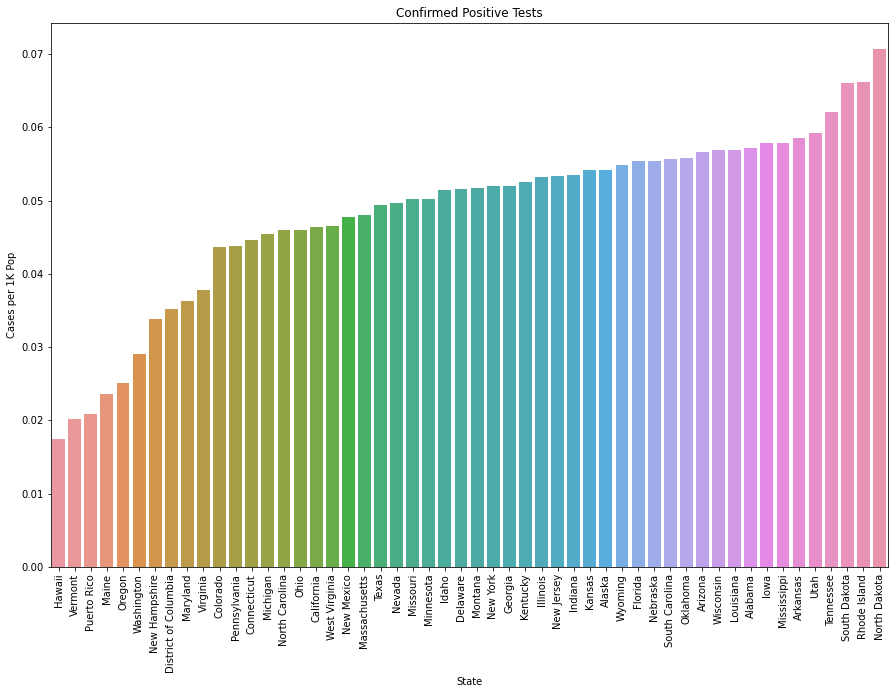

In [59]:
fig1=plt.figure(figsize=(15,10))
fig1=sns.barplot(x='State',y='Cases per 1K Pop', data=Total_States.sort_values(by='Cases per 1K Pop'))
fig1=plt.title('Confirmed Positive Tests')
fig1=plt.xticks(rotation=90)
plt.savefig('./figures/Cases_per_Pop.png')

The confirmed cases when summed is capturing those individuals who were tested multiple times during the course of a single infection, travelers who visited the state and people who contracted COVID multiple times.  It doesn't mean everyone in North Dekota caught COVID 70 times, just that there were that many official tests which came back positive.

In [60]:
Total_States.sort_values(by='Cases per 1K Pop', axis=0, ascending=False).head()

State  2022 Population  Density (mi²)  Confirmed   Deaths  \
47  North Dakota           774008             11   54727328   720668   
44  Rhode Island          1062583           1028   70291283  1331227   
46  South Dakota           902542             12   59651348   889214   
14     Tennessee          7001803            170  435190081  5862291   
29          Utah          3363182             41  199344756  1112698   

    Cases per 1K Pop  Deaths per 1K Pop  Cases by density  Deaths by density  
47          0.070706           0.000931      4.975212e+06       65515.272727  
44          0.066151           0.001253      6.837673e+04        1294.967899  
46          0.066093           0.000985      4.970946e+06       74101.166667  
14          0.062154           0.000837      2.559942e+06       34484.064706  
29          0.059273           0.000331      4.862067e+06       27138.975610

In [61]:
Total_States.sort_values(by='Cases per 1K Pop', axis=0).head()

State  2022 Population  Density (mi²)  Confirmed   Deaths  \
40       Hawaii          1401709            218   24421302   276712   
50      Vermont           622882             68   12554607   128605   
31  Puerto Rico          3194714            924   66792521  1154504   
42        Maine          1359677             44   32007610   401659   
26       Oregon          4325290             45  108440757  1408742   

    Cases per 1K Pop  Deaths per 1K Pop  Cases by density  Deaths by density  
40          0.017423           0.000197      1.120243e+05        1269.321101  
50          0.020156           0.000206      1.846266e+05        1891.250000  
31          0.020907           0.000361      7.228628e+04        1249.463203  
42          0.023541           0.000295      7.274457e+05        9128.613636  
26          0.025071           0.000326      2.409795e+06       31305.377778

looks like North Dakota and Rhode Island are having the roughest times.  Hawaii and Vermont are doing the best as far as case numbers go

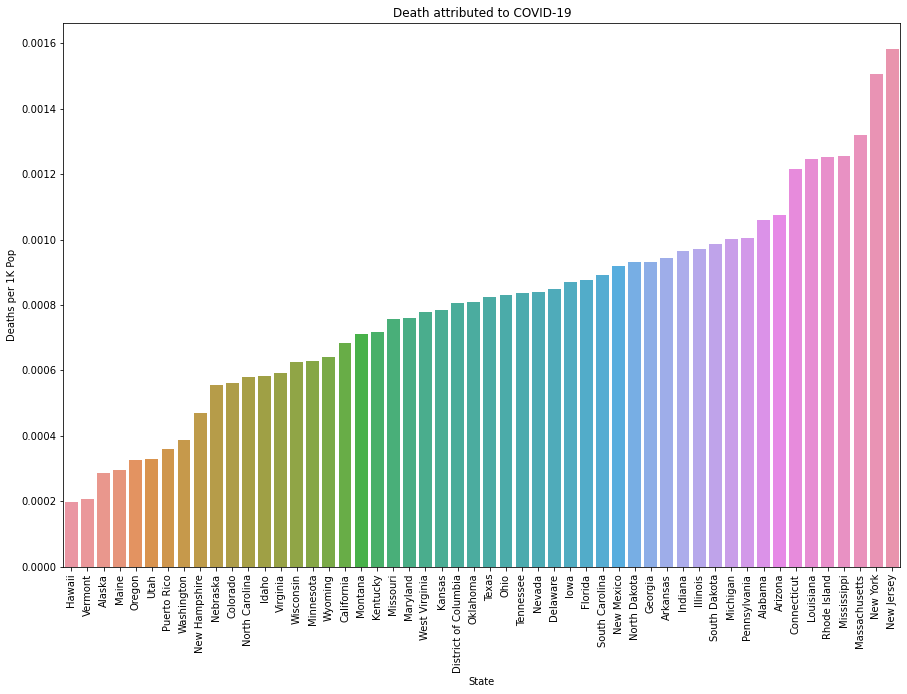

In [101]:
fig2=plt.figure(figsize=(15,10))
fig2=sns.barplot(x='State',y='Deaths per 1K Pop', data=Total_States.sort_values(by='Deaths per 1K Pop'))
fig2=plt.title('Death attributed to COVID-19')
gif2=plt.xticks(rotation=90)
plt.savefig('./figures/Deaths_per_Pop.png')

New Jersey and New York have had the roughest times of this.  Again Hawaii and Vermont are looking pretty good.

I'd love to try this with population density and make a graph that looks at things over time.

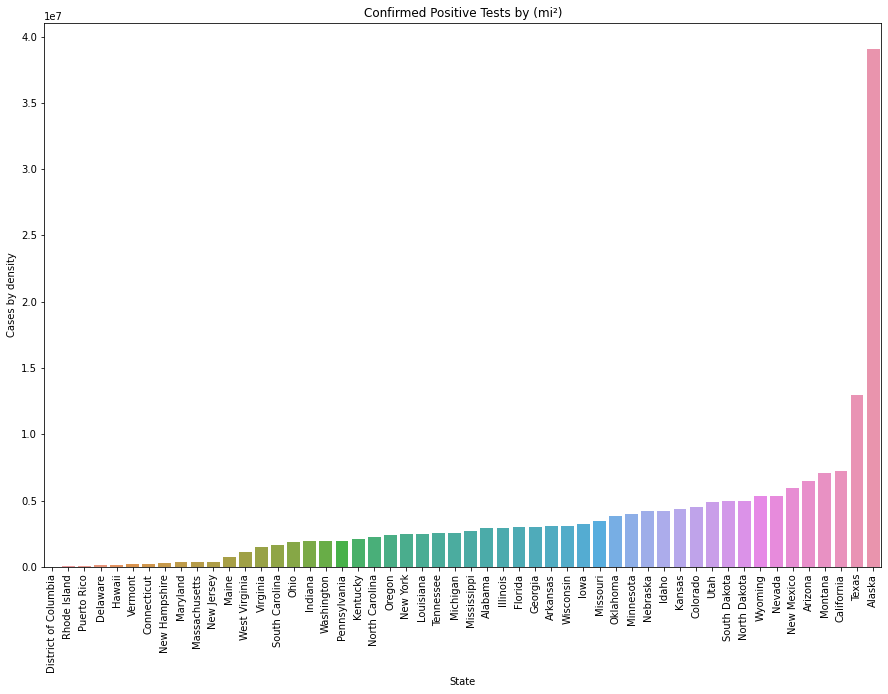

In [104]:
fig1=plt.figure(figsize=(15,10))
fig1=sns.barplot(x='State',y='Cases by density', data=Total_States.sort_values(by='Cases by density'))
fig1=plt.title('Confirmed Positive Tests by (mi²)')
fig1=plt.xticks(rotation=90)
plt.savefig('./figures/Cases_by_density.png')

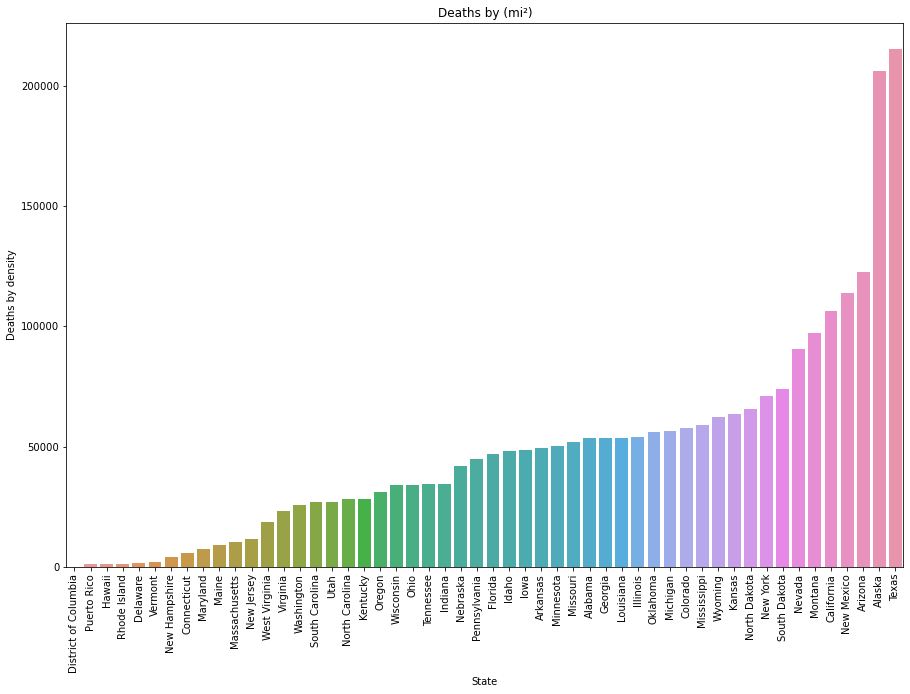

In [105]:
fig1=plt.figure(figsize=(15,10))
fig1=sns.barplot(x='State',y='Deaths by density', data=Total_States.sort_values(by='Deaths by density'))
fig1=plt.title('Deaths by (mi²)')
fig1=plt.xticks(rotation=90)
plt.savefig('./figures/Deaths_by_density.png')

### Data by county

In [62]:
# I'm starting to like the panda's html parser.  It's making getting some data off a website very easy.
CA_Population_County = pd.read_html('https://worldpopulationreview.com/us-counties/states/ca')
CA_Population_County

[                      Name  2022 Population Growth Since 2010  Density (mi²)
 0       Los Angeles County          9934710             1.13%        2448.12
 1         San Diego County          3351737             8.01%         796.77
 2            Orange County          3174849             5.30%        4014.74
 3         Riverside County          2544817            15.59%         353.13
 4    San Bernardino County          2220081             8.78%         110.69
 5       Santa Clara County          1914397             7.19%        1483.78
 6           Alameda County          1685048            11.37%        2279.89
 7        Sacramento County          1591994            12.00%        1649.84
 8      Contra Costa County          1162547            10.45%        1608.52
 9            Fresno County          1020554             9.50%         171.27
 10             Kern County           919534             9.34%         113.08
 11    San Francisco County           884108             9.76%  

In [63]:
Cal.rename(index=lambda s: s + ' County', inplace=True)

In [64]:
Cal

Date                    2020-01-22  2020-01-23  2020-01-24  2020-01-25  \
Alameda County                   0           0           0           0   
Alpine County                    0           0           0           0   
Amador County                    0           0           0           0   
Butte County                     0           0           0           0   
Calaveras County                 0           0           0           0   
Colusa County                    0           0           0           0   
Contra Costa County              0           0           0           0   
Del Norte County                 0           0           0           0   
El Dorado County                 0           0           0           0   
Fresno County                    0           0           0           0   
Glenn County                     0           0           0           0   
Humboldt County                  0           0           0           0   
Imperial County                  0           0           0           0   
Inyo County                      0           0           0           0   
Kern County                      0           0           0           0   
Kings County                     0           0           0           0   
Lake County                      0           0           0           0   
Lassen County                    0           0           0           0   
Los Angeles County               0           0           0           0   
Madera County                    0           0           0           0   
Marin County                     0           0           0           0   
Mariposa County                  0           0           0           0   
Mendocino County                 0           0           0           0   
Merced County                    0           0           0           0   
Modoc County                     0           0           0           0   
Mono County                      0           0           0           0   
Monterey County                  0           0           0           0   
Napa County                      0           0           0           0   
Nevada County                    0           0           0           0   
Orange County                    0           0           0           0   
Out of CA County                 0           0           0           0   
Placer County                    0           0           0           0   
Plumas County                    0           0           0           0   
Riverside County                 0           0           0           0   
Sacramento County                0           0           0           0   
San Benito County                0           0           0           0   
San Bernardino County            0           0           0           0   
San Diego County                 0           0           0           0   
San Francisco County             0           0           0           0   
San Joaquin County               0           0           0           0   
San Luis Obispo County           0           0           0           0   
San Mateo County                 0           0           0           0   
Santa Barbara County             0           0           0           0   
Santa Clara County               0           0           0           0   
Santa Cruz County                0           0           0           0   
Shasta County                    0           0           0           0   
Sierra County                    0           0           0           0   
Siskiyou County                  0           0           0           0   
Solano County                    0           0           0           0   
Sonoma County                    0           0           0           0   
Stanislaus County                0           0           0           0   
Sutter County                    0           0           0           0   
Tehama County                    0           0           0           0   
Trin

In [65]:
# Making a data frame to hopefully merge with the COVID numbers data frame.  I can compare numbers vs population or by demographic or what ever.  
# Population density may be really imporant here.

In [66]:
CA_Population_County= pd.DataFrame(CA_Population_County[0]).set_index('Name')
CA_Population_County

2022 Population Growth Since 2010  Density (mi²)
Name                                                                    
Los Angeles County              9934710             1.13%        2448.12
San Diego County                3351737             8.01%         796.77
Orange County                   3174849             5.30%        4014.74
Riverside County                2544817            15.59%         353.13
San Bernardino County           2220081             8.78%         110.69
Santa Clara County              1914397             7.19%        1483.78
Alameda County                  1685048            11.37%        2279.89
Sacramento County               1591994            12.00%        1649.84
Contra Costa County             1162547            10.45%        1608.52
Fresno County                   1020554             9.50%         171.27
Kern County                      919534             9.34%         113.08
San Francisco County             884108             9.76%       18853.21
Ventura County                   839598             1.76%         455.56
San Joaquin County               791119            15.13%         568.59
San Mateo County                 760249             5.63%        1695.19
Stanislaus County                558262             8.37%         373.53
Sonoma County                    481415            -0.69%         305.50
Tulare County                    471013             6.33%          97.63
Solano County                    453397             9.52%         551.73
Santa Barbara County             448656             5.76%         164.04
Monterey County                  434394             4.33%         132.41
Placer County                    416326            18.94%         295.88
Merced County                    288267            12.29%         148.98
San Luis Obispo County           282382             4.66%          85.55
Santa Cruz County                271329             3.11%         609.50
Marin County                     256318             1.35%         492.45
Yolo County                      221646            10.23%         218.42
El Dorado County                 199134             9.94%         116.60
Butte County                     185727           -15.56%         113.49
Shasta County                    181193             2.21%          47.99
Imperial County                  180291             3.19%          43.17
Madera County                    158662             5.08%          74.24
Kings County                     157614             3.44%         113.44
Napa County                      134609            -1.57%         179.87
Humboldt County                  133500            -1.12%          37.42
Nevada County                    100496             1.73%         104.93
Sutter County                     98840             4.32%         164.07
Mendocino County                  84793            -3.42%          24.18
Yuba County                       82001            13.34%         129.74
Tehama County                     68282             7.43%          23.15
San Benito County                 66831            20.38%          48.12
Lake County                       64593            -0.22%          51.41
Tuolumne County                   54751            -0.80%          24.65
Calaveras County                  46526             2.33%          45.61
Siskiyou County                   43506            -3.19%           6.93
Amador County                     40793             7.67%          68.61
Lassen County                     30438           -12.61%           6.70
Glenn County                      29671             5.49%          22.58
Del Norte County                  28028            -1.88%          27.85
Colusa County                     21934             2.32%          19.06
Plumas County                     19005            -4.56%           7.44
Inyo County                       18318            -1.04%           1.80
Mariposa County                   16597            -9.19%          11.46
Mono Coun

In [67]:
CA_Sum=pd.DataFrame(Cal.sum(axis=1), columns=['Total Cases'])
CA_Sum

Total Cases
Alameda County             44597298
Alpine County                 39462
Amador County               1790025
Butte County                7457633
Calaveras County            1182736
Colusa County               1101249
Contra Costa County        35420267
Del Norte County             894503
El Dorado County            5506841
Fresno County              53944857
Glenn County                1468002
Humboldt County             2549696
Imperial County            15417931
Inyo County                  714160
Kern County                53876352
Kings County               12174284
Lake County                 1959887
Lassen County               2716268
Los Angeles County        585388099
Madera County               8643491
Marin County                7422421
Mariposa County              338495
Mendocino County            2330292
Merced County              15514625
Modoc County                 235911
Mono County                  624107
Monterey County            20376801
Napa County                 4705827
Nevada County               2742304
Orange County             127427475
Out of CA County                  0
Placer County              12647677
Plumas County                440548
Riverside County          142324433
Sacramento County          54566421
San Benito County           2860071
San Bernardino County     139410203
San Diego County          141097475
San Francisco County       20275951
San Joaquin County         37329914
San Luis Obispo County     10470912
San Mateo County           20756945
Santa Barbara County       17085460
Santa Clara County         55636947
Santa Cruz County           7776812
Shasta County               7247708
Sierra County                 46907
Siskiyou County             1205080
Solano County              16187790
Sonoma County              15191276
Stanislaus County          30601093
Sutter County               4758099
Tehama County               2906591
Trinity County               247004
Tulare County              29214492
Tuolumne County             2163305
Unassigned County            145088
Ventura County             38062290
Yolo County                 7150636
Yuba County                 3226975

In [68]:
Cal_deaths.rename(index=lambda s: s + ' County', inplace=True)
CA_Sum['Total Deaths']=pd.DataFrame(Cal_deaths.sum(axis=1), columns=['Total Deaths'])
CA_Sum

NameError: name 'Cal_deaths' is not defined

In [ ]:
CA_cases_by_county = CA_Sum.join(CA_Population_County, how='outer')
CA_cases_by_county

In [ ]:
CA_cases_by_county['Cases per 1K pop']= (CA_cases_by_county['Total Cases']/CA_cases_by_county['2022 Population'])/1000
CA_cases_by_county['Deaths per 1K pop']= (CA_cases_by_county['Total Deaths']/CA_cases_by_county['2022 Population'])/1000
CA_cases_by_county['Cases by Density (mi²)']= (CA_cases_by_county['Total Cases']/CA_cases_by_county['Density (mi²)'])
CA_cases_by_county['Deaths by Density (mi²)']= (CA_cases_by_county['Total Deaths']/CA_cases_by_county['Density (mi²)'])

In [ ]:
CA_cases_by_county

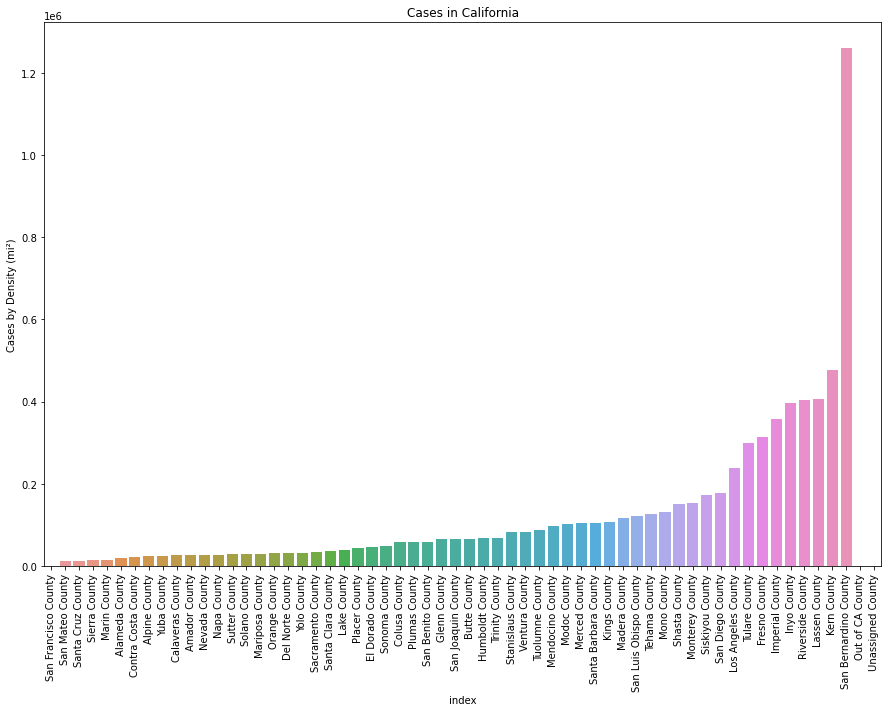

In [117]:
plt.figure(figsize=(15,10))
sns.barplot(x='index',y='Cases by Density (mi²)', data=CA_cases_by_county.reset_index().sort_values(by='Cases by Density (mi²)'))
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.savefig('./figures/Cases_Cal_per_County_by_density.png')

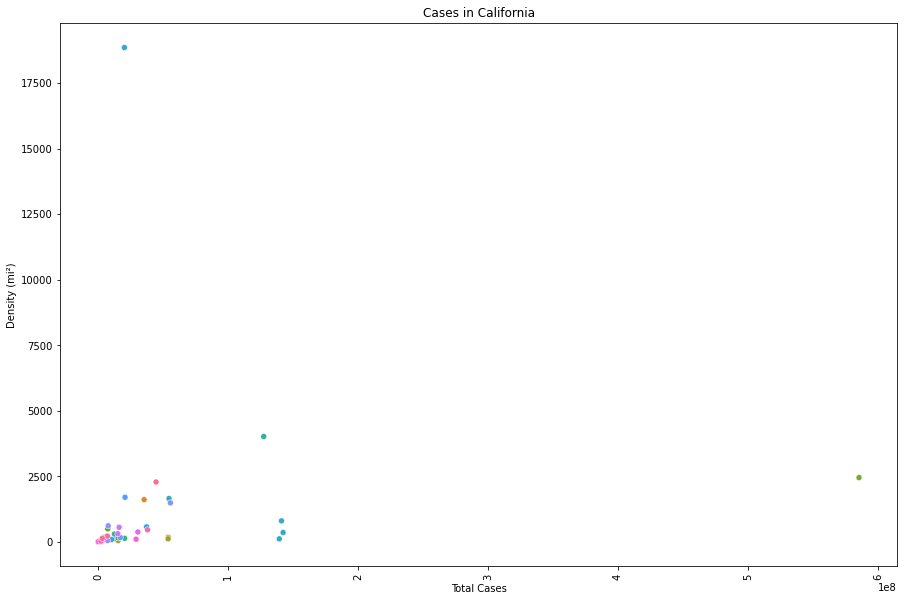

In [123]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Total Cases',y='Density (mi²)', data=CA_cases_by_county.reset_index(), hue='index', legend=False)
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.show()

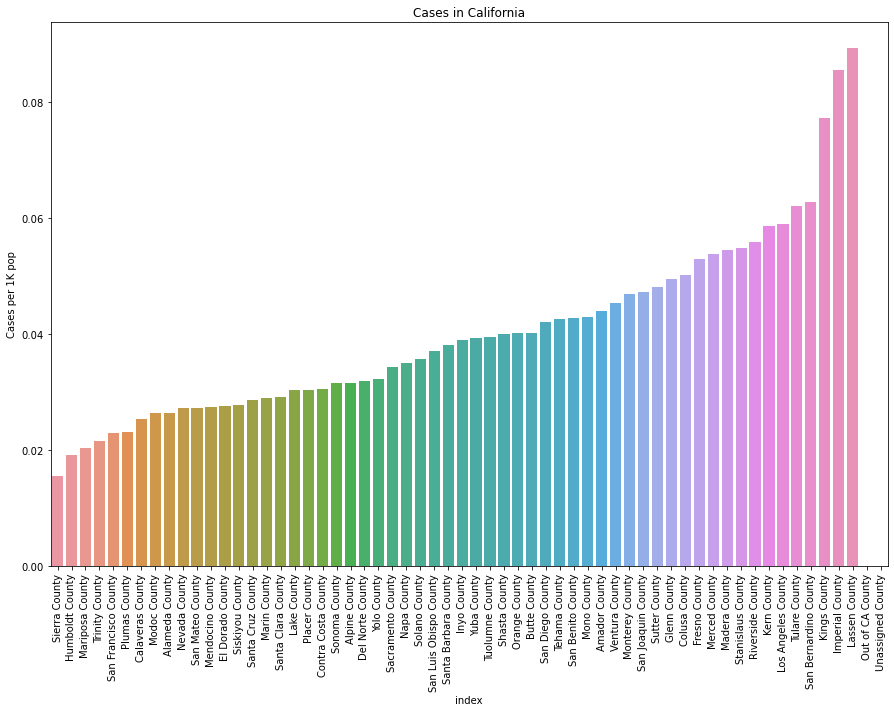

In [119]:
plt.figure(figsize=(15,10))
sns.barplot(x='index',y='Cases per 1K pop', data=CA_cases_by_county.reset_index().sort_values(by='Cases per 1K pop'))
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.savefig('./figures/Cases_Cal_per_County_per_1K_Pop.png')

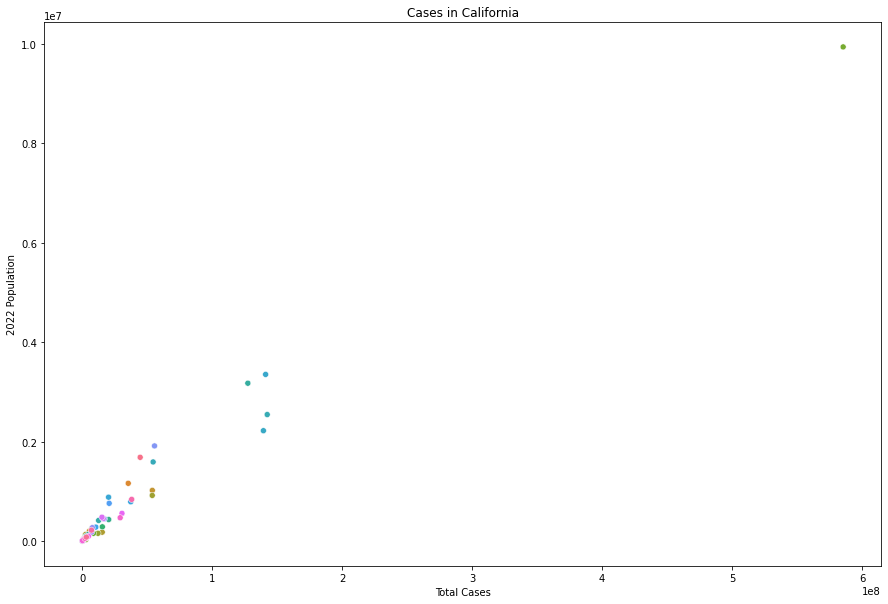

In [87]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Total Cases',y='2022 Population', data=CA_cases_by_county.reset_index(), hue='index', legend=False)
plt.title('Cases in California')
plt.show()

Looks like there is a linear relationship here

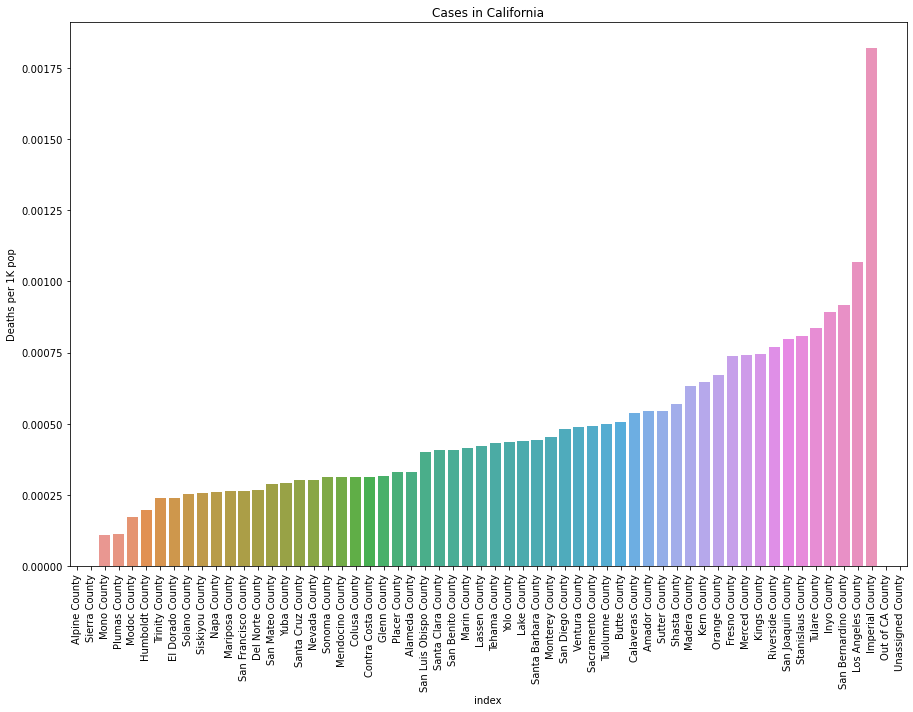

In [88]:
plt.figure(figsize=(15,10))
sns.barplot(x='index',y='Deaths per 1K pop', data=CA_cases_by_county.reset_index().sort_values(by='Deaths per 1K pop'))
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.savefig('./figures/Deaths_Cal_per_County_per_1K_Pop.png')

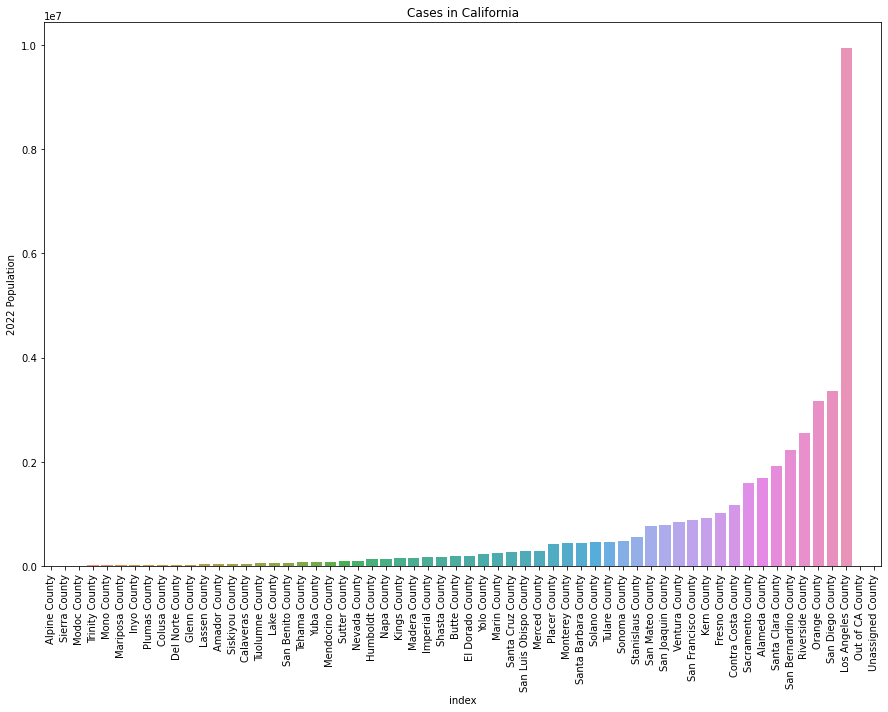

In [89]:
plt.figure(figsize=(15,10))
sns.barplot(x='index',y='2022 Population', data=CA_cases_by_county.reset_index().sort_values(by='2022 Population'))
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.savefig('./figures/Cal_County_Pop.png')

With a linear relationship between cases and population it's unsurprising that the order is like this.   However I notice that even though SoCal has more people in it and more cases, NorCal counties like Alameda, Santa Clara and San Francisco are in the top 10 most populous counties but mid to lower tier for cases and deaths.

In [90]:
# Lets save this hard work
CA_cases_by_county.to_csv('./data/CA_by_county.csv')
Total_States.to_csv('./data/Total_States.csv')

## Time-Series Analysis

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

<AxesSubplot:xlabel='Date'>

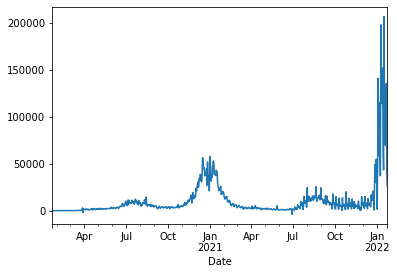

In [76]:
# Let's look at the daily number of cases in California first for our time series analysis
Cal.sum().diff().plot()

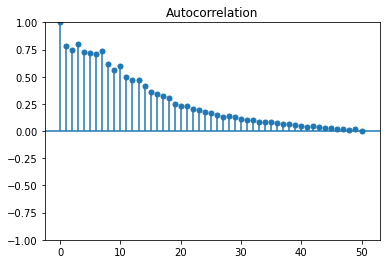

In [77]:
# The autocorrelation factor should tell us if we have stationary data
plot_acf(Cal.sum().diff(), alpha=1, lags=50, missing='drop')
plt.show()

<AxesSubplot:xlabel='Date'>

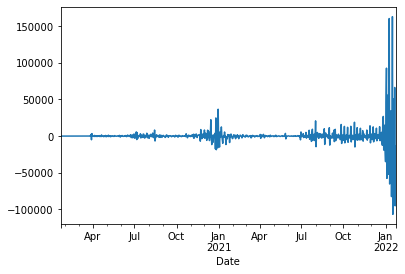

In [78]:
Cal.sum().diff().diff().plot()

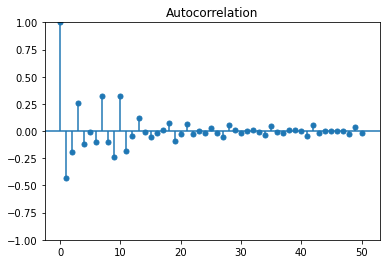

In [79]:
plot_acf(Cal.sum().diff().diff(), alpha=1, lags=50, missing='drop')
plt.show()

Text(0.5, 1.0, 'California')

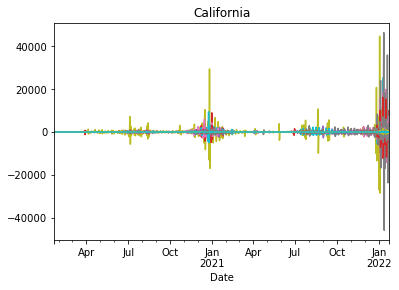

In [81]:
Cal.T.diff().diff().plot(legend=False)
plt.title('California')

In [82]:
# Compute and print the autocorrelation of daily changes
autocorrelation_cal = Cal.sum().diff().diff().autocorr()
print("The autocorrelation of daily case rate changes is %4.2f" %(autocorrelation_cal))
# Compute the approximate confidence interval
conf = 1.96/sqrt(len(Cal.sum().diff().diff()))
print("The approximate confidence interval is +/- %4.2f" %(conf))

The autocorrelation of daily case rate changes is -0.43
The approximate confidence interval is +/- 0.07


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  733
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7840.878
Date:                Tue, 26 Apr 2022   AIC                          15687.756
Time:                        12:14:59   BIC                          15701.543
Sample:                    01-22-2020   HQIC                         15693.074
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0769      0.014     -5.341      0.000      -0.105      -0.049
ma.L1         -0.6871      0.014    -50.043      0.000      -0.714      -0.660
sigma2      1.301e+08   2.31e-11   5.63e+18      0.0

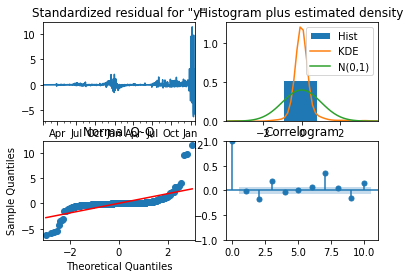

In [83]:
# Fit an AR(1) model to the first simulated data
mod = ARIMA(Cal.sum().diff(), order=(1,1,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())
print(res.plot_diagnostics())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

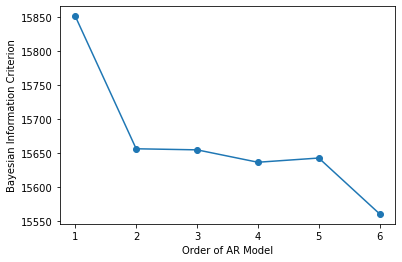

In [84]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(Cal.sum().diff().diff(), order=(p,0,0),trend='c', freq='D')
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

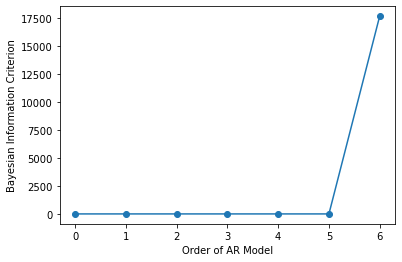

In [85]:
BIC = np.zeros(7)
for d in range(7):
    mod = ARIMA(Cal.sum().diff().diff(), order=(6,d,0), freq='D')
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(0,7), BIC[0:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

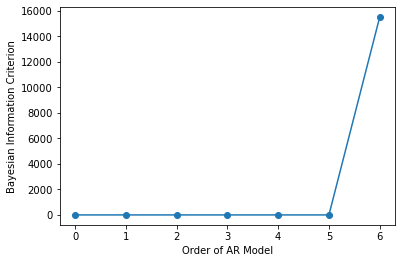

In [86]:
BIC = np.zeros(7)
for q in range(7):
    mod = ARIMA(Cal.sum().diff(), order=(6,0,q))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(0,7), BIC[0:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [87]:
# Fit an AR(6,0,0) model to the first simulated data
mod = ARIMA(Cal.sum().diff().diff(), order=(6,0,0), trend='c')
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  733
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7753.997
Date:                Tue, 26 Apr 2022   AIC                          15523.995
Time:                        12:15:12   BIC                          15560.772
Sample:                    01-22-2020   HQIC                         15538.181
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9782     96.660      0.372      0.710    -153.471     225.428
ar.L1         -0.7575      0.011    -71.881      0.000      -0.778      -0.737
ar.L2         -0.7871      0.011    -73.127      0.0

In [88]:
res.forecast(30)

2022-01-24    83693.395791
2022-01-25   -54802.383144
2022-01-26    26344.992154
2022-01-27     2303.322452
2022-01-28    -3670.043787
2022-01-29     -179.220940
2022-01-30   -25892.181600
2022-01-31    33091.158300
2022-02-01   -13119.820355
2022-02-02    -6667.362383
2022-02-03    17569.426912
2022-02-04   -11737.350899
2022-02-05     4177.209221
2022-02-06    -5393.815672
2022-02-07     3445.144506
2022-02-08     3478.972721
2022-02-09    -8546.481285
2022-02-10     8406.226638
2022-02-11    -2395.412443
2022-02-12    -2266.406951
2022-02-13     2606.828915
2022-02-14    -2104.726597
2022-02-15     2451.436840
2022-02-16    -2345.190052
2022-02-17     1007.288183
2022-02-18     1482.164454
2022-02-19    -2491.095337
2022-02-20     1721.073347
2022-02-21     -451.755057
2022-02-22     -107.089070
Freq: D, Name: predicted_mean, dtype: float64

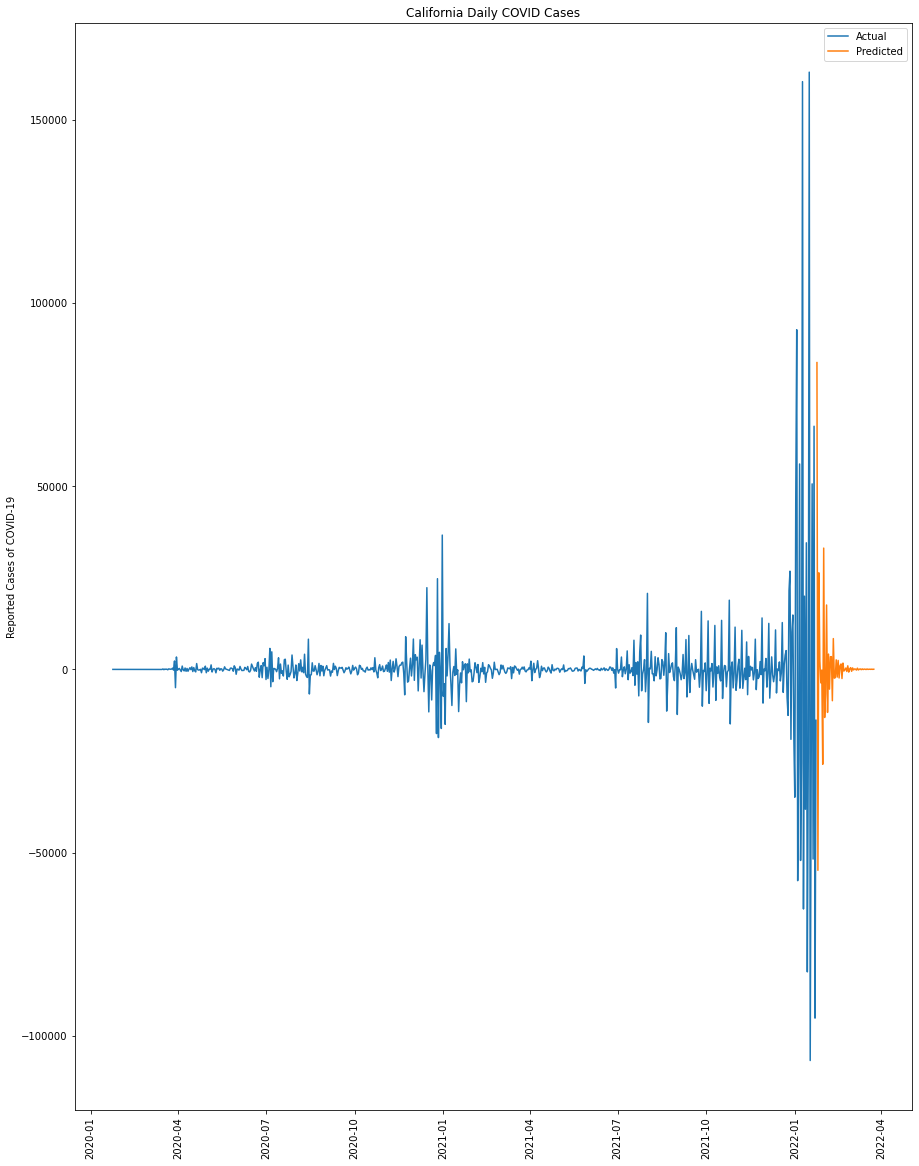

In [89]:
plt.figure(figsize=(15,20))
plt.plot(Cal.sum().diff().diff(), label='Actual')
plt.plot(res.forecast(60), label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.title('California Daily COVID Cases')
plt.ylabel('Reported Cases of COVID-19')
plt.savefig('./figures/Cal_Predicted_Cases.png')

Setting a constante trend seems to yeild a decent prediction.

In [90]:
Flor=State_by_county(us_confirmed,'Florida')

In [91]:
# Fit an AR(3,0,0) model to the first simulated data
mod = ARIMA(Flor.sum().diff().diff(), order=(6,0,0), trend='c')
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  733
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7829.661
Date:                Tue, 26 Apr 2022   AIC                          15675.322
Time:                        12:15:13   BIC                          15712.099
Sample:                    01-22-2020   HQIC                         15689.508
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003     87.501   3.68e-06      1.000    -171.499     171.500
ar.L1         -1.0581      0.010   -103.448      0.000      -1.078      -1.038
ar.L2         -1.0039      0.014    -71.624      0.0

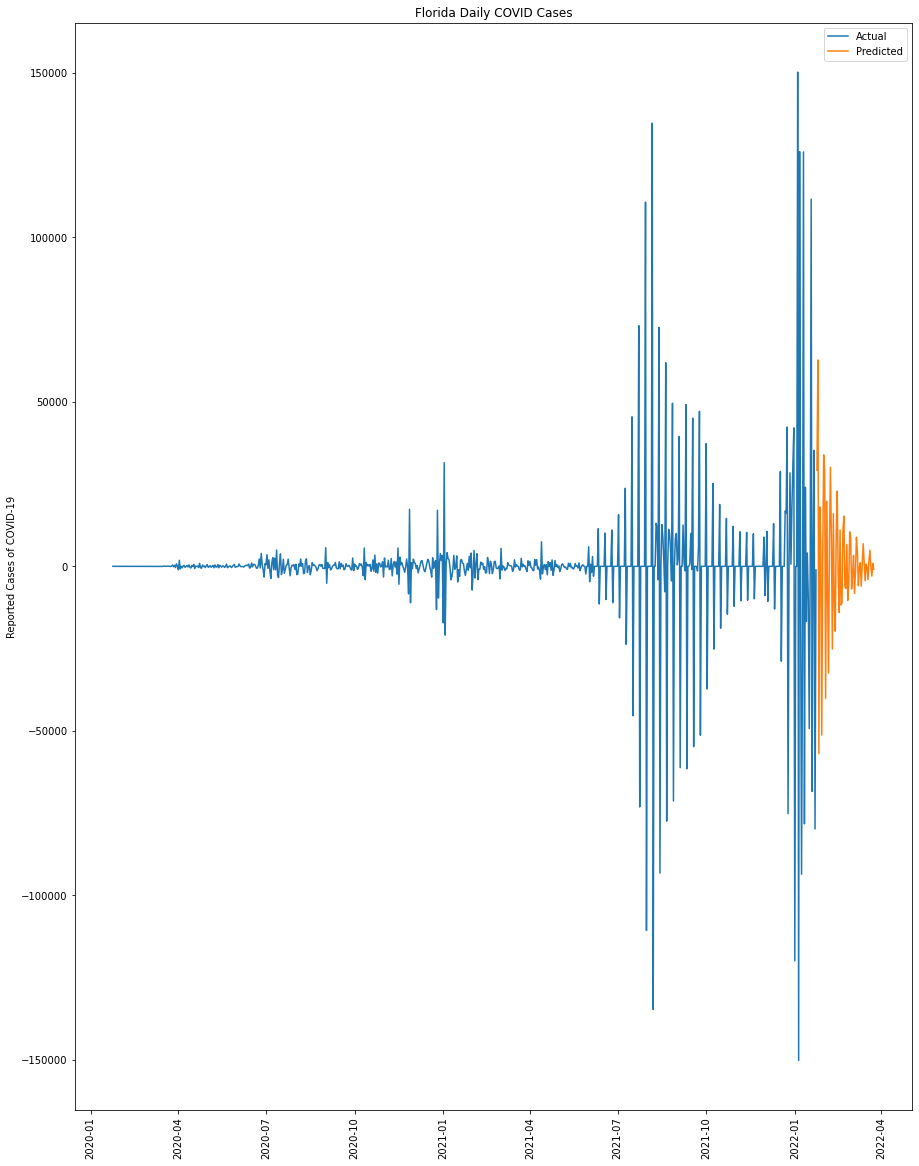

In [92]:
plt.figure(figsize=(15,20))
plt.plot(Flor.sum().diff().diff(), label='Actual')
plt.plot(res.forecast(60), label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.title('Florida Daily COVID Cases')
plt.ylabel('Reported Cases of COVID-19')
plt.savefig('./figures/Flor_Predicted_Cases.png')

Not as good for Florida.  Well... Florida is taking longer to stabilize than does California but maybe this isn't bad?

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

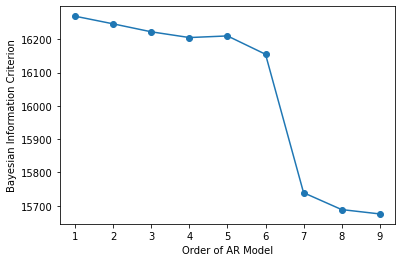

In [93]:
# Fit the data to an AR(p) for p = 0,...,9 , and save the BIC
BIC = np.zeros(10)
for p in range(10):
    mod = ARIMA(Flor.sum().diff(), order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

Interesting... Maybe I don't know what the AR model is yet?

Lets do some hyperperameter tuning

### Hyperperameter tuning

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

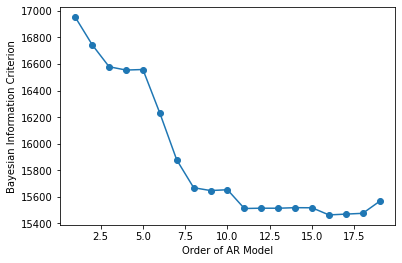

In [94]:
# Fit the data to an AR(p) for p = 0,...,20 , and save the BIC
BIC = np.zeros(20)
for p in range(20):
    mod = ARIMA(Flor.sum().diff(), order=(p,2,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,20), BIC[1:20], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

So is 19 the best value?

In [95]:
# Fit an AR(6,0,0) model to the first simulated data
mod = ARIMA(Flor.sum().diff(), order=(19,0,0), trend='c')
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  733
Model:                ARIMA(19, 0, 0)   Log Likelihood               -7662.307
Date:                Tue, 26 Apr 2022   AIC                          15366.615
Time:                        12:16:35   BIC                          15463.155
Sample:                    01-22-2020   HQIC                         15403.853
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7273.8223   2914.961      2.495      0.013    1560.604     1.3e+04
ar.L1         -0.1661      0.014    -11.716      0.000      -0.194      -0.138
ar.L2          0.1437      0.018      7.889      0.0

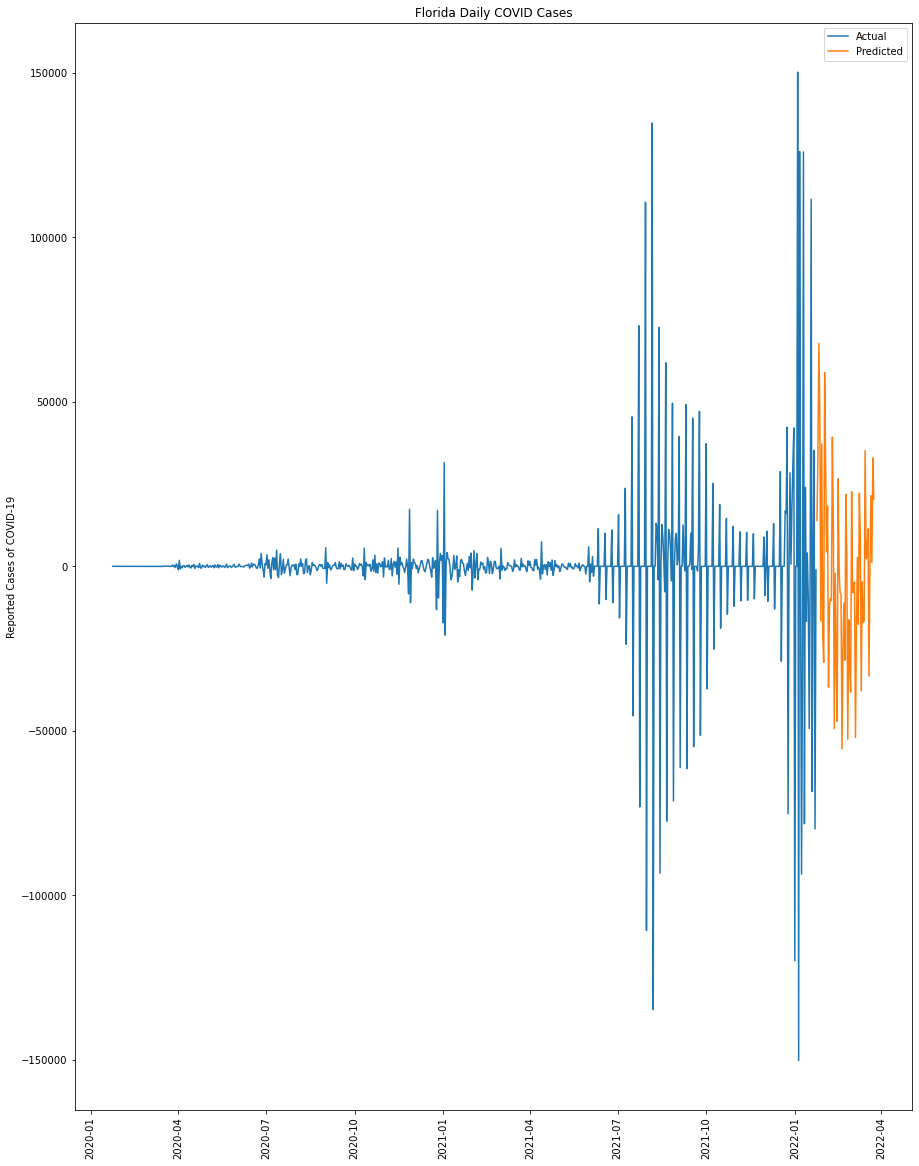

In [96]:
plt.figure(figsize=(15,20))
plt.plot(Flor.sum().diff().diff(), label='Actual')
plt.plot(res.forecast(60), label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.title('Florida Daily COVID Cases')
plt.ylabel('Reported Cases of COVID-19')
plt.savefig('./figures/Flor_Predicted_Cases_2.png')

This seems to be a better prediction.  Do I need to change the ARIMA model for each?  That doesn't seem like proper protocol.

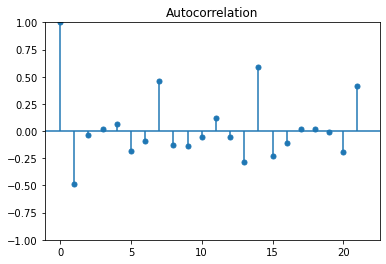

In [97]:
# The autocorrelation factor should tell us if we have stationary data
plot_acf(Flor.sum().diff().diff(), alpha=1, lags=21, missing='drop')
plt.show()

Something is happening and doesn't seem to be stationary.

In [98]:
mod = ARIMA(Flor.sum().diff(), seasonal_order=(6,2,0,7))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  733
Model:              ARIMA(6, 2, 0, 7)   Log Likelihood               -7752.006
Date:                Tue, 26 Apr 2022   AIC                          15518.012
Time:                        12:16:43   BIC                          15550.057
Sample:                    01-22-2020   HQIC                         15530.384
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -1.2921      0.010   -124.997      0.000      -1.312      -1.272
ar.S.L14      -0.9148      0.027    -33.633      0.000      -0.968      -0.861
ar.S.L21      -1.1150      0.029    -38.410      0.0

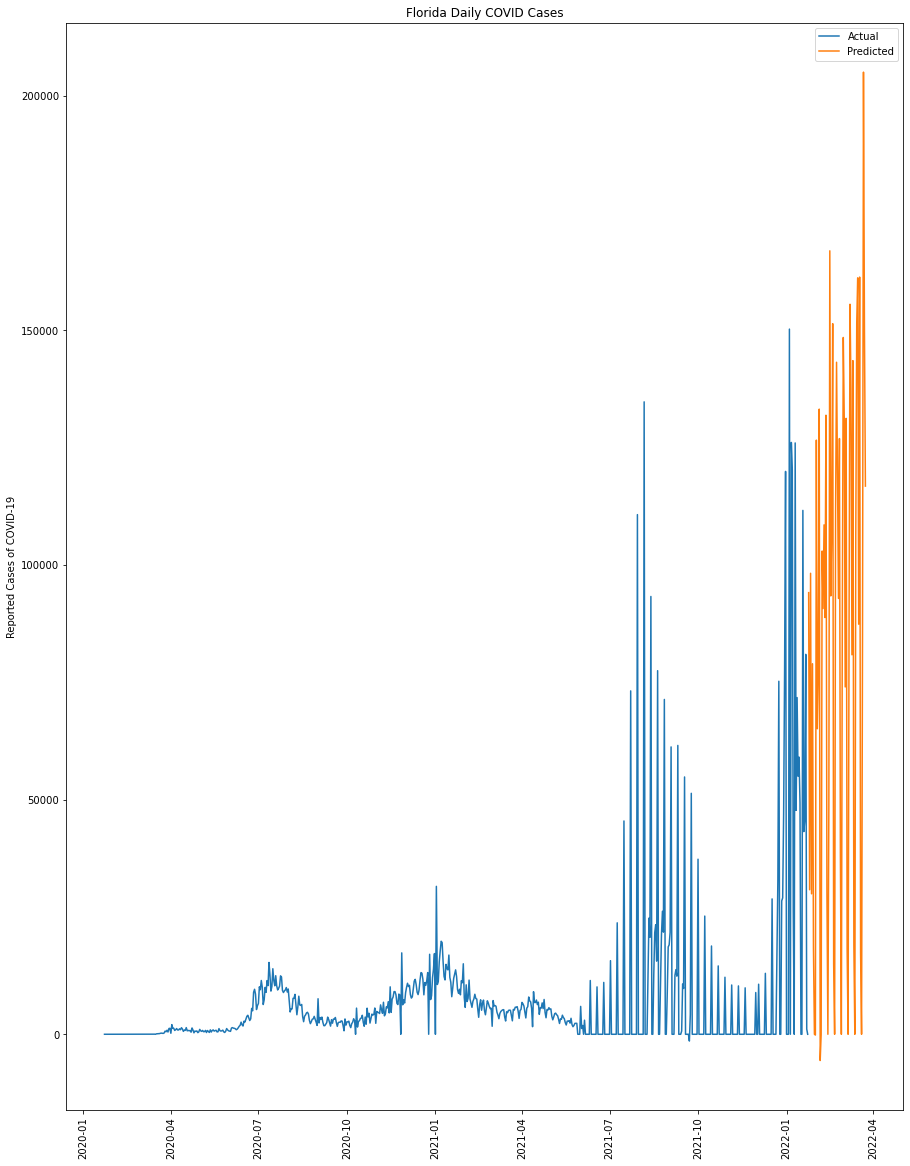

In [99]:
plt.figure(figsize=(15,20))
plt.plot(Flor.sum().diff(), label='Actual')
plt.plot(res.forecast(60), label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.title('Florida Daily COVID Cases')
plt.ylabel('Reported Cases of COVID-19')
plt.savefig('./figures/Flor_Predicted_Cases_3.png')

Now can I do the same for each county?

In [100]:
California_Counties[0].name

'Alameda'

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


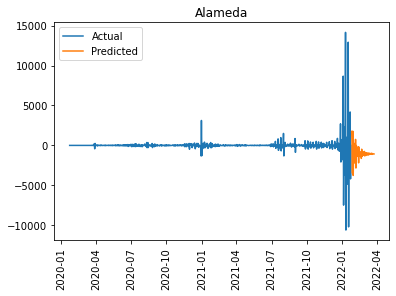

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


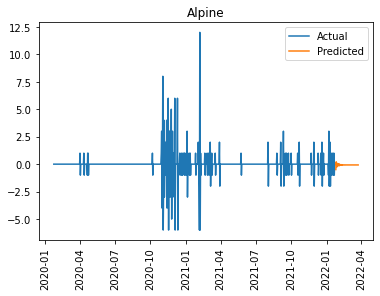

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


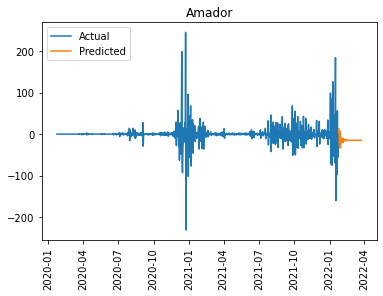

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


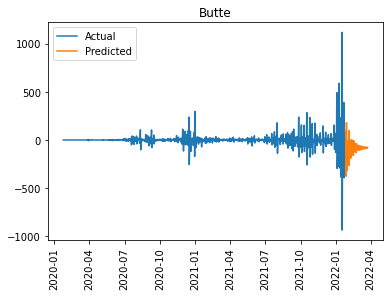

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


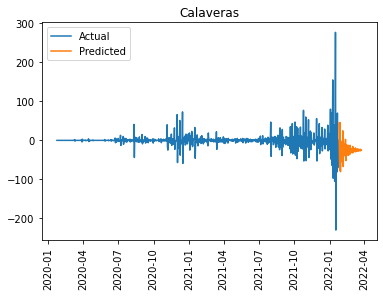

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


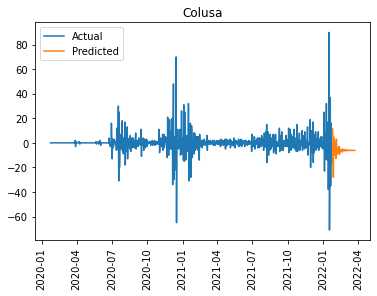

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


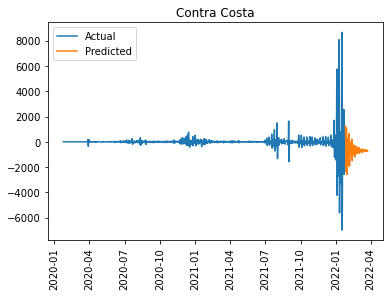

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


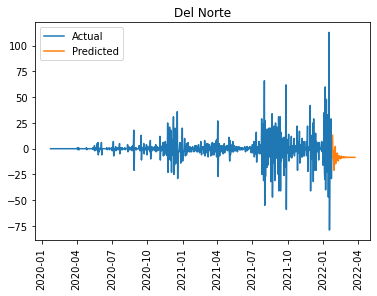

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


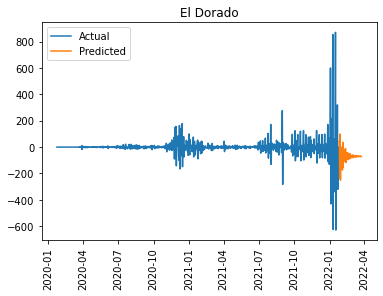

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


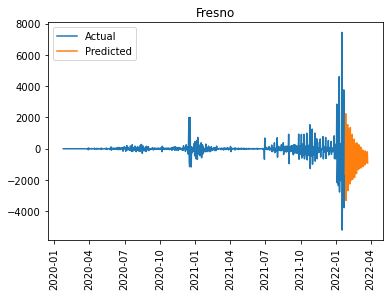

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


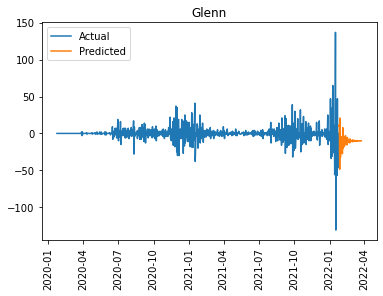

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


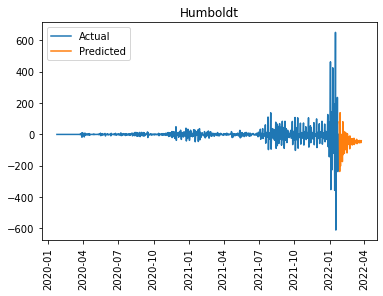

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


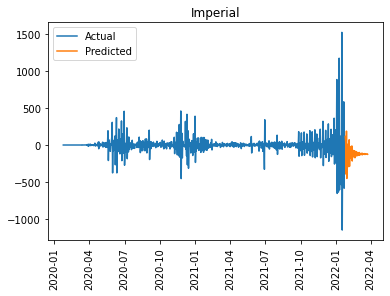

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


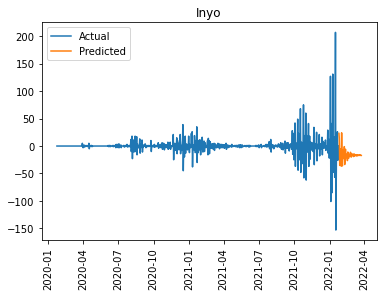

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


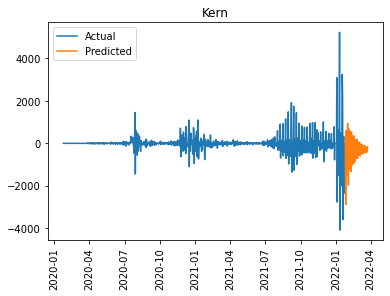

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


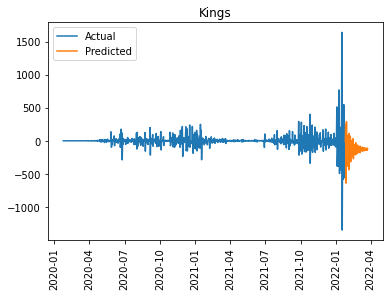

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


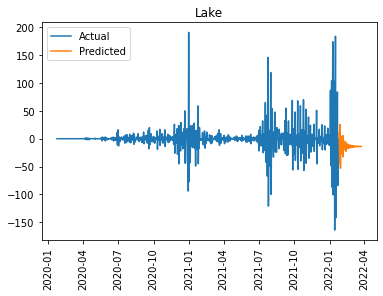

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


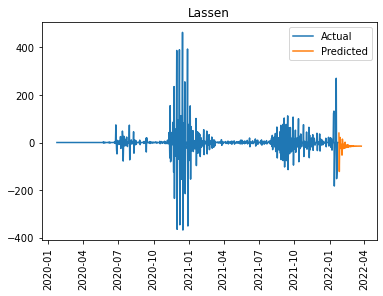

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


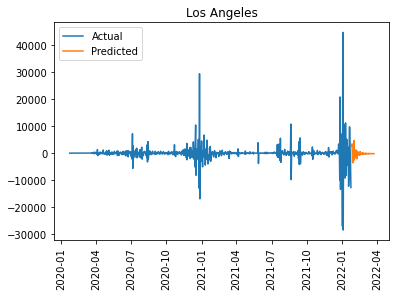

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


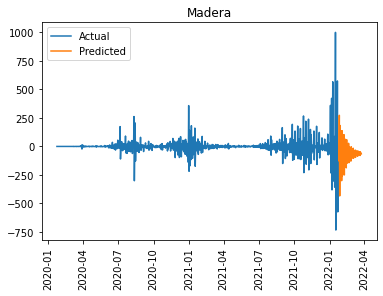

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


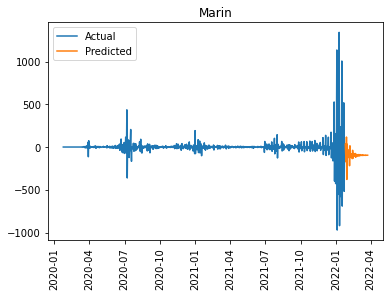

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


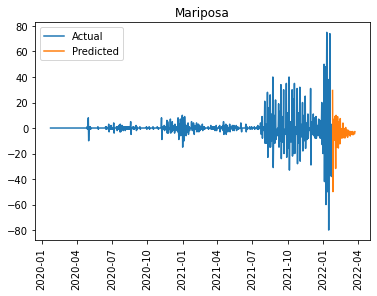

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


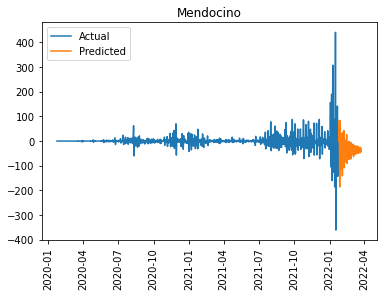

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


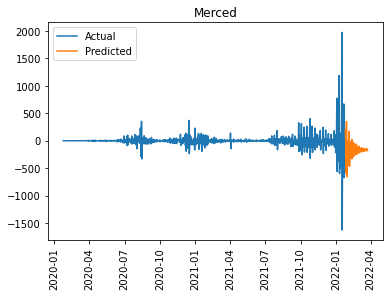

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


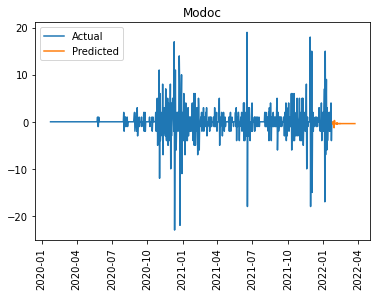

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


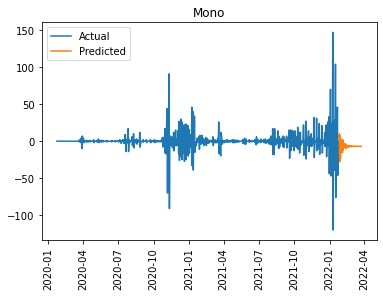

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


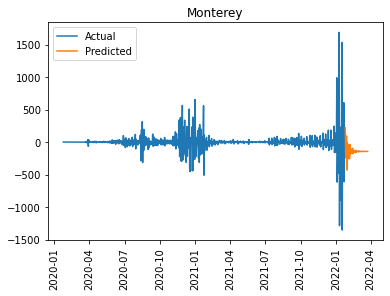

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


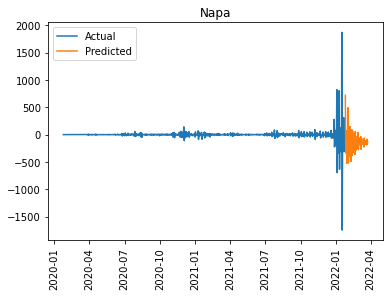

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


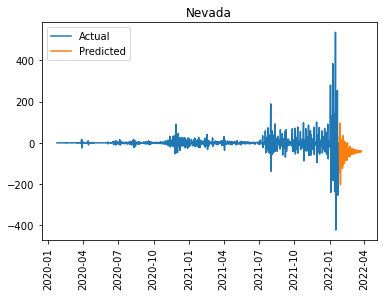

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarn

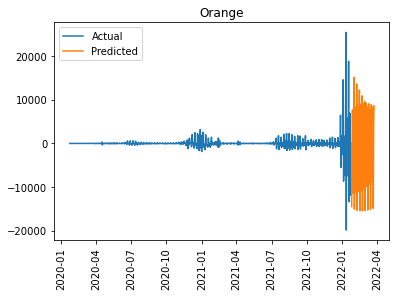

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


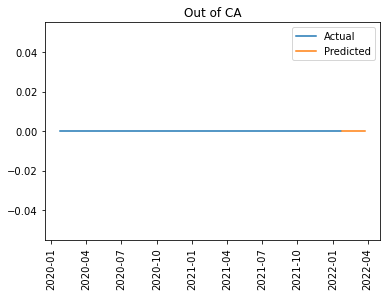

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


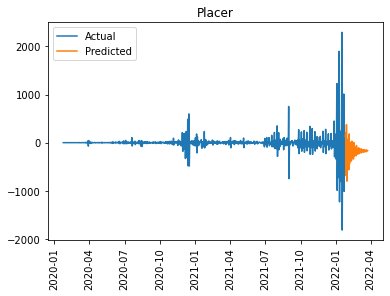

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


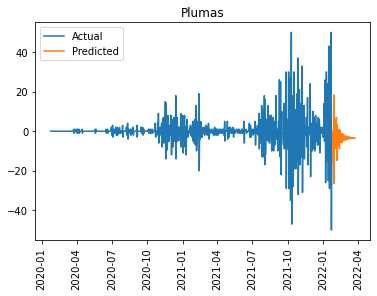

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


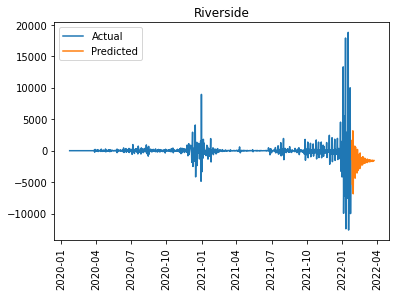

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


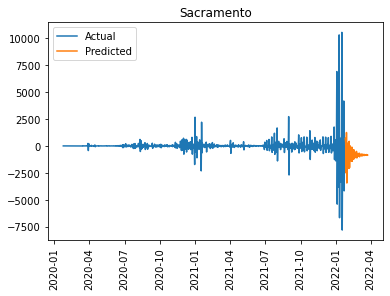

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


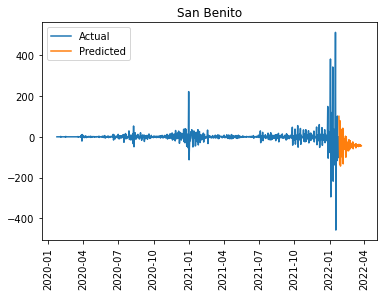

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


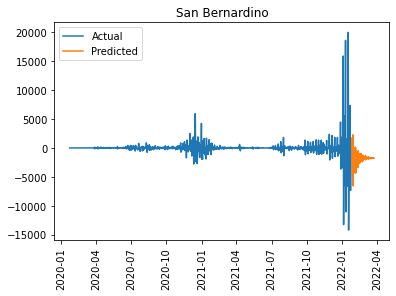

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


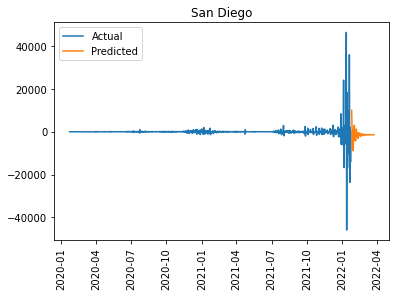

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


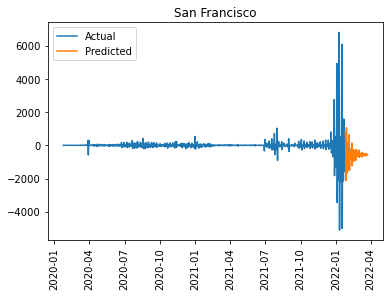

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


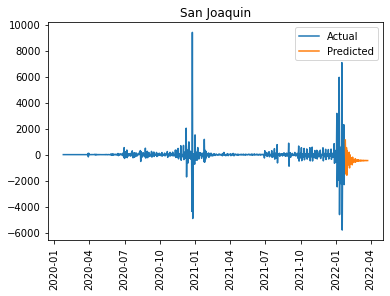

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


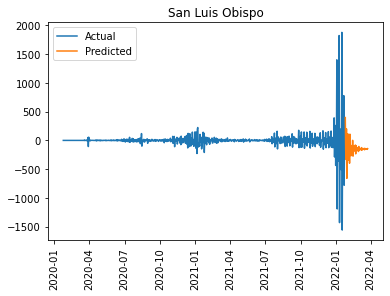

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


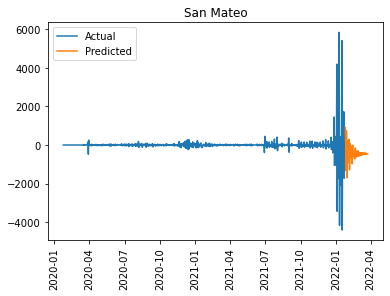

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


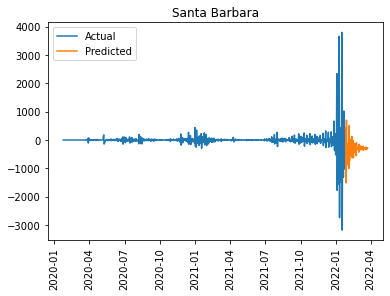

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


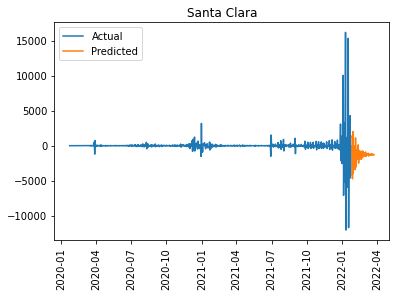

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


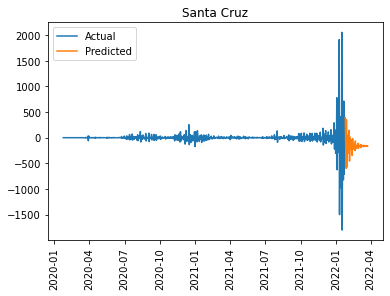

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


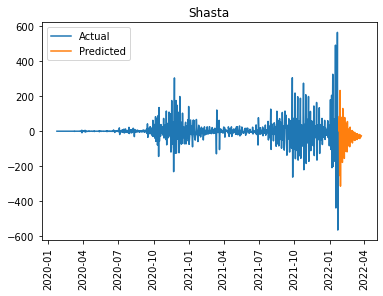

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


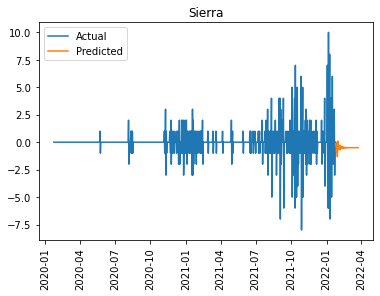

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


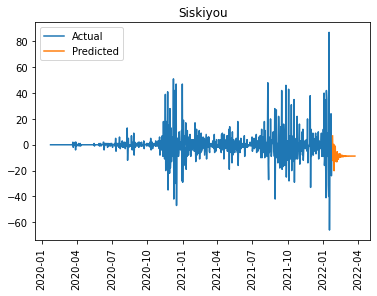

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


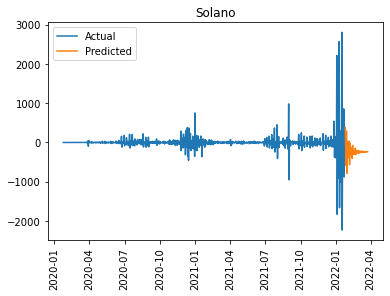

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


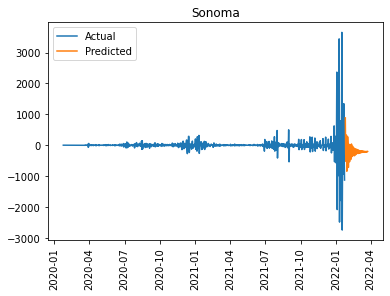

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


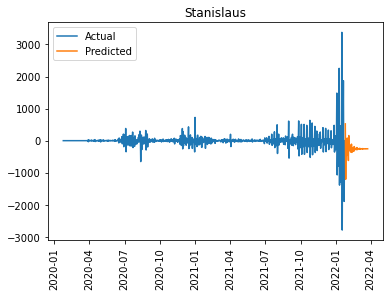

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


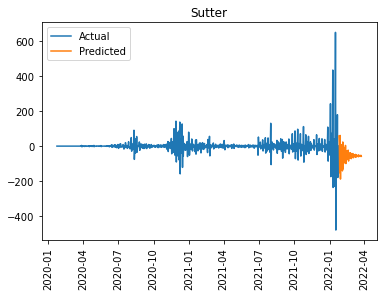

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


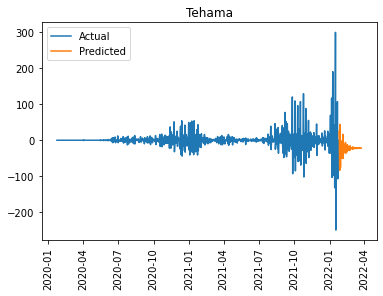

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


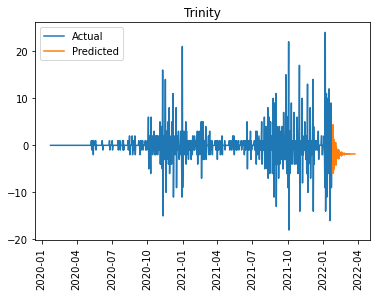

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


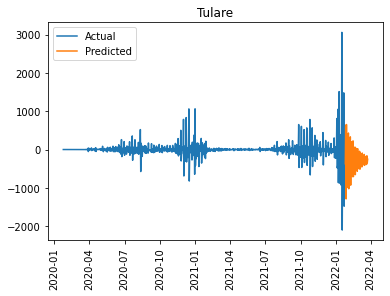

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


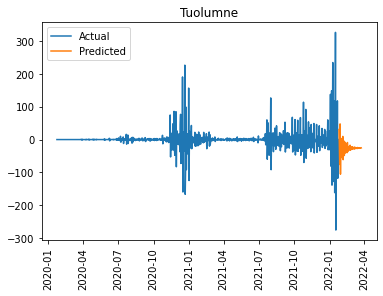

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


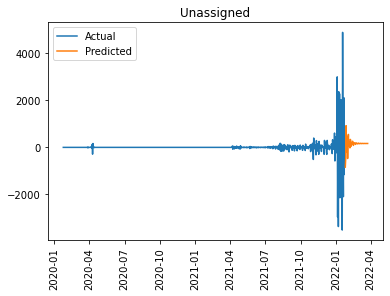

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


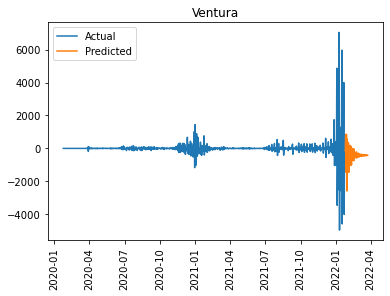

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


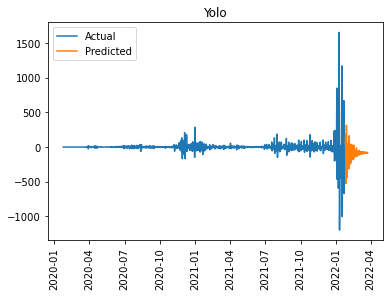

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


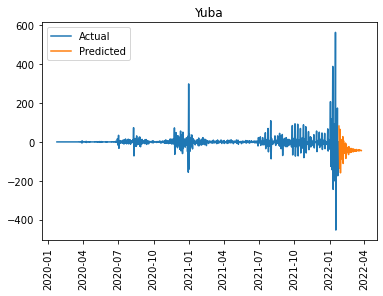

In [158]:
for n in California_Counties:
    mod = ARIMA(n.diff(), order=(6,2,0))
    res = mod.fit()
    plt.plot(n.diff().diff(), label='Actual')
    plt.plot(res.forecast(60).diff(), label='Predicted')
    plt.title(n.name)
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

I'm thinking that the ARIMA model isn't fit properly for each of these, but this does give us a picture which is useful.

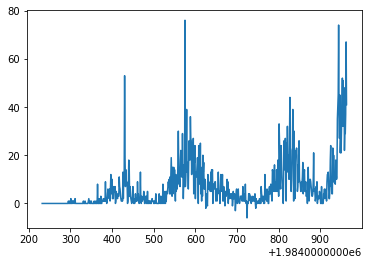

In [159]:
plt.plot(County.get_group(("Texas","Austin"))["Confirmed"].diff())

### Rolling averages may seem to help smooth out the data?

In [119]:
Cal_Cases=pd.DataFrame(Cal.sum(), columns=['total cases'])
Cal_Cases['new cases']=Cal_Cases.diff().fillna(0)
Cal_Cases['growth_new_cases']= Cal_Cases['new cases'].diff().fillna(0)
Cal_Cases['mov_avg']= Cal_Cases['new cases'].rolling(7).mean().fillna(0)
Cal_Cases

total cases  new cases  growth_new_cases        mov_avg
Date                                                               
2020-01-22            0        NaN               NaN            NaN
2020-01-23            0        0.0               NaN            NaN
2020-01-24            0        0.0               0.0            NaN
2020-01-25            0        0.0               0.0            NaN
2020-01-26            2        2.0               2.0            NaN
...                 ...        ...               ...            ...
2022-01-19      7419896   120719.0           50608.0  107769.285714
2022-01-20      7488875    68979.0          -51740.0   96415.285714
2022-01-21      7624185   135310.0           66331.0  106325.571429
2022-01-22      7664368    40183.0          -95127.0  105875.571429
2022-01-23      7690668    26300.0          -13883.0   80167.000000

[733 rows x 4 columns]

In [180]:
Cal_Cases['total cases'].diff().rolling(7).mean().fillna(0)

Date
2020-01-22         0.000000
2020-01-23         0.000000
2020-01-24         0.000000
2020-01-25         0.000000
2020-01-26         0.000000
                  ...      
2022-01-19    107769.285714
2022-01-20     96415.285714
2022-01-21    106325.571429
2022-01-22    105875.571429
2022-01-23     80167.000000
Name: total cases, Length: 733, dtype: float64

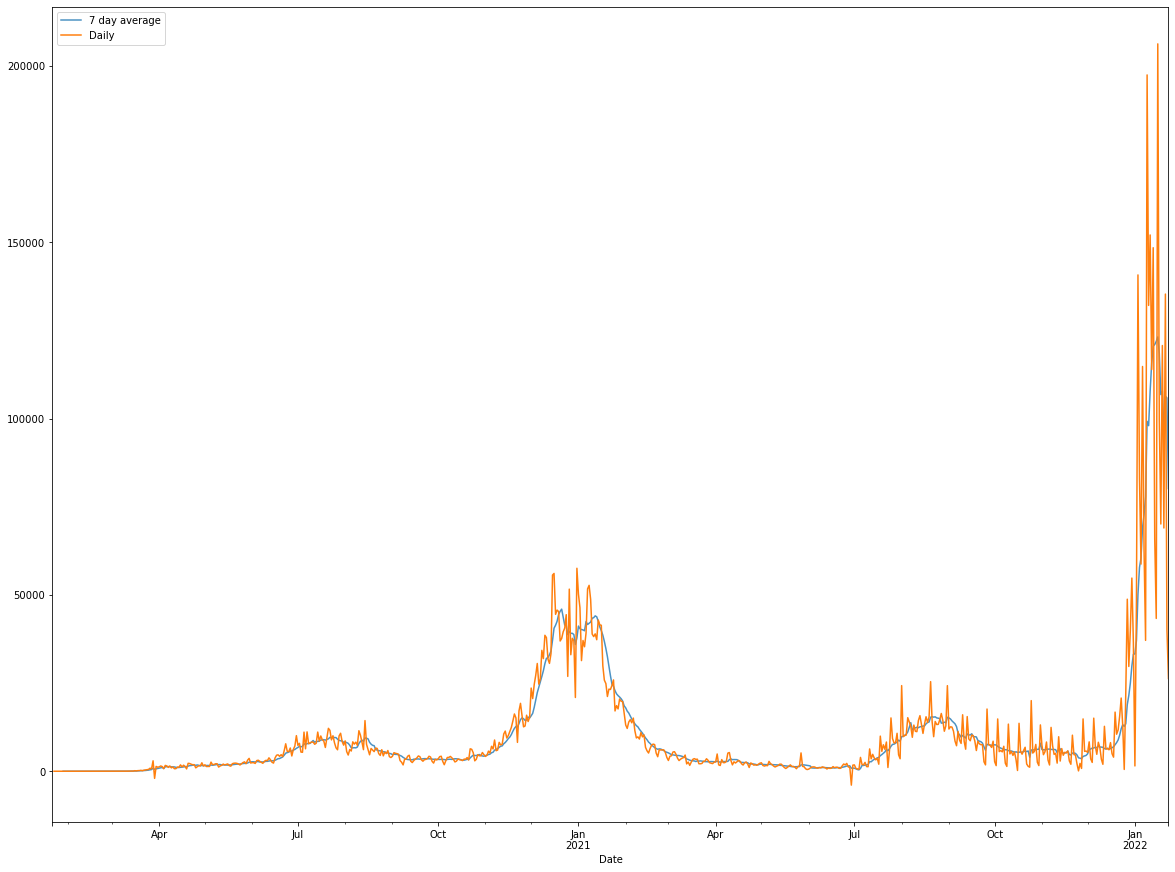

In [181]:
plt.figure(figsize=(20,15))
Cal_Cases['mov_avg'].plot(alpha=0.8)
Cal_Cases['new cases'].plot()
plt.legend(['7 day average','Daily'])

And now we have a 7 day rolling average to work with

In [123]:
mod = ARIMA(Cal_Cases['mov_avg'], order=(6,0,0), trend='c')
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                mov_avg   No. Observations:                  733
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -6330.950
Date:                Tue, 26 Apr 2022   AIC                          12677.901
Time:                        12:34:26   BIC                          12714.678
Sample:                    01-22-2020   HQIC                         12692.087
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.031e+04   5575.694      1.850      0.064    -614.065    2.12e+04
ar.L1          0.9927      0.015     64.436      0.000       0.962       1.023
ar.L2          0.0586      0.021      2.848      0.0

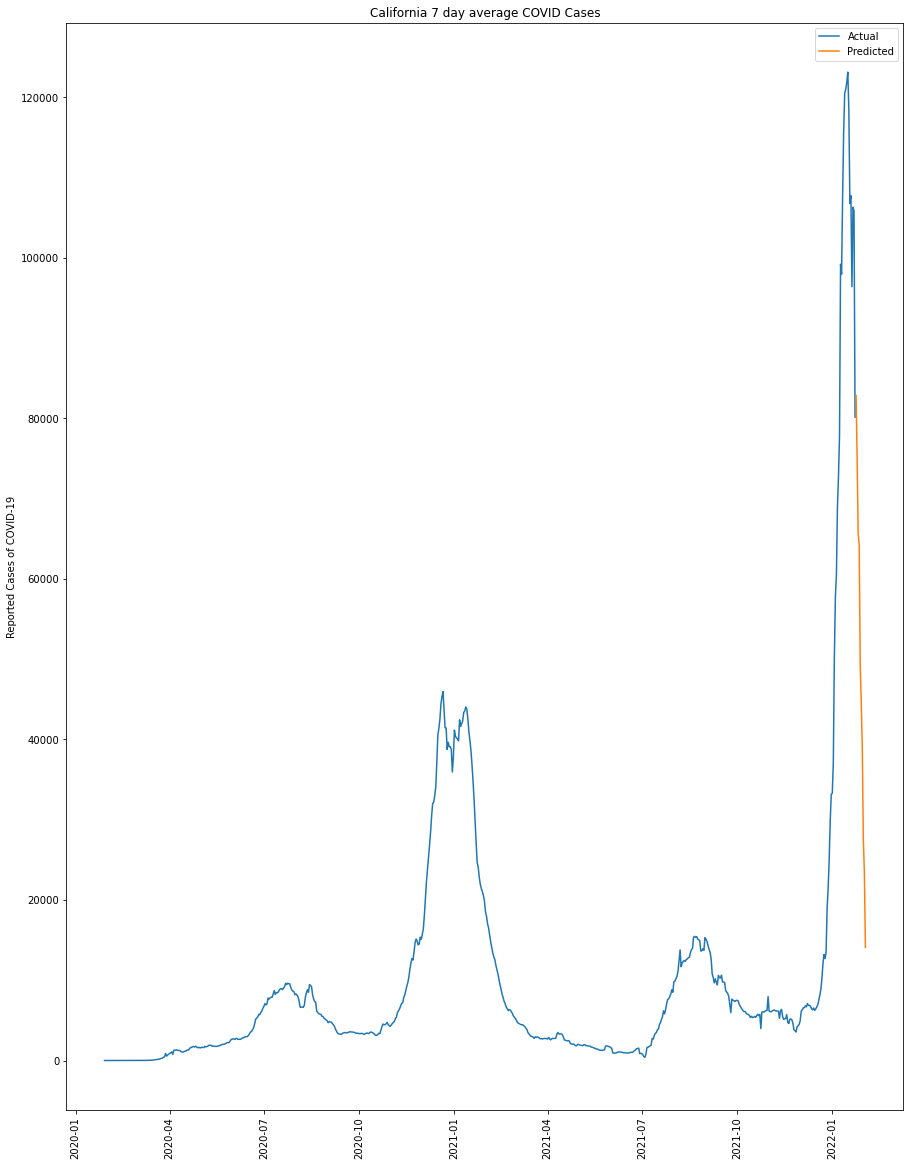

In [128]:
plt.figure(figsize=(15,20))
plt.plot(Cal_Cases['mov_avg'], label='Actual')
plt.plot(res.forecast(10), label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.title('California 7 day average COVID Cases')
plt.ylabel('Reported Cases of COVID-19')
plt.savefig('./figures/Cal_Predicted_Cases_7day.png')

Well it seems like the rolling average is pretty good as long as the prediction window is pretty short, like 10 days or less.

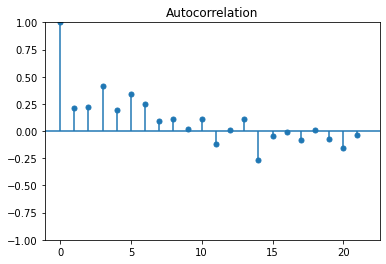

In [130]:
plot_acf(Cal_Cases['mov_avg'].diff(), alpha=1, lags=21, missing='drop')
plt.show()

In [187]:
# Next step is to make a moving average for all the counties not just a single state.

In [131]:
def objfunc(order,*params ):    
    from statsmodels.tsa.arima.model import ARIMA   
    p,d,q = order   
    fit = ARIMA(endog, order, exog).fit()  
    return fit.aic()    
from scipy.optimize import brute
grid = (slice(1, 3, 1), slice(1, 3, 1), slice(1, 3, 1))
brute(objfunc, grid, args=params, finish=None)

NameError: name 'params' is not defined

### Let's add some details like which states share a boarder with one another

In [132]:
# First we need to get the data from our population statistics.
state_neighbors = pd.read_csv('./data/state_neighbors.csv', index_col=0)
state_neighbors.rename(columns={'State Name':'Province/State'}, inplace=True)
state_neighbors

Province/State                                   Bordering States
0                Alabama           Florida, Georgia, Mississippi, Tennessee
1                 Alaska                                               None
2         American Samoa                                               None
3                Arizona     California, Colorado, Nevada, New Mexico, Utah
4               Arkansas  Louisiana, Mississippi, Missouri, Oklahoma, Te...
5             California                            Arizona, Nevada, Oregon
6               Colorado  Arizona, Kansas, Nebraska, New Mexico, Oklahom...
7            Connecticut              Massachusetts, New York, Rhode Island
8               Delaware                 Maryland, New Jersey, Pennsylvania
9   District of Columbia                                 Maryland, Virginia
10               Florida                                   Alabama, Georgia
11               Georgia  Alabama, Florida, North Carolina, South Caroli...
12                  Guam                                               None
13                Hawaii                                               None
14                 Idaho  Montana, Nevada, Oregon, Utah, Washington, Wyo...
15              Illinois  Indiana, Iowa, Michigan, Kentucky, Missouri, W...
16               Indiana                 Illinois, Kentucky, Michigan, Ohio
17                  Iowa  Illinois, Minnesota, Missouri, Nebraska, South...
18                Kansas             Colorado, Missouri, Nebraska, Oklahoma
19              Kentucky  Illinois, Indiana, Missouri, Ohio, Tennessee, ...
20             Louisiana                       Arkansas, Mississippi, Texas
21                 Maine                                      New Hampshire
22              Maryland    Delaware, Pennsylvania, Virginia, West Virginia
23         Massachusetts  Connecticut, New Hampshire, New York, Rhode Is...
24              Michigan  Illinois, Indiana, Minnesota (water border), O...
25             Minnesota  Iowa, Michigan (water border), North Dakota, S...
26           Mississippi           Alabama, Arkanssas, Louisiana, Tennessee
27              Missouri  Arkansas, Illinois, Iowa, Kansas, Kentucky, Ne...
28               Montana         Idaho, North Dakota, South Dakota, Wyoming
29              Nebraska  Colorado, Iowa, Kansas, Missouri, South Dakota...
30                Nevada           Arizona, California, Idaho, Oregon, Utah
31         New Hampshire                      Maine, Massachusetts, Vermont
32            New Jersey                   Delaware, New York, Pennsylvania
33            New Mexico           Arizona, Colorado, Oklahoma, Texas, Utah
34              New York  Connecticut, Massachusetts, New Jersey, Pennsy...
35        North Carolina       Georgia, South Carolina, Tennessee, Virginia
36          North Dakota                   Minnesota, Montana, South Dakota
37                  Ohio  Indiana, Kentucky, Michigan, Pennsylvania, Wes...
38              Oklahoma  Arkansas, Colorado, Kansas, Missouri, New Mexi...
39                Oregon              California, Idaho, Nevada, Washington
40          Pennsylvania  Delaware, Maryland, New Jersey, New York, Ohio...
41           Puerto Rico                                               None
42          Rhode Island  Connecticut, Massachusetts, New York (water bo...
43        South Carolina                            Georgia, North Carolina
44          South Dakota  Iowa, Minnesota, Montana, Nebraska, North Dako...
45             Tennessee  Alabama, Arkansas, Georgia, Kentucky, Mississi...
46                 Texas          Arkansas, Louisiana, New Mexico, Oklahoma
47                  Utah  Arizona, Colorado, Idaho, Nevada, New Mexico, ...
48               Vermont             Massachusetts, New Hampshire, New York
49              Virginia  Kentucky, Maryland, North Carolina, Tennessee,...
50            Washington                                      Idaho, Oregon
51         West Virginia   Kentucky, Maryland, Ohio, Penns

In [ ]:
# Merge the boarding states into the current database
us_confirmed.merge(state_neighbors, on='Province/State', how='left')

In [ ]:
# Now I just need to probably One Hot Encode the boardering states and I'll have something to work with for prediction.
# Since there can be multiple boarders this may work with some states haveing multiple scores... On the other hand we could use label encoder and just have a number
# I like the idea of it all tying back to the state names though.

## Clustering Analysis
It seems to me that if we can't necessarily predict which states will have the highest with our time series analysis (which worked okay) we could try to cluster the data and try to learn more about the different groups of states and counties which are either dealing best and worst with COVID-19

In [133]:
Cluster_States=pd.merge(Population_2022_State, confirmed_States, right_index=True, left_on='State')

In [134]:
state_neighbors = pd.read_csv('./data/state_neighbors.csv', index_col=0)
state_neighbors.rename(columns={'State Name':'State'}, inplace=True)
Cluster_States=pd.merge(Cluster_States, state_neighbors, on='State')
Cluster_States

State  2022 Population  Density (mi²)   Confirmed  \
0             California         39664128            255  1839595402   
1                  Texas         30097526            115  1487676083   
2                Florida         22177997            414  1229501228   
3               New York         19223191            408   999841117   
4           Pennsylvania         12805190            286   560845432   
5               Illinois         12518071            225   665746663   
6                   Ohio         11727377            287   539574789   
7                Georgia         10936299            190   569298366   
8         North Carolina         10807491            222   496573788   
9               Michigan          9995212            177   453931040   
10            New Jersey          8870685           1206   473701874   
11              Virginia          8638218            219   326571167   
12            Washington          7887965            119   229148000   
13               Arizona          7640796             67   432838923   
14             Tennessee          7001803            170   435190081   
15         Massachusetts          6922107            887   332112469   
16               Indiana          6842385            191   366127750   
17              Missouri          6184843             90   310799410   
18              Maryland          6075314            626   220305687   
19              Colorado          5961083             58   259968431   
20             Wisconsin          5867518            108   333851532   
21             Minnesota          5739781             72   288645998   
22        South Carolina          5342388            178   297266041   
23               Alabama          4949697             98   283282881   
24             Louisiana          4616106            107   262845059   
25              Kentucky          4487233            114   235910435   
26                Oregon          4325290             45   108440757   
27              Oklahoma          4007179             58   223813728   
28           Connecticut          3546588            732   158088553   
29                  Utah          3363182             41   199344756   
30                Nevada          3238601             30   160901056   
31           Puerto Rico          3194714            924    66792521   
32                  Iowa          3174426             57   183787370   
33              Arkansas          3042017             58   178058372   
34           Mississippi          2961536             63   171532388   
35                Kansas          2919179             36   158153567   
36            New Mexico          2109093             17   100637143   
37              Nebraska          1960790             26   108758454   
38                 Idaho          1896652             23    97503876   
39         West Virginia          1755715             73    81751586   
40                Hawaii          1401709            218    24421302   
41         New Hampshire          1378449            154    46618016   
42                 Maine          1359677             44    32007610   
43               Montana          1093117              8    56592296   
44          Rhode Island          1062583           1028    70291283   
45              Delaware           998619            512    51593423   
46          South Dakota           902542             12    59651348   
47          North Dakota           774008             11    54727328   
48                Alaska           720763              1    39060603   
49  District of Columbia           718355          11776    25268132   
50               Vermont           622882             68    12554607   
51               Wyoming           582233              6    31941561   

      Deaths                                   Bordering States  
0   27149306                            Arizona, Nevada, Oregon  
1   24773812          Arkansas, Louisiana, New Mexico, Oklahoma  
2   

In [135]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [136]:
X=Cluster_States.drop('Deaths',axis=1).reset_index()
y=Cluster_States.reset_index().Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(39, 6) (13, 6)
(39,) (13,)


In [137]:
le = LabelEncoder()
df3=Cluster_States.copy()
cat_columns = Cluster_States.select_dtypes(['object']).columns
for n in cat_columns:
    le.fit(df3[n])
    df3[n]=le.transform(df3[n])

In [138]:
X=df3.drop('Deaths',axis=1).reset_index()
y=df3.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(39, 6) (13, 6)
(39,) (13,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


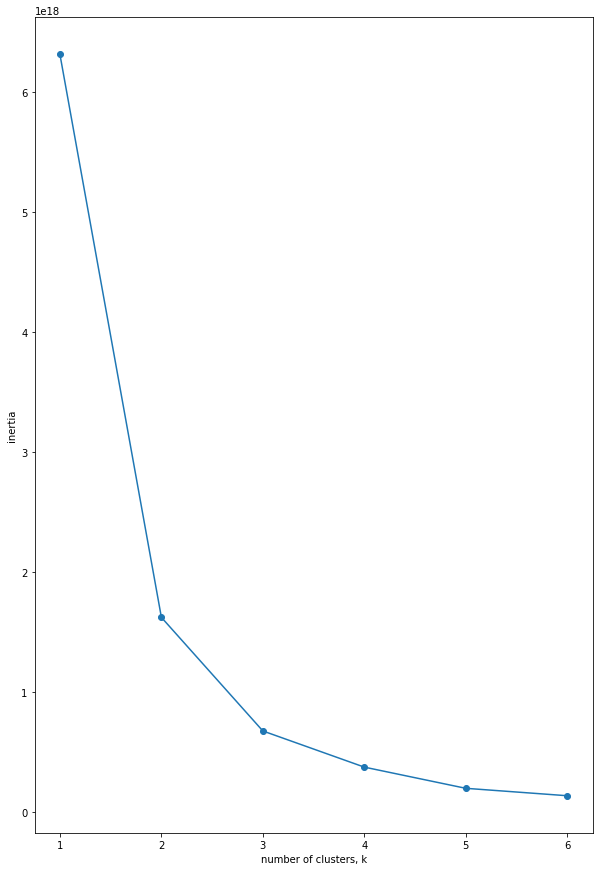

In [140]:
# Import KMeans to start, I'll try KNN afterwards
from sklearn.cluster import KMeans

ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,15))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

In [184]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,10):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [185]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

Train Score  Test Score          RMSE
0     1.000000    0.413817  1.739188e+06
1     0.954658    0.498257  1.609054e+06
2     0.922211    0.531027  1.555620e+06
3     0.900257    0.690576  1.263592e+06
4     0.880462    0.690068  1.264630e+06
5     0.855572    0.701619  1.240838e+06
6     0.860933    0.677477  1.290060e+06
7     0.826574    0.652492  1.339097e+06
8     0.799817    0.699243  1.245769e+06

Okay... So cluster analysis with a K of 3 seems to be 91.7% accurate

The score is  0.7016193912356428


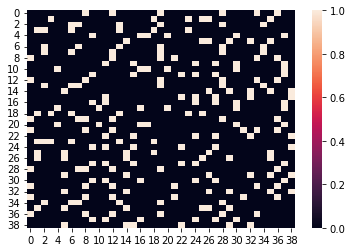

In [183]:
knn = KNeighborsRegressor(6)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


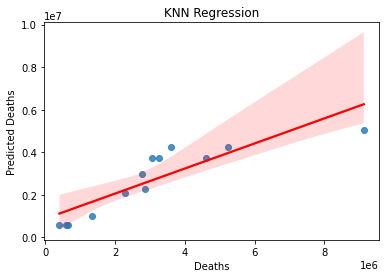

In [186]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

<font color ='red'>**This is terrible!**</font>

In [146]:
from sklearn.cluster import KMeans
# Create a KMeans instance with k clusters: model
model =KMeans(n_clusters=2)

# Fit model to samples
model.fit(X_train)

# Make a row for each group predicted
knn=X_train.copy()
knn['group']=model.predict(X_train)
knn.sort_index(inplace=True)

# Add back in the Deaths so we can see how it did
knn['Deaths']=y_train
knn

index  State  2022 Population  Density (mi²)   Confirmed  \
0       0      4         39664128            255  1839595402   
1       1     44         30097526            115  1487676083   
2       2      9         22177997            414  1229501228   
3       3     32         19223191            408   999841117   
4       4     38         12805190            286   560845432   
5       5     13         12518071            225   665746663   
6       6     35         11727377            287   539574789   
7       7     10         10936299            190   569298366   
8       8     33         10807491            222   496573788   
9       9     22          9995212            177   453931040   
10     10     30          8870685           1206   473701874   
11     11     47          8638218            219   326571167   
13     13      2          7640796             67   432838923   
14     14     43          7001803            170   435190081   
16     16     14          6842385            191   366127750   
17     17     25          6184843             90   310799410   
19     19      5          5961083             58   259968431   
20     20     50          5867518            108   333851532   
22     22     41          5342388            178   297266041   
24     24     18          4616106            107   262845059   
25     25     17          4487233            114   235910435   
26     26     37          4325290             45   108440757   
28     28      6          3546588            732   158088553   
29     29     45          3363182             41   199344756   
30     30     28          3238601             30   160901056   
31     31     39          3194714            924    66792521   
34     34     24          2961536             63   171532388   
36     36     31          2109093             17   100637143   
37     37     27          1960790             26   108758454   
38     38     12          1896652             23    97503876   
39     39     49          1755715             73    81751586   
40     40     11          1401709            218    24421302   
43     43     26          1093117              8    56592296   
45     45      7           998619            512    51593423   
46     46     42           902542             12    59651348   
47     47     34           774008             11    54727328   
48     48      1           720763              1    39060603   
50     50     46           622882             68    12554607   
51     51     51           582233              6    31941561   

    Bordering States  group    Deaths  
0                  8      1  27149306  
1                 11      1  24773812  
2                  3      1  19411502  
3                 18      1  28930249  
4                 21      0  12882390  
5                 34      0  12172981  
6                 35      0   9755492  
7                  2      0  10187037  
8                 26      0   6259101  
9                 29      0  10012569  
10                22      0  14035395  
11                38      0   5108260  
13                13      0   8211786  
14                 0      0   5862291  
16                32      0   6613892  
17                10      0   4677755  
19                 7      0   3343591  
20                31      0   3663752  
22                25      0   4762881  
24                12      0   5748807  
25                30      0   3214299  
26                14      0   1408742  
28                45      0   4314072  
29                 5      0   1112698  
30                 4      0   2717918  
31                49      0   1154504  
34                 1      0   3720209  
36                 6      0   1937518  
37                16      0   1089705  
38                47      0   1108240  
39                39      0   1364581  
40                49      0    276712  
43                27      0    778395  
45                42      0    849197  
46                37      0    889214  
47 

<AxesSubplot:xlabel='Confirmed', ylabel='2022 Population'>

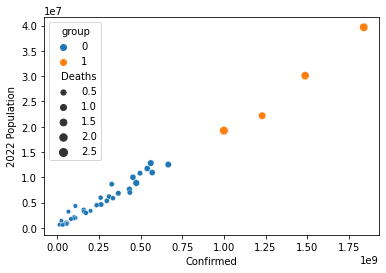

In [149]:
# Plot the data and see how the groups look.  Are they predicted by population and confirmed cases?
sns.scatterplot(x='Confirmed',y='2022 Population', data=knn, hue='group', size='Deaths')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 3

# import some data to play with
X=X_train
y=y_train

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
clf = neighbors.KNeighborsClassifier(1, weights='uniform')
clf.fit(X, y)
clf.

In [ ]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [ ]:
xx,yy

## Totals by County

In [161]:
# Merge the boarding states into the current database
States_with_boarders=simplified.merge(state_neighbors, left_on='Province/State', right_on='State', how='left').drop('State', axis=1)
States_with_boarders

Date   Admin2 Province/State  Confirmed  Deaths Country/Region  \
0       2020-01-22  Autauga        Alabama          0       0             US   
1       2020-01-23  Autauga        Alabama          0       0             US   
2       2020-01-24  Autauga        Alabama          0       0             US   
3       2020-01-25  Autauga        Alabama          0       0             US   
4       2020-01-26  Autauga        Alabama          0       0             US   
...            ...      ...            ...        ...     ...            ...   
2449681 2022-01-19   Weston        Wyoming       1332      16             US   
2449682 2022-01-20   Weston        Wyoming       1341      16             US   
2449683 2022-01-21   Weston        Wyoming       1349      16             US   
2449684 2022-01-22   Weston        Wyoming       1349      16             US   
2449685 2022-01-23   Weston        Wyoming       1349      16             US   

                                          Bordering States  
0                 Florida, Georgia, Mississippi, Tennessee  
1                 Florida, Georgia, Mississippi, Tennessee  
2                 Florida, Georgia, Mississippi, Tennessee  
3                 Florida, Georgia, Mississippi, Tennessee  
4                 Florida, Georgia, Mississippi, Tennessee  
...                                                    ...  
2449681  Colorado, Idaho, Montana, Nebraska, South Dako...  
2449682  Colorado, Idaho, Montana, Nebraska, South Dako...  
2449683  Colorado, Idaho, Montana, Nebraska, South Dako...  
2449684  Colorado, Idaho, Montana, Nebraska, South Dako...  
2449685  Colorado, Idaho, Montana, Nebraska, South Dako...  

[2449686 rows x 7 columns]

In [172]:
States_with_boarders['new cases']= States_with_boarders['Confirmed'].diff()
States_with_boarders

Date   Admin2 Province/State  Confirmed  Deaths Country/Region  \
0       2020-01-22  Autauga        Alabama          0       0             US   
1       2020-01-23  Autauga        Alabama          0       0             US   
2       2020-01-24  Autauga        Alabama          0       0             US   
3       2020-01-25  Autauga        Alabama          0       0             US   
4       2020-01-26  Autauga        Alabama          0       0             US   
...            ...      ...            ...        ...     ...            ...   
2449681 2022-01-19   Weston        Wyoming       1332      16             US   
2449682 2022-01-20   Weston        Wyoming       1341      16             US   
2449683 2022-01-21   Weston        Wyoming       1349      16             US   
2449684 2022-01-22   Weston        Wyoming       1349      16             US   
2449685 2022-01-23   Weston        Wyoming       1349      16             US   

                                          Bordering States  new cases  
0                 Florida, Georgia, Mississippi, Tennessee        NaN  
1                 Florida, Georgia, Mississippi, Tennessee        0.0  
2                 Florida, Georgia, Mississippi, Tennessee        0.0  
3                 Florida, Georgia, Mississippi, Tennessee        0.0  
4                 Florida, Georgia, Mississippi, Tennessee        0.0  
...                                                    ...        ...  
2449681  Colorado, Idaho, Montana, Nebraska, South Dako...       17.0  
2449682  Colorado, Idaho, Montana, Nebraska, South Dako...        9.0  
2449683  Colorado, Idaho, Montana, Nebraska, South Dako...        8.0  
2449684  Colorado, Idaho, Montana, Nebraska, South Dako...        0.0  
2449685  Colorado, Idaho, Montana, Nebraska, South Dako...        0.0  

[2449686 rows x 8 columns]

Can't do this diff because it can cross from one county to the next.  Need to make a lambda funciton for this.

In [175]:
States_with_boarders["new cases"] = States_with_boarders.groupby(["Province/State", "Admin2"])["new cases"].transform(lambda x: x.diff())
States_with_boarders.fillna(0)

Date   Admin2 Province/State  Confirmed  Deaths Country/Region  \
0       2020-01-22  Autauga        Alabama          0       0             US   
1       2020-01-23  Autauga        Alabama          0       0             US   
2       2020-01-24  Autauga        Alabama          0       0             US   
3       2020-01-25  Autauga        Alabama          0       0             US   
4       2020-01-26  Autauga        Alabama          0       0             US   
...            ...      ...            ...        ...     ...            ...   
2449681 2022-01-19   Weston        Wyoming       1332      16             US   
2449682 2022-01-20   Weston        Wyoming       1341      16             US   
2449683 2022-01-21   Weston        Wyoming       1349      16             US   
2449684 2022-01-22   Weston        Wyoming       1349      16             US   
2449685 2022-01-23   Weston        Wyoming       1349      16             US   

                                          Bordering States  new cases  
0                 Florida, Georgia, Mississippi, Tennessee        0.0  
1                 Florida, Georgia, Mississippi, Tennessee        0.0  
2                 Florida, Georgia, Mississippi, Tennessee        0.0  
3                 Florida, Georgia, Mississippi, Tennessee        0.0  
4                 Florida, Georgia, Mississippi, Tennessee        0.0  
...                                                    ...        ...  
2449681  Colorado, Idaho, Montana, Nebraska, South Dako...      -55.0  
2449682  Colorado, Idaho, Montana, Nebraska, South Dako...       30.0  
2449683  Colorado, Idaho, Montana, Nebraska, South Dako...        8.0  
2449684  Colorado, Idaho, Montana, Nebraska, South Dako...      -14.0  
2449685  Colorado, Idaho, Montana, Nebraska, South Dako...       15.0  

[2449686 rows x 8 columns]

In [177]:
States_with_boarders[States_with_boarders['Admin2']=='Weston'].fillna(0)

Date  Admin2 Province/State  Confirmed  Deaths Country/Region  \
2448953 2020-01-22  Weston        Wyoming          0       0             US   
2448954 2020-01-23  Weston        Wyoming          0       0             US   
2448955 2020-01-24  Weston        Wyoming          0       0             US   
2448956 2020-01-25  Weston        Wyoming          0       0             US   
2448957 2020-01-26  Weston        Wyoming          0       0             US   
...            ...     ...            ...        ...     ...            ...   
2449681 2022-01-19  Weston        Wyoming       1332      16             US   
2449682 2022-01-20  Weston        Wyoming       1341      16             US   
2449683 2022-01-21  Weston        Wyoming       1349      16             US   
2449684 2022-01-22  Weston        Wyoming       1349      16             US   
2449685 2022-01-23  Weston        Wyoming       1349      16             US   

                                          Bordering States  new cases  
2448953  Colorado, Idaho, Montana, Nebraska, South Dako...        0.0  
2448954  Colorado, Idaho, Montana, Nebraska, South Dako...        0.0  
2448955  Colorado, Idaho, Montana, Nebraska, South Dako...        0.0  
2448956  Colorado, Idaho, Montana, Nebraska, South Dako...     2025.0  
2448957  Colorado, Idaho, Montana, Nebraska, South Dako...        0.0  
...                                                    ...        ...  
2449681  Colorado, Idaho, Montana, Nebraska, South Dako...      -55.0  
2449682  Colorado, Idaho, Montana, Nebraska, South Dako...       30.0  
2449683  Colorado, Idaho, Montana, Nebraska, South Dako...        8.0  
2449684  Colorado, Idaho, Montana, Nebraska, South Dako...      -14.0  
2449685  Colorado, Idaho, Montana, Nebraska, South Dako...       15.0  

[733 rows x 8 columns]

In [188]:
# Lets save this data for our predictions later
States_with_boarders.to_csv('./data/States_with_boarders.csv')